## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2019')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [1]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])

# Show the first five columns
select.head()

NameError: name 'pd' is not defined

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           205 non-null    float64
 1   LN_M_stem_kg_m2       205 non-null    float64
 2   LN_M_stem_bark_kg_m2  205 non-null    float64
 3   LN_M_crown_kg_m2      205 non-null    float64
 4   LN_M_foliage_kg_m2    205 non-null    float64
 5   LN_M_AG_kg_m2         205 non-null    float64
 6   LN_Tag_Cs             205 non-null    float64
 7   LN_Tag_Sr             205 non-null    float64
 8   r2019B01              205 non-null    float64
 9   r2019B02              205 non-null    float64
 10  r2019B03              205 non-null    float64
 11  r2019B04              205 non-null    float64
 12  r2019B05              205 non-null    float64
 13  r2019B06              205 non-null    float64
 14  r2019B07              205 non-null    float64
 15  r2019B08              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_Tag_Cs", "LN_Tag_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Tag_Cs                                                        \
               count      mean       std   min     25%   50%     75%   max   
Dominant_s                                                                   
Alder           13.0 -0.620769  1.079293 -2.05 -1.4100 -0.89  0.6000  1.11   
Aspen            7.0 -0.957143  1.537441 -2.44 -2.1250 -1.39 -0.0850  1.55   
Birch           45.0 -1.003778  1.084287 -4.11 -1.3300 -0.75 -0.2400  0.44   
Oak              9.0 -0.385556  1.633486 -3.73 -1.1000  0.61  0.7000  1.34   
Pine           130.0 -0.469923  1.290716 -4.68 -1.3175 -0.05  0.4675  1.65   
Spruce           1.0 -2.410000       NaN -2.41 -2.4100 -2.41 -2.4100 -2.41   

           LN_Tag_Sr                                                       
               count      mean       std   min    25%   50%     75%   max  
Dominant_s                                                                 
Alder           13.0  1.115385  0.640971 -0.17  0.520  1.34  1.5400  1.79  
Aspen            7.0  2.920000  0.662319  1.96  2.450  3.16  3.3200  3.78  
Birch           45.0  2.346889  0.850954 -0.25  2.000  2.47  2.6600  4.66  
Oak              9.0  1.760000  1.032945  0.55  1.000  1.47  2.8100  3.33  
Pine           130.0  2.423462  0.925829 -0.09  1.805  2.59  3.1425  4.30  
Spruce           1.0  1.810000       NaN  1.81  1.810  1.81  1.8100  1.81

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2019B01,r2019B02,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.226868,2.098585,-0.124595,0.077888,-0.960395,2.296215,-0.619073,2.308537,0.023623,0.038592,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.088124,1.036242,0.780555,0.704301,0.708678,0.923930,1.272242,0.950740,0.006540,0.007341,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.014194,0.026402,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.875000,1.783000,-0.315000,-0.151000,-1.514000,2.001000,-1.390000,1.700000,0.019895,0.034516,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.501000,2.408000,0.039000,0.285000,-0.777000,2.565000,-0.480000,2.420000,0.022415,0.036966,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.971000,2.788000,0.315000,0.531000,-0.386000,2.896000,0.340000,2.970000,0.025339,0.040237,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.650000,4.660000,0.059051,0.077038,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Tag_Cs"
indep_variables = ['r2019B01', 'r2019B04', 'r2019B08', 'r2019B10', 'r2019B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
200        6.238            3.125                 0.322             0.560   
201        5.861            2.702                 0.058             0.482   
202        5.935            2.775                -0.030             0.372   
203        5.784            2.546                -0.117             0.182   
204        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2019B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B04,r2019B08,r2019B10,r2019B11
0,0.025483,0.266210,-0.733693,-15.396488,-11.262037
1,0.024075,0.183349,-0.655456,-16.012156,-9.364664
2,0.022492,0.184066,-0.650575,-13.609903,-9.726108
3,0.023742,0.177221,-0.648310,-14.321650,-10.457536
4,0.022916,0.183705,-0.660382,-13.934375,-11.393335


In [11]:
# Columns in "y" data collections
y.head()

,LN_Tag_Cs
0,-0.73
1,0.59
2,0.78
3,0.52
4,0.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.29813602338342915, 0.11257063319164673, 0.15540805743334485]
    Mean: 0.189
    Std: 0.079

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.32680115 1.07324638 1.30614733]
    Mean: 1.235
    Std: 0.115

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8989411362292974, 0.862588293832891, 0.9195429827420807]
    Mean: 0.894
    Std: 0.024

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8478701266030472                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.26026245736585507                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.0914008527255964                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 52          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6047757242309929                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8478701266030472
Gamma: 0.26026245736585507
Learning_rate: 0.0914008527255964
Max_depth: 2
N_estimators: 52
Subsample: 0.6047757242309929


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.55989	validation_1-rmse:1.75850
[1]	validation_0-rmse:1.47677	validation_1-rmse:1.66912
[2]	validation_0-rmse:1.40705	validation_1-rmse:1.59516
[3]	validation_0-rmse:1.34756	validation_1-rmse:1.52839
[4]	validation_0-rmse:1.29185	validation_1-rmse:1.46409
[5]	validation_0-rmse:1.24831	validation_1-rmse:1.41409


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.20240	validation_1-rmse:1.35792
[7]	validation_0-rmse:1.17291	validation_1-rmse:1.32634
[8]	validation_0-rmse:1.13857	validation_1-rmse:1.29085
[9]	validation_0-rmse:1.10774	validation_1-rmse:1.26013
[10]	validation_0-rmse:1.08385	validation_1-rmse:1.23398
[11]	validation_0-rmse:1.05959	validation_1-rmse:1.20356
[12]	validation_0-rmse:1.03701	validation_1-rmse:1.17538
[13]	validation_0-rmse:1.01925	validation_1-rmse:1.14936
[14]	validation_0-rmse:1.00637	validation_1-rmse:1.14403
[15]	validation_0-rmse:0.98700	validation_1-rmse:1.12886
[16]	validation_0-rmse:0.97590	validation_1-rmse:1.11562
[17]	validation_0-rmse:0.96408	validation_1-rmse:1.10459
[18]	validation_0-rmse:0.95507	validation_1-rmse:1.09760
[19]	validation_0-rmse:0.94888	validation_1-rmse:1.08793
[20]	validation_0-rmse:0.93762	validation_1-rmse:1.07702
[21]	validation_0-rmse:0.92995	validation_1-rmse:1.07255
[22]	validation_0-rmse:0.92214	validation_1-rmse:1.06806
[23]	validation_0-rmse:0.91351	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.50112	validation_1-rmse:1.94527
[1]	validation_0-rmse:1.42032	validation_1-rmse:1.85766
[2]	validation_0-rmse:1.36174	validation_1-rmse:1.78782
[3]	validation_0-rmse:1.30387	validation_1-rmse:1.71226
[4]	validation_0-rmse:1.25791	validation_1-rmse:1.67153
[5]	validation_0-rmse:1.21220	validation_1-rmse:1.60768


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.17623	validation_1-rmse:1.56407
[7]	validation_0-rmse:1.13960	validation_1-rmse:1.51481
[8]	validation_0-rmse:1.10582	validation_1-rmse:1.47591
[9]	validation_0-rmse:1.08211	validation_1-rmse:1.45119
[10]	validation_0-rmse:1.05865	validation_1-rmse:1.42604
[11]	validation_0-rmse:1.03467	validation_1-rmse:1.39329
[12]	validation_0-rmse:1.02277	validation_1-rmse:1.37536
[13]	validation_0-rmse:1.00076	validation_1-rmse:1.34553
[14]	validation_0-rmse:0.98758	validation_1-rmse:1.33110
[15]	validation_0-rmse:0.97463	validation_1-rmse:1.32143
[16]	validation_0-rmse:0.96506	validation_1-rmse:1.30421
[17]	validation_0-rmse:0.95515	validation_1-rmse:1.29765
[18]	validation_0-rmse:0.93906	validation_1-rmse:1.26755
[19]	validation_0-rmse:0.92903	validation_1-rmse:1.25671
[20]	validation_0-rmse:0.92002	validation_1-rmse:1.24374
[21]	validation_0-rmse:0.91251	validation_1-rmse:1.23127
[22]	validation_0-rmse:0.90446	validation_1-rmse:1.22132
[23]	validation_0-rmse:0.89906	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59145	validation_1-rmse:1.62539
[1]	validation_0-rmse:1.51446	validation_1-rmse:1.55640
[2]	validation_0-rmse:1.43785	validation_1-rmse:1.46230
[3]	validation_0-rmse:1.37036	validation_1-rmse:1.39319
[4]	validation_0-rmse:1.31655	validation_1-rmse:1.34708
[5]	validation_0-rmse:1.26955	validation_1-rmse:1.28894


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.22613	validation_1-rmse:1.24559
[7]	validation_0-rmse:1.19156	validation_1-rmse:1.21505
[8]	validation_0-rmse:1.15391	validation_1-rmse:1.18859
[9]	validation_0-rmse:1.12433	validation_1-rmse:1.16814
[10]	validation_0-rmse:1.09230	validation_1-rmse:1.14788
[11]	validation_0-rmse:1.07188	validation_1-rmse:1.12830
[12]	validation_0-rmse:1.05454	validation_1-rmse:1.12739
[13]	validation_0-rmse:1.02788	validation_1-rmse:1.11181
[14]	validation_0-rmse:1.01055	validation_1-rmse:1.10525
[15]	validation_0-rmse:0.99112	validation_1-rmse:1.08581
[16]	validation_0-rmse:0.97181	validation_1-rmse:1.07468
[17]	validation_0-rmse:0.95922	validation_1-rmse:1.07030
[18]	validation_0-rmse:0.94355	validation_1-rmse:1.06130
[19]	validation_0-rmse:0.93366	validation_1-rmse:1.05450
[20]	validation_0-rmse:0.92421	validation_1-rmse:1.05213
[21]	validation_0-rmse:0.91438	validation_1-rmse:1.05677
[22]	validation_0-rmse:0.90728	validation_1-rmse:1.05702
[23]	validation_0-rmse:0.89474	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64765	validation_1-rmse:1.42274
[1]	validation_0-rmse:1.55711	validation_1-rmse:1.36817
[2]	validation_0-rmse:1.46639	validation_1-rmse:1.31526
[3]	validation_0-rmse:1.39972	validation_1-rmse:1.27728
[4]	validation_0-rmse:1.34241	validation_1-rmse:1.24657
[5]	validation_0-rmse:1.27848	validation_1-rmse:1.22009
[6]	validation_0-rmse:1.24081	validation_1-rmse:1.20064
[7]	validation_0-rmse:1.19693	validation_1-rmse:1.18076
[8]	validation_0-rmse:1.16142	validation_1-rmse:1.16200
[9]	validation_0-rmse:1.12408	validation_1-rmse:1.14179
[10]	validation_0-rmse:1.09806	validation_1-rmse:1.12865
[11]	validation_0-rmse:1.07241	validation_1-rmse:1.12642
[12]	validation_0-rmse:1.04832	validation_1-rmse:1.12390
[13]	validation_0-rmse:1.02778	validation_1-rmse:1.12387
[14]	validation_0-rmse:1.01560	validation_1-rmse:1.12393
[15]	validation_0-rmse:0.99706	validation_1-rmse:1.11423
[16]	validation_0-rmse:0.98400	validation_1-rmse:1.11306
[17]	validation_0-rmse:0.97622	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.57139	validation_1-rmse:1.75564
[1]	validation_0-rmse:1.50275	validation_1-rmse:1.66397
[2]	validation_0-rmse:1.44190	validation_1-rmse:1.60692
[3]	validation_0-rmse:1.38645	validation_1-rmse:1.55026
[4]	validation_0-rmse:1.32294	validation_1-rmse:1.47561
[5]	validation_0-rmse:1.27661	validation_1-rmse:1.43013
[6]	validation_0-rmse:1.24577	validation_1-rmse:1.40247
[7]	validation_0-rmse:1.21008	validation_1-rmse:1.35614
[8]	validation_0-rmse:1.16987	validation_1-rmse:1.32336
[9]	validation_0-rmse:1.14063	validation_1-rmse:1.29708
[10]	validation_0-rmse:1.10671	validation_1-rmse:1.26914
[11]	validation_0-rmse:1.07805	validation_1-rmse:1.24876
[12]	validation_0-rmse:1.05214	validation_1-rmse:1.22013
[13]	validation_0-rmse:1.02512	validation_1-rmse:1.19897
[14]	validation_0-rmse:1.01175	validation_1-rmse:1.18349
[15]	validation_0-rmse:0.99283	validation_1-rmse:1.17247
[16]	validation_0-rmse:0.97950	validation_1-rmse:1.16580
[17]	validation_0-rmse:0.96566	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60958	validation_1-rmse:1.60316
[1]	validation_0-rmse:1.53011	validation_1-rmse:1.51409
[2]	validation_0-rmse:1.46439	validation_1-rmse:1.44808
[3]	validation_0-rmse:1.40358	validation_1-rmse:1.39975


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.34724	validation_1-rmse:1.35825
[5]	validation_0-rmse:1.29973	validation_1-rmse:1.32260
[6]	validation_0-rmse:1.24506	validation_1-rmse:1.28158
[7]	validation_0-rmse:1.19703	validation_1-rmse:1.23040
[8]	validation_0-rmse:1.15785	validation_1-rmse:1.19808
[9]	validation_0-rmse:1.13327	validation_1-rmse:1.17728
[10]	validation_0-rmse:1.11014	validation_1-rmse:1.15965
[11]	validation_0-rmse:1.07245	validation_1-rmse:1.13329
[12]	validation_0-rmse:1.04629	validation_1-rmse:1.12500
[13]	validation_0-rmse:1.02294	validation_1-rmse:1.11403
[14]	validation_0-rmse:1.00683	validation_1-rmse:1.09819
[15]	validation_0-rmse:0.98976	validation_1-rmse:1.08235
[16]	validation_0-rmse:0.97747	validation_1-rmse:1.07685
[17]	validation_0-rmse:0.96321	validation_1-rmse:1.07103
[18]	validation_0-rmse:0.95269	validation_1-rmse:1.06250
[19]	validation_0-rmse:0.94260	validation_1-rmse:1.05773
[20]	validation_0-rmse:0.93649	validation_1-rmse:1.05277
[21]	validation_0-rmse:0.92661	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59142	validation_1-rmse:1.67391


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51094	validation_1-rmse:1.60138
[2]	validation_0-rmse:1.44205	validation_1-rmse:1.54315
[3]	validation_0-rmse:1.38065	validation_1-rmse:1.49012
[4]	validation_0-rmse:1.32137	validation_1-rmse:1.43904
[5]	validation_0-rmse:1.27490	validation_1-rmse:1.39880
[6]	validation_0-rmse:1.23005	validation_1-rmse:1.36793
[7]	validation_0-rmse:1.17680	validation_1-rmse:1.32670
[8]	validation_0-rmse:1.13632	validation_1-rmse:1.29553
[9]	validation_0-rmse:1.10547	validation_1-rmse:1.27431
[10]	validation_0-rmse:1.08141	validation_1-rmse:1.25567
[11]	validation_0-rmse:1.06115	validation_1-rmse:1.24676
[12]	validation_0-rmse:1.04259	validation_1-rmse:1.23382
[13]	validation_0-rmse:1.02289	validation_1-rmse:1.21597
[14]	validation_0-rmse:1.00512	validation_1-rmse:1.20458
[15]	validation_0-rmse:0.98857	validation_1-rmse:1.18974
[16]	validation_0-rmse:0.97022	validation_1-rmse:1.17127
[17]	validation_0-rmse:0.95506	validation_1-rmse:1.15760
[18]	validation_0-rmse:0.94431	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58625	validation_1-rmse:1.66037
[1]	validation_0-rmse:1.50245	validation_1-rmse:1.58862
[2]	validation_0-rmse:1.43021	validation_1-rmse:1.52414
[3]	validation_0-rmse:1.35742	validation_1-rmse:1.46137
[4]	validation_0-rmse:1.30439	validation_1-rmse:1.42699
[5]	validation_0-rmse:1.25000	validation_1-rmse:1.38064
[6]	validation_0-rmse:1.20982	validation_1-rmse:1.35107
[7]	validation_0-rmse:1.17772	validation_1-rmse:1.31939
[8]	validation_0-rmse:1.14144	validation_1-rmse:1.29247
[9]	validation_0-rmse:1.10576	validation_1-rmse:1.25990
[10]	validation_0-rmse:1.08356	validation_1-rmse:1.25910
[11]	validation_0-rmse:1.05689	validation_1-rmse:1.23794
[12]	validation_0-rmse:1.03230	validation_1-rmse:1.22761
[13]	validation_0-rmse:1.01497	validation_1-rmse:1.21453
[14]	validation_0-rmse:0.99927	validation_1-rmse:1.19649
[15]	validation_0-rmse:0.98483	validation_1-rmse:1.18748
[16]	validation_0-rmse:0.96941	validation_1-rmse:1.17771
[17]	validation_0-rmse:0.95637	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55333	validation_1-rmse:1.79464
[1]	validation_0-rmse:1.46803	validation_1-rmse:1.71574
[2]	validation_0-rmse:1.39306	validation_1-rmse:1.65130
[3]	validation_0-rmse:1.33331	validation_1-rmse:1.60075
[4]	validation_0-rmse:1.28445	validation_1-rmse:1.55892
[5]	validation_0-rmse:1.23297	validation_1-rmse:1.51594
[6]	validation_0-rmse:1.18657	validation_1-rmse:1.47241
[7]	validation_0-rmse:1.14721	validation_1-rmse:1.44570
[8]	validation_0-rmse:1.11734	validation_1-rmse:1.42159
[9]	validation_0-rmse:1.08533	validation_1-rmse:1.39539
[10]	validation_0-rmse:1.06177	validation_1-rmse:1.37285
[11]	validation_0-rmse:1.03287	validation_1-rmse:1.35170
[12]	validation_0-rmse:1.01112	validation_1-rmse:1.32934
[13]	validation_0-rmse:0.99339	validation_1-rmse:1.31691
[14]	validation_0-rmse:0.97824	validation_1-rmse:1.29780
[15]	validation_0-rmse:0.96324	validation_1-rmse:1.28386
[16]	validation_0-rmse:0.94825	validation_1-rmse:1.26544
[17]	validation_0-rmse:0.94062	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59116	validation_1-rmse:1.65081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52316	validation_1-rmse:1.55733
[2]	validation_0-rmse:1.45608	validation_1-rmse:1.49312
[3]	validation_0-rmse:1.39343	validation_1-rmse:1.41086
[4]	validation_0-rmse:1.33108	validation_1-rmse:1.32877
[5]	validation_0-rmse:1.28070	validation_1-rmse:1.27884
[6]	validation_0-rmse:1.23915	validation_1-rmse:1.22240
[7]	validation_0-rmse:1.20613	validation_1-rmse:1.17370
[8]	validation_0-rmse:1.17710	validation_1-rmse:1.13716
[9]	validation_0-rmse:1.15086	validation_1-rmse:1.09609
[10]	validation_0-rmse:1.12724	validation_1-rmse:1.05991
[11]	validation_0-rmse:1.09790	validation_1-rmse:1.03355
[12]	validation_0-rmse:1.07926	validation_1-rmse:1.02121
[13]	validation_0-rmse:1.05781	validation_1-rmse:0.99007
[14]	validation_0-rmse:1.04007	validation_1-rmse:0.96942
[15]	validation_0-rmse:1.02568	validation_1-rmse:0.95539
[16]	validation_0-rmse:1.00982	validation_1-rmse:0.94849
[17]	validation_0-rmse:1.00223	validation_1-rmse:0.93674
[18]	validation_0-rmse:0.99337	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66368	validation_1-rmse:1.37394
[1]	validation_0-rmse:1.58282	validation_1-rmse:1.30637
[2]	validation_0-rmse:1.50282	validation_1-rmse:1.23645
[3]	validation_0-rmse:1.43756	validation_1-rmse:1.18180
[4]	validation_0-rmse:1.37888	validation_1-rmse:1.13479
[5]	validation_0-rmse:1.32455	validation_1-rmse:1.09294
[6]	validation_0-rmse:1.26768	validation_1-rmse:1.04856
[7]	validation_0-rmse:1.23346	validation_1-rmse:1.02580
[8]	validation_0-rmse:1.19794	validation_1-rmse:0.99708
[9]	validation_0-rmse:1.15844	validation_1-rmse:0.98071
[10]	validation_0-rmse:1.12707	validation_1-rmse:0.96673
[11]	validation_0-rmse:1.09992	validation_1-rmse:0.95167
[12]	validation_0-rmse:1.07690	validation_1-rmse:0.93941
[13]	validation_0-rmse:1.05298	validation_1-rmse:0.93066
[14]	validation_0-rmse:1.03417	validation_1-rmse:0.92294
[15]	validation_0-rmse:1.01960	validation_1-rmse:0.91997
[16]	validation_0-rmse:1.00349	validation_1-rmse:0.90875
[17]	validation_0-rmse:0.98623	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61216	validation_1-rmse:1.60484
[1]	validation_0-rmse:1.52712	validation_1-rmse:1.51879
[2]	validation_0-rmse:1.45652	validation_1-rmse:1.43395
[3]	validation_0-rmse:1.38977	validation_1-rmse:1.36166
[4]	validation_0-rmse:1.34488	validation_1-rmse:1.31876
[5]	validation_0-rmse:1.29902	validation_1-rmse:1.27986
[6]	validation_0-rmse:1.25373	validation_1-rmse:1.23749
[7]	validation_0-rmse:1.21242	validation_1-rmse:1.19903
[8]	validation_0-rmse:1.17837	validation_1-rmse:1.17416
[9]	validation_0-rmse:1.14235	validation_1-rmse:1.13744
[10]	validation_0-rmse:1.11580	validation_1-rmse:1.11402
[11]	validation_0-rmse:1.08960	validation_1-rmse:1.07871
[12]	validation_0-rmse:1.06645	validation_1-rmse:1.04890
[13]	validation_0-rmse:1.04576	validation_1-rmse:1.02809
[14]	validation_0-rmse:1.02555	validation_1-rmse:1.00784
[15]	validation_0-rmse:1.00908	validation_1-rmse:1.00151
[16]	validation_0-rmse:0.99544	validation_1-rmse:0.98590
[17]	validation_0-rmse:0.97823	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61400	validation_1-rmse:1.59485
[1]	validation_0-rmse:1.54087	validation_1-rmse:1.50795
[2]	validation_0-rmse:1.47026	validation_1-rmse:1.43767
[3]	validation_0-rmse:1.40504	validation_1-rmse:1.37384
[4]	validation_0-rmse:1.34326	validation_1-rmse:1.32181
[5]	validation_0-rmse:1.28494	validation_1-rmse:1.27181
[6]	validation_0-rmse:1.23924	validation_1-rmse:1.21271
[7]	validation_0-rmse:1.19792	validation_1-rmse:1.17825
[8]	validation_0-rmse:1.15856	validation_1-rmse:1.12851
[9]	validation_0-rmse:1.13772	validation_1-rmse:1.11505
[10]	validation_0-rmse:1.10700	validation_1-rmse:1.07913
[11]	validation_0-rmse:1.08958	validation_1-rmse:1.06166
[12]	validation_0-rmse:1.06979	validation_1-rmse:1.04323
[13]	validation_0-rmse:1.04982	validation_1-rmse:1.02051
[14]	validation_0-rmse:1.03508	validation_1-rmse:1.01091
[15]	validation_0-rmse:1.01147	validation_1-rmse:0.98988
[16]	validation_0-rmse:0.99074	validation_1-rmse:0.98765
[17]	validation_0-rmse:0.97875	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67507	validation_1-rmse:1.24719
[1]	validation_0-rmse:1.60453	validation_1-rmse:1.18585
[2]	validation_0-rmse:1.53138	validation_1-rmse:1.10861
[3]	validation_0-rmse:1.46633	validation_1-rmse:1.04437
[4]	validation_0-rmse:1.40688	validation_1-rmse:1.00564
[5]	validation_0-rmse:1.35011	validation_1-rmse:0.96243
[6]	validation_0-rmse:1.29301	validation_1-rmse:0.91318
[7]	validation_0-rmse:1.25614	validation_1-rmse:0.88704
[8]	validation_0-rmse:1.22377	validation_1-rmse:0.89153
[9]	validation_0-rmse:1.19300	validation_1-rmse:0.88691
[10]	validation_0-rmse:1.15857	validation_1-rmse:0.87934
[11]	validation_0-rmse:1.12863	validation_1-rmse:0.87437
[12]	validation_0-rmse:1.09888	validation_1-rmse:0.86133
[13]	validation_0-rmse:1.07924	validation_1-rmse:0.85048
[14]	validation_0-rmse:1.05493	validation_1-rmse:0.85194
[15]	validation_0-rmse:1.03836	validation_1-rmse:0.84041
[16]	validation_0-rmse:1.02318	validation_1-rmse:0.84058
[17]	validation_0-rmse:1.00388	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59773	validation_1-rmse:1.59780
[1]	validation_0-rmse:1.51132	validation_1-rmse:1.54197


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42849	validation_1-rmse:1.50295
[3]	validation_0-rmse:1.36048	validation_1-rmse:1.47839
[4]	validation_0-rmse:1.29657	validation_1-rmse:1.45035
[5]	validation_0-rmse:1.23889	validation_1-rmse:1.41668
[6]	validation_0-rmse:1.19846	validation_1-rmse:1.39608
[7]	validation_0-rmse:1.15264	validation_1-rmse:1.38840
[8]	validation_0-rmse:1.12460	validation_1-rmse:1.37669
[9]	validation_0-rmse:1.09542	validation_1-rmse:1.36034
[10]	validation_0-rmse:1.07057	validation_1-rmse:1.35644
[11]	validation_0-rmse:1.03487	validation_1-rmse:1.34317
[12]	validation_0-rmse:1.01211	validation_1-rmse:1.33735
[13]	validation_0-rmse:0.98806	validation_1-rmse:1.33503
[14]	validation_0-rmse:0.97189	validation_1-rmse:1.31608
[15]	validation_0-rmse:0.95849	validation_1-rmse:1.31096
[16]	validation_0-rmse:0.94712	validation_1-rmse:1.31400
[17]	validation_0-rmse:0.93755	validation_1-rmse:1.31274
[18]	validation_0-rmse:0.92810	validation_1-rmse:1.32224
[19]	validation_0-rmse:0.91762	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59236	validation_1-rmse:1.63165
[1]	validation_0-rmse:1.51662	validation_1-rmse:1.56535
[2]	validation_0-rmse:1.44133	validation_1-rmse:1.50898
[3]	validation_0-rmse:1.38986	validation_1-rmse:1.46879
[4]	validation_0-rmse:1.33944	validation_1-rmse:1.42115
[5]	validation_0-rmse:1.28507	validation_1-rmse:1.37031
[6]	validation_0-rmse:1.24234	validation_1-rmse:1.32640
[7]	validation_0-rmse:1.19949	validation_1-rmse:1.29226
[8]	validation_0-rmse:1.16895	validation_1-rmse:1.26331
[9]	validation_0-rmse:1.13631	validation_1-rmse:1.23198
[10]	validation_0-rmse:1.10963	validation_1-rmse:1.20709
[11]	validation_0-rmse:1.08266	validation_1-rmse:1.16838
[12]	validation_0-rmse:1.05243	validation_1-rmse:1.14786
[13]	validation_0-rmse:1.03028	validation_1-rmse:1.13546
[14]	validation_0-rmse:1.01020	validation_1-rmse:1.11826
[15]	validation_0-rmse:0.98943	validation_1-rmse:1.10835
[16]	validation_0-rmse:0.97542	validation_1-rmse:1.09188
[17]	validation_0-rmse:0.96431	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64526	validation_1-rmse:1.36757
[1]	validation_0-rmse:1.55986	validation_1-rmse:1.29253


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48752	validation_1-rmse:1.24014
[3]	validation_0-rmse:1.42193	validation_1-rmse:1.18835
[4]	validation_0-rmse:1.35954	validation_1-rmse:1.15003
[5]	validation_0-rmse:1.30289	validation_1-rmse:1.10354
[6]	validation_0-rmse:1.25193	validation_1-rmse:1.06766
[7]	validation_0-rmse:1.20840	validation_1-rmse:1.02955
[8]	validation_0-rmse:1.18152	validation_1-rmse:1.01443
[9]	validation_0-rmse:1.14599	validation_1-rmse:0.99792
[10]	validation_0-rmse:1.11519	validation_1-rmse:0.98112
[11]	validation_0-rmse:1.09327	validation_1-rmse:0.96198
[12]	validation_0-rmse:1.06843	validation_1-rmse:0.96453
[13]	validation_0-rmse:1.04710	validation_1-rmse:0.95595
[14]	validation_0-rmse:1.02530	validation_1-rmse:0.95446
[15]	validation_0-rmse:1.01000	validation_1-rmse:0.94810
[16]	validation_0-rmse:0.99691	validation_1-rmse:0.94647
[17]	validation_0-rmse:0.98225	validation_1-rmse:0.94417
[18]	validation_0-rmse:0.96947	validation_1-rmse:0.94151
[19]	validation_0-rmse:0.95567	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.51953	validation_1-rmse:1.94470
[1]	validation_0-rmse:1.44601	validation_1-rmse:1.86365
[2]	validation_0-rmse:1.37312	validation_1-rmse:1.79227
[3]	validation_0-rmse:1.30919	validation_1-rmse:1.72262
[4]	validation_0-rmse:1.25617	validation_1-rmse:1.67234
[5]	validation_0-rmse:1.21557	validation_1-rmse:1.63563
[6]	validation_0-rmse:1.17287	validation_1-rmse:1.58683
[7]	validation_0-rmse:1.13919	validation_1-rmse:1.54256
[8]	validation_0-rmse:1.10675	validation_1-rmse:1.49818
[9]	validation_0-rmse:1.07488	validation_1-rmse:1.46180
[10]	validation_0-rmse:1.05070	validation_1-rmse:1.42651
[11]	validation_0-rmse:1.02565	validation_1-rmse:1.39949
[12]	validation_0-rmse:1.00378	validation_1-rmse:1.38458
[13]	validation_0-rmse:0.97716	validation_1-rmse:1.35575
[14]	validation_0-rmse:0.96345	validation_1-rmse:1.33633
[15]	validation_0-rmse:0.94666	validation_1-rmse:1.32933
[16]	validation_0-rmse:0.92898	validation_1-rmse:1.31551
[17]	validation_0-rmse:0.91420	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65176	validation_1-rmse:1.43993
[1]	validation_0-rmse:1.57970	validation_1-rmse:1.38646
[2]	validation_0-rmse:1.50549	validation_1-rmse:1.31391
[3]	validation_0-rmse:1.44817	validation_1-rmse:1.25708
[4]	validation_0-rmse:1.38517	validation_1-rmse:1.18732
[5]	validation_0-rmse:1.34019	validation_1-rmse:1.15393
[6]	validation_0-rmse:1.29143	validation_1-rmse:1.09524
[7]	validation_0-rmse:1.25463	validation_1-rmse:1.06774
[8]	validation_0-rmse:1.21395	validation_1-rmse:1.03792
[9]	validation_0-rmse:1.17800	validation_1-rmse:1.00289
[10]	validation_0-rmse:1.15199	validation_1-rmse:0.99313
[11]	validation_0-rmse:1.11891	validation_1-rmse:0.97740
[12]	validation_0-rmse:1.09306	validation_1-rmse:0.95346
[13]	validation_0-rmse:1.06501	validation_1-rmse:0.93434
[14]	validation_0-rmse:1.04642	validation_1-rmse:0.92712
[15]	validation_0-rmse:1.02488	validation_1-rmse:0.92056
[16]	validation_0-rmse:1.01036	validation_1-rmse:0.91303
[17]	validation_0-rmse:0.99663	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58626	validation_1-rmse:1.66932
[1]	validation_0-rmse:1.50408	validation_1-rmse:1.60356


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42888	validation_1-rmse:1.54102
[3]	validation_0-rmse:1.36743	validation_1-rmse:1.50113
[4]	validation_0-rmse:1.31251	validation_1-rmse:1.46453
[5]	validation_0-rmse:1.26075	validation_1-rmse:1.42637
[6]	validation_0-rmse:1.21191	validation_1-rmse:1.39908
[7]	validation_0-rmse:1.17046	validation_1-rmse:1.38313
[8]	validation_0-rmse:1.13016	validation_1-rmse:1.35538
[9]	validation_0-rmse:1.09317	validation_1-rmse:1.33571
[10]	validation_0-rmse:1.07006	validation_1-rmse:1.32198
[11]	validation_0-rmse:1.03671	validation_1-rmse:1.29474
[12]	validation_0-rmse:1.01999	validation_1-rmse:1.29220
[13]	validation_0-rmse:0.99505	validation_1-rmse:1.28715
[14]	validation_0-rmse:0.97711	validation_1-rmse:1.27693
[15]	validation_0-rmse:0.95537	validation_1-rmse:1.27159
[16]	validation_0-rmse:0.93749	validation_1-rmse:1.26764
[17]	validation_0-rmse:0.92553	validation_1-rmse:1.26627
[18]	validation_0-rmse:0.91504	validation_1-rmse:1.27034
[19]	validation_0-rmse:0.90012	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61136	validation_1-rmse:1.52909
[1]	validation_0-rmse:1.52424	validation_1-rmse:1.44446
[2]	validation_0-rmse:1.45768	validation_1-rmse:1.37768
[3]	validation_0-rmse:1.40155	validation_1-rmse:1.31100
[4]	validation_0-rmse:1.35301	validation_1-rmse:1.26399
[5]	validation_0-rmse:1.29937	validation_1-rmse:1.20645
[6]	validation_0-rmse:1.26023	validation_1-rmse:1.17350
[7]	validation_0-rmse:1.22117	validation_1-rmse:1.12736
[8]	validation_0-rmse:1.18359	validation_1-rmse:1.09435
[9]	validation_0-rmse:1.14647	validation_1-rmse:1.05731
[10]	validation_0-rmse:1.12220	validation_1-rmse:1.03617
[11]	validation_0-rmse:1.09799	validation_1-rmse:1.01273
[12]	validation_0-rmse:1.07785	validation_1-rmse:0.99233
[13]	validation_0-rmse:1.05500	validation_1-rmse:0.97089
[14]	validation_0-rmse:1.04003	validation_1-rmse:0.94965
[15]	validation_0-rmse:1.02614	validation_1-rmse:0.93010
[16]	validation_0-rmse:1.00980	validation_1-rmse:0.91415
[17]	validation_0-rmse:1.00244	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62017	validation_1-rmse:1.53065


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55151	validation_1-rmse:1.48405
[2]	validation_0-rmse:1.47632	validation_1-rmse:1.42692
[3]	validation_0-rmse:1.42036	validation_1-rmse:1.36617
[4]	validation_0-rmse:1.36029	validation_1-rmse:1.30976
[5]	validation_0-rmse:1.30457	validation_1-rmse:1.26255
[6]	validation_0-rmse:1.25821	validation_1-rmse:1.23189
[7]	validation_0-rmse:1.22397	validation_1-rmse:1.19884
[8]	validation_0-rmse:1.18813	validation_1-rmse:1.17602
[9]	validation_0-rmse:1.15882	validation_1-rmse:1.16078
[10]	validation_0-rmse:1.13641	validation_1-rmse:1.14273
[11]	validation_0-rmse:1.11222	validation_1-rmse:1.12243
[12]	validation_0-rmse:1.09139	validation_1-rmse:1.10158
[13]	validation_0-rmse:1.06861	validation_1-rmse:1.07769
[14]	validation_0-rmse:1.04739	validation_1-rmse:1.05971
[15]	validation_0-rmse:1.02709	validation_1-rmse:1.04417
[16]	validation_0-rmse:1.00605	validation_1-rmse:1.02786
[17]	validation_0-rmse:0.99123	validation_1-rmse:1.01797
[18]	validation_0-rmse:0.98426	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64040	validation_1-rmse:1.39002
[1]	validation_0-rmse:1.55751	validation_1-rmse:1.30441


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47916	validation_1-rmse:1.23415
[3]	validation_0-rmse:1.40732	validation_1-rmse:1.15779
[4]	validation_0-rmse:1.34874	validation_1-rmse:1.09305
[5]	validation_0-rmse:1.29079	validation_1-rmse:1.05273
[6]	validation_0-rmse:1.24796	validation_1-rmse:1.01576
[7]	validation_0-rmse:1.20502	validation_1-rmse:0.99738
[8]	validation_0-rmse:1.17160	validation_1-rmse:0.97511
[9]	validation_0-rmse:1.14162	validation_1-rmse:0.96008
[10]	validation_0-rmse:1.11199	validation_1-rmse:0.94260
[11]	validation_0-rmse:1.08464	validation_1-rmse:0.92438
[12]	validation_0-rmse:1.06234	validation_1-rmse:0.91074
[13]	validation_0-rmse:1.04969	validation_1-rmse:0.90190
[14]	validation_0-rmse:1.02626	validation_1-rmse:0.88511
[15]	validation_0-rmse:1.00568	validation_1-rmse:0.87934
[16]	validation_0-rmse:0.98749	validation_1-rmse:0.88288
[17]	validation_0-rmse:0.97409	validation_1-rmse:0.86862
[18]	validation_0-rmse:0.96199	validation_1-rmse:0.87478
[19]	validation_0-rmse:0.95324	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52529	validation_1-rmse:1.92547


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.45204	validation_1-rmse:1.85923
[2]	validation_0-rmse:1.37522	validation_1-rmse:1.78430
[3]	validation_0-rmse:1.31311	validation_1-rmse:1.72180
[4]	validation_0-rmse:1.26280	validation_1-rmse:1.67998
[5]	validation_0-rmse:1.20887	validation_1-rmse:1.61814
[6]	validation_0-rmse:1.15898	validation_1-rmse:1.57639
[7]	validation_0-rmse:1.11534	validation_1-rmse:1.54001
[8]	validation_0-rmse:1.08017	validation_1-rmse:1.51071
[9]	validation_0-rmse:1.04842	validation_1-rmse:1.47829
[10]	validation_0-rmse:1.02494	validation_1-rmse:1.45687
[11]	validation_0-rmse:1.01019	validation_1-rmse:1.44804
[12]	validation_0-rmse:0.99027	validation_1-rmse:1.43382
[13]	validation_0-rmse:0.96891	validation_1-rmse:1.40678
[14]	validation_0-rmse:0.95461	validation_1-rmse:1.39945
[15]	validation_0-rmse:0.93393	validation_1-rmse:1.37972
[16]	validation_0-rmse:0.91586	validation_1-rmse:1.35869
[17]	validation_0-rmse:0.90572	validation_1-rmse:1.35183
[18]	validation_0-rmse:0.89545	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53391	validation_1-rmse:1.88392
[1]	validation_0-rmse:1.46337	validation_1-rmse:1.79813


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.38757	validation_1-rmse:1.71487
[3]	validation_0-rmse:1.32328	validation_1-rmse:1.62971
[4]	validation_0-rmse:1.27868	validation_1-rmse:1.58211
[5]	validation_0-rmse:1.22287	validation_1-rmse:1.53452
[6]	validation_0-rmse:1.17822	validation_1-rmse:1.48949
[7]	validation_0-rmse:1.13478	validation_1-rmse:1.44433
[8]	validation_0-rmse:1.09683	validation_1-rmse:1.40737
[9]	validation_0-rmse:1.07235	validation_1-rmse:1.38361
[10]	validation_0-rmse:1.04979	validation_1-rmse:1.35953
[11]	validation_0-rmse:1.02651	validation_1-rmse:1.35042
[12]	validation_0-rmse:1.00639	validation_1-rmse:1.32857
[13]	validation_0-rmse:0.98927	validation_1-rmse:1.31276
[14]	validation_0-rmse:0.97719	validation_1-rmse:1.30560
[15]	validation_0-rmse:0.95819	validation_1-rmse:1.28483
[16]	validation_0-rmse:0.94243	validation_1-rmse:1.27773
[17]	validation_0-rmse:0.92926	validation_1-rmse:1.26458
[18]	validation_0-rmse:0.92255	validation_1-rmse:1.25461
[19]	validation_0-rmse:0.90942	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68350	validation_1-rmse:1.23795
[1]	validation_0-rmse:1.59129	validation_1-rmse:1.17802


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.50370	validation_1-rmse:1.13890
[3]	validation_0-rmse:1.41931	validation_1-rmse:1.10864
[4]	validation_0-rmse:1.35532	validation_1-rmse:1.08681
[5]	validation_0-rmse:1.29330	validation_1-rmse:1.07058
[6]	validation_0-rmse:1.23667	validation_1-rmse:1.05846
[7]	validation_0-rmse:1.19535	validation_1-rmse:1.05319
[8]	validation_0-rmse:1.15927	validation_1-rmse:1.05054
[9]	validation_0-rmse:1.13071	validation_1-rmse:1.05292
[10]	validation_0-rmse:1.10198	validation_1-rmse:1.04639
[11]	validation_0-rmse:1.07987	validation_1-rmse:1.04717
[12]	validation_0-rmse:1.05474	validation_1-rmse:1.04593
[13]	validation_0-rmse:1.03918	validation_1-rmse:1.04592
[14]	validation_0-rmse:1.01565	validation_1-rmse:1.03842
[15]	validation_0-rmse:0.99838	validation_1-rmse:1.03207
[16]	validation_0-rmse:0.98142	validation_1-rmse:1.03235
[17]	validation_0-rmse:0.96942	validation_1-rmse:1.02959
[18]	validation_0-rmse:0.95665	validation_1-rmse:1.04239
[19]	validation_0-rmse:0.94537	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55258	validation_1-rmse:1.80986
[1]	validation_0-rmse:1.46908	validation_1-rmse:1.72729
[2]	validation_0-rmse:1.39989	validation_1-rmse:1.65512
[3]	validation_0-rmse:1.33727	validation_1-rmse:1.59514
[4]	validation_0-rmse:1.28315	validation_1-rmse:1.53827
[5]	validation_0-rmse:1.22403	validation_1-rmse:1.49095
[6]	validation_0-rmse:1.18367	validation_1-rmse:1.44211
[7]	validation_0-rmse:1.14138	validation_1-rmse:1.40593
[8]	validation_0-rmse:1.11099	validation_1-rmse:1.36699
[9]	validation_0-rmse:1.08463	validation_1-rmse:1.33645
[10]	validation_0-rmse:1.05994	validation_1-rmse:1.31497
[11]	validation_0-rmse:1.03186	validation_1-rmse:1.29998
[12]	validation_0-rmse:1.00896	validation_1-rmse:1.27928
[13]	validation_0-rmse:0.99317	validation_1-rmse:1.26564
[14]	validation_0-rmse:0.97614	validation_1-rmse:1.25418
[15]	validation_0-rmse:0.95978	validation_1-rmse:1.23621
[16]	validation_0-rmse:0.94505	validation_1-rmse:1.22761
[17]	validation_0-rmse:0.93463	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55029	validation_1-rmse:1.83214
[1]	validation_0-rmse:1.47287	validation_1-rmse:1.74509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.41127	validation_1-rmse:1.67813
[3]	validation_0-rmse:1.34967	validation_1-rmse:1.61379
[4]	validation_0-rmse:1.29667	validation_1-rmse:1.54567
[5]	validation_0-rmse:1.25071	validation_1-rmse:1.49231
[6]	validation_0-rmse:1.21065	validation_1-rmse:1.44122
[7]	validation_0-rmse:1.18078	validation_1-rmse:1.39911
[8]	validation_0-rmse:1.14689	validation_1-rmse:1.35142
[9]	validation_0-rmse:1.11417	validation_1-rmse:1.31257
[10]	validation_0-rmse:1.08605	validation_1-rmse:1.28048
[11]	validation_0-rmse:1.06400	validation_1-rmse:1.27204
[12]	validation_0-rmse:1.04265	validation_1-rmse:1.24878
[13]	validation_0-rmse:1.01966	validation_1-rmse:1.22782
[14]	validation_0-rmse:1.00614	validation_1-rmse:1.21339
[15]	validation_0-rmse:0.98878	validation_1-rmse:1.19259
[16]	validation_0-rmse:0.97641	validation_1-rmse:1.16989
[17]	validation_0-rmse:0.95494	validation_1-rmse:1.15454
[18]	validation_0-rmse:0.94607	validation_1-rmse:1.14800
[19]	validation_0-rmse:0.93396	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59712	validation_1-rmse:1.62682
[1]	validation_0-rmse:1.50576	validation_1-rmse:1.55651


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42908	validation_1-rmse:1.49975
[3]	validation_0-rmse:1.36999	validation_1-rmse:1.45476
[4]	validation_0-rmse:1.30821	validation_1-rmse:1.40260
[5]	validation_0-rmse:1.25709	validation_1-rmse:1.36481
[6]	validation_0-rmse:1.21312	validation_1-rmse:1.34483
[7]	validation_0-rmse:1.17204	validation_1-rmse:1.31346
[8]	validation_0-rmse:1.12960	validation_1-rmse:1.29193
[9]	validation_0-rmse:1.09562	validation_1-rmse:1.26845
[10]	validation_0-rmse:1.06470	validation_1-rmse:1.25862
[11]	validation_0-rmse:1.04472	validation_1-rmse:1.24440
[12]	validation_0-rmse:1.02363	validation_1-rmse:1.23808
[13]	validation_0-rmse:1.00199	validation_1-rmse:1.22505
[14]	validation_0-rmse:0.98485	validation_1-rmse:1.22690
[15]	validation_0-rmse:0.97023	validation_1-rmse:1.22398
[16]	validation_0-rmse:0.95390	validation_1-rmse:1.22480
[17]	validation_0-rmse:0.94350	validation_1-rmse:1.20694
[18]	validation_0-rmse:0.93121	validation_1-rmse:1.20201
[19]	validation_0-rmse:0.91454	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55948	validation_1-rmse:1.75954
[1]	validation_0-rmse:1.47842	validation_1-rmse:1.68814
[2]	validation_0-rmse:1.40760	validation_1-rmse:1.62822
[3]	validation_0-rmse:1.34389	validation_1-rmse:1.57314
[4]	validation_0-rmse:1.28807	validation_1-rmse:1.51890
[5]	validation_0-rmse:1.24592	validation_1-rmse:1.47430
[6]	validation_0-rmse:1.20068	validation_1-rmse:1.43605
[7]	validation_0-rmse:1.15731	validation_1-rmse:1.39060
[8]	validation_0-rmse:1.11622	validation_1-rmse:1.35433
[9]	validation_0-rmse:1.08982	validation_1-rmse:1.32699
[10]	validation_0-rmse:1.06549	validation_1-rmse:1.30571
[11]	validation_0-rmse:1.03972	validation_1-rmse:1.28388
[12]	validation_0-rmse:1.01953	validation_1-rmse:1.27199
[13]	validation_0-rmse:1.00381	validation_1-rmse:1.26163
[14]	validation_0-rmse:0.99422	validation_1-rmse:1.25389
[15]	validation_0-rmse:0.98137	validation_1-rmse:1.24104
[16]	validation_0-rmse:0.96454	validation_1-rmse:1.22239
[17]	validation_0-rmse:0.95044	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60273	validation_1-rmse:1.58552
[1]	validation_0-rmse:1.52091	validation_1-rmse:1.51629
[2]	validation_0-rmse:1.44692	validation_1-rmse:1.46103
[3]	validation_0-rmse:1.38116	validation_1-rmse:1.41313
[4]	validation_0-rmse:1.32947	validation_1-rmse:1.37786
[5]	validation_0-rmse:1.28260	validation_1-rmse:1.33641
[6]	validation_0-rmse:1.23256	validation_1-rmse:1.30699
[7]	validation_0-rmse:1.20714	validation_1-rmse:1.29135
[8]	validation_0-rmse:1.16872	validation_1-rmse:1.26680
[9]	validation_0-rmse:1.13020	validation_1-rmse:1.24249
[10]	validation_0-rmse:1.10374	validation_1-rmse:1.22462
[11]	validation_0-rmse:1.07739	validation_1-rmse:1.20049
[12]	validation_0-rmse:1.05231	validation_1-rmse:1.18311
[13]	validation_0-rmse:1.03152	validation_1-rmse:1.17512
[14]	validation_0-rmse:1.01170	validation_1-rmse:1.16387
[15]	validation_0-rmse:0.99573	validation_1-rmse:1.14923
[16]	validation_0-rmse:0.97473	validation_1-rmse:1.14073
[17]	validation_0-rmse:0.96345	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58558	validation_1-rmse:1.65607
[1]	validation_0-rmse:1.51000	validation_1-rmse:1.60013
[2]	validation_0-rmse:1.43824	validation_1-rmse:1.54103
[3]	validation_0-rmse:1.37838	validation_1-rmse:1.49156
[4]	validation_0-rmse:1.31022	validation_1-rmse:1.44046
[5]	validation_0-rmse:1.25600	validation_1-rmse:1.39955
[6]	validation_0-rmse:1.20272	validation_1-rmse:1.36296
[7]	validation_0-rmse:1.15899	validation_1-rmse:1.32617
[8]	validation_0-rmse:1.12435	validation_1-rmse:1.31110
[9]	validation_0-rmse:1.09907	validation_1-rmse:1.28882
[10]	validation_0-rmse:1.07071	validation_1-rmse:1.26707
[11]	validation_0-rmse:1.05452	validation_1-rmse:1.25553
[12]	validation_0-rmse:1.03159	validation_1-rmse:1.23933
[13]	validation_0-rmse:1.00592	validation_1-rmse:1.22976
[14]	validation_0-rmse:0.98620	validation_1-rmse:1.22073
[15]	validation_0-rmse:0.97245	validation_1-rmse:1.21093
[16]	validation_0-rmse:0.95777	validation_1-rmse:1.19962
[17]	validation_0-rmse:0.94123	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.63923	validation_1-rmse:1.46486
[1]	validation_0-rmse:1.54998	validation_1-rmse:1.38505


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47265	validation_1-rmse:1.30629
[3]	validation_0-rmse:1.41779	validation_1-rmse:1.26070
[4]	validation_0-rmse:1.35008	validation_1-rmse:1.18991
[5]	validation_0-rmse:1.30083	validation_1-rmse:1.15094
[6]	validation_0-rmse:1.24707	validation_1-rmse:1.10097
[7]	validation_0-rmse:1.20850	validation_1-rmse:1.06012
[8]	validation_0-rmse:1.16449	validation_1-rmse:1.02054
[9]	validation_0-rmse:1.12884	validation_1-rmse:0.99568
[10]	validation_0-rmse:1.10045	validation_1-rmse:0.97414
[11]	validation_0-rmse:1.07961	validation_1-rmse:0.96895
[12]	validation_0-rmse:1.05730	validation_1-rmse:0.96754
[13]	validation_0-rmse:1.03565	validation_1-rmse:0.95236
[14]	validation_0-rmse:1.01793	validation_1-rmse:0.94355
[15]	validation_0-rmse:0.99841	validation_1-rmse:0.93996
[16]	validation_0-rmse:0.98052	validation_1-rmse:0.93350
[17]	validation_0-rmse:0.96395	validation_1-rmse:0.93040
[18]	validation_0-rmse:0.95190	validation_1-rmse:0.92131
[19]	validation_0-rmse:0.93732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60505	validation_1-rmse:1.62524
[1]	validation_0-rmse:1.53043	validation_1-rmse:1.55599
[2]	validation_0-rmse:1.45523	validation_1-rmse:1.46679
[3]	validation_0-rmse:1.39248	validation_1-rmse:1.39391
[4]	validation_0-rmse:1.33991	validation_1-rmse:1.33096
[5]	validation_0-rmse:1.29465	validation_1-rmse:1.27233
[6]	validation_0-rmse:1.24698	validation_1-rmse:1.23673
[7]	validation_0-rmse:1.19995	validation_1-rmse:1.17603
[8]	validation_0-rmse:1.16488	validation_1-rmse:1.14762
[9]	validation_0-rmse:1.13597	validation_1-rmse:1.12398
[10]	validation_0-rmse:1.11353	validation_1-rmse:1.11625
[11]	validation_0-rmse:1.09311	validation_1-rmse:1.08291
[12]	validation_0-rmse:1.07365	validation_1-rmse:1.05660
[13]	validation_0-rmse:1.05630	validation_1-rmse:1.03631
[14]	validation_0-rmse:1.04351	validation_1-rmse:1.03387
[15]	validation_0-rmse:1.02272	validation_1-rmse:1.00728
[16]	validation_0-rmse:1.00486	validation_1-rmse:0.99428
[17]	validation_0-rmse:0.99316	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.51708	validation_1-rmse:1.83699
[1]	validation_0-rmse:1.44447	validation_1-rmse:1.74888
[2]	validation_0-rmse:1.37886	validation_1-rmse:1.67280
[3]	validation_0-rmse:1.31948	validation_1-rmse:1.61451
[4]	validation_0-rmse:1.26453	validation_1-rmse:1.55295
[5]	validation_0-rmse:1.22384	validation_1-rmse:1.51946
[6]	validation_0-rmse:1.18229	validation_1-rmse:1.47214
[7]	validation_0-rmse:1.15950	validation_1-rmse:1.44394
[8]	validation_0-rmse:1.12070	validation_1-rmse:1.40232
[9]	validation_0-rmse:1.09258	validation_1-rmse:1.35929
[10]	validation_0-rmse:1.07199	validation_1-rmse:1.33797
[11]	validation_0-rmse:1.04450	validation_1-rmse:1.30111
[12]	validation_0-rmse:1.02559	validation_1-rmse:1.27922
[13]	validation_0-rmse:1.00524	validation_1-rmse:1.25484
[14]	validation_0-rmse:0.98589	validation_1-rmse:1.23157
[15]	validation_0-rmse:0.97325	validation_1-rmse:1.21844
[16]	validation_0-rmse:0.95840	validation_1-rmse:1.21119
[17]	validation_0-rmse:0.94180	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.50538	validation_1-rmse:1.94613
[1]	validation_0-rmse:1.42869	validation_1-rmse:1.86351


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.36939	validation_1-rmse:1.79828
[3]	validation_0-rmse:1.31189	validation_1-rmse:1.74428
[4]	validation_0-rmse:1.26327	validation_1-rmse:1.69454
[5]	validation_0-rmse:1.21697	validation_1-rmse:1.65302
[6]	validation_0-rmse:1.17853	validation_1-rmse:1.61395
[7]	validation_0-rmse:1.14251	validation_1-rmse:1.57895
[8]	validation_0-rmse:1.10310	validation_1-rmse:1.54569
[9]	validation_0-rmse:1.07331	validation_1-rmse:1.51330
[10]	validation_0-rmse:1.05284	validation_1-rmse:1.48777
[11]	validation_0-rmse:1.03311	validation_1-rmse:1.46042
[12]	validation_0-rmse:1.01242	validation_1-rmse:1.43720
[13]	validation_0-rmse:0.99495	validation_1-rmse:1.41914
[14]	validation_0-rmse:0.97621	validation_1-rmse:1.39165
[15]	validation_0-rmse:0.96175	validation_1-rmse:1.37539
[16]	validation_0-rmse:0.95131	validation_1-rmse:1.35789
[17]	validation_0-rmse:0.93980	validation_1-rmse:1.35461
[18]	validation_0-rmse:0.92702	validation_1-rmse:1.34250
[19]	validation_0-rmse:0.91243	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59485	validation_1-rmse:1.59800
[1]	validation_0-rmse:1.52721	validation_1-rmse:1.55310
[2]	validation_0-rmse:1.44782	validation_1-rmse:1.48262
[3]	validation_0-rmse:1.38234	validation_1-rmse:1.41890
[4]	validation_0-rmse:1.31939	validation_1-rmse:1.36674
[5]	validation_0-rmse:1.26860	validation_1-rmse:1.31704
[6]	validation_0-rmse:1.22359	validation_1-rmse:1.28535
[7]	validation_0-rmse:1.17951	validation_1-rmse:1.25999
[8]	validation_0-rmse:1.13849	validation_1-rmse:1.23455
[9]	validation_0-rmse:1.10327	validation_1-rmse:1.21810
[10]	validation_0-rmse:1.07187	validation_1-rmse:1.19961
[11]	validation_0-rmse:1.04311	validation_1-rmse:1.17584
[12]	validation_0-rmse:1.02345	validation_1-rmse:1.16486
[13]	validation_0-rmse:1.00818	validation_1-rmse:1.14642
[14]	validation_0-rmse:0.99289	validation_1-rmse:1.13881
[15]	validation_0-rmse:0.98260	validation_1-rmse:1.12236
[16]	validation_0-rmse:0.96961	validation_1-rmse:1.11653
[17]	validation_0-rmse:0.94870	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.61783	validation_1-rmse:1.55751


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52757	validation_1-rmse:1.46893
[2]	validation_0-rmse:1.45432	validation_1-rmse:1.39427
[3]	validation_0-rmse:1.38289	validation_1-rmse:1.32877
[4]	validation_0-rmse:1.32174	validation_1-rmse:1.28209
[5]	validation_0-rmse:1.26736	validation_1-rmse:1.24004
[6]	validation_0-rmse:1.22476	validation_1-rmse:1.20679
[7]	validation_0-rmse:1.18998	validation_1-rmse:1.18729
[8]	validation_0-rmse:1.15192	validation_1-rmse:1.15261
[9]	validation_0-rmse:1.12194	validation_1-rmse:1.12335
[10]	validation_0-rmse:1.08872	validation_1-rmse:1.09873
[11]	validation_0-rmse:1.06863	validation_1-rmse:1.08425
[12]	validation_0-rmse:1.04352	validation_1-rmse:1.06667
[13]	validation_0-rmse:1.01843	validation_1-rmse:1.04714
[14]	validation_0-rmse:1.00565	validation_1-rmse:1.03811
[15]	validation_0-rmse:0.99263	validation_1-rmse:1.03522
[16]	validation_0-rmse:0.98217	validation_1-rmse:1.02855
[17]	validation_0-rmse:0.96742	validation_1-rmse:1.02461
[18]	validation_0-rmse:0.95521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.56845	validation_1-rmse:1.72338


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48264	validation_1-rmse:1.63344
[2]	validation_0-rmse:1.41819	validation_1-rmse:1.55528
[3]	validation_0-rmse:1.36261	validation_1-rmse:1.49939
[4]	validation_0-rmse:1.31107	validation_1-rmse:1.44530
[5]	validation_0-rmse:1.26591	validation_1-rmse:1.39211
[6]	validation_0-rmse:1.22076	validation_1-rmse:1.33941
[7]	validation_0-rmse:1.18441	validation_1-rmse:1.31162
[8]	validation_0-rmse:1.15414	validation_1-rmse:1.27431
[9]	validation_0-rmse:1.13052	validation_1-rmse:1.24832
[10]	validation_0-rmse:1.09799	validation_1-rmse:1.21430
[11]	validation_0-rmse:1.07212	validation_1-rmse:1.19248
[12]	validation_0-rmse:1.05175	validation_1-rmse:1.18006
[13]	validation_0-rmse:1.03331	validation_1-rmse:1.15678
[14]	validation_0-rmse:1.01518	validation_1-rmse:1.14147
[15]	validation_0-rmse:0.99358	validation_1-rmse:1.13368
[16]	validation_0-rmse:0.97190	validation_1-rmse:1.12375
[17]	validation_0-rmse:0.95588	validation_1-rmse:1.11166
[18]	validation_0-rmse:0.94769	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64735	validation_1-rmse:1.32967


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57274	validation_1-rmse:1.26144
[2]	validation_0-rmse:1.49801	validation_1-rmse:1.21510
[3]	validation_0-rmse:1.42855	validation_1-rmse:1.17552
[4]	validation_0-rmse:1.36713	validation_1-rmse:1.14481
[5]	validation_0-rmse:1.31636	validation_1-rmse:1.10256
[6]	validation_0-rmse:1.26445	validation_1-rmse:1.08014
[7]	validation_0-rmse:1.22326	validation_1-rmse:1.05569
[8]	validation_0-rmse:1.18799	validation_1-rmse:1.03387
[9]	validation_0-rmse:1.14759	validation_1-rmse:1.00160
[10]	validation_0-rmse:1.12012	validation_1-rmse:0.98343
[11]	validation_0-rmse:1.08914	validation_1-rmse:0.97830
[12]	validation_0-rmse:1.06257	validation_1-rmse:0.96765
[13]	validation_0-rmse:1.04557	validation_1-rmse:0.97200
[14]	validation_0-rmse:1.02560	validation_1-rmse:0.95771
[15]	validation_0-rmse:1.00583	validation_1-rmse:0.95527
[16]	validation_0-rmse:0.99374	validation_1-rmse:0.95376
[17]	validation_0-rmse:0.97544	validation_1-rmse:0.94228
[18]	validation_0-rmse:0.96456	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59266	validation_1-rmse:1.61553


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50575	validation_1-rmse:1.53971
[2]	validation_0-rmse:1.43473	validation_1-rmse:1.46236
[3]	validation_0-rmse:1.38265	validation_1-rmse:1.41810
[4]	validation_0-rmse:1.33106	validation_1-rmse:1.37952
[5]	validation_0-rmse:1.27625	validation_1-rmse:1.32966
[6]	validation_0-rmse:1.23726	validation_1-rmse:1.29528
[7]	validation_0-rmse:1.19765	validation_1-rmse:1.24113
[8]	validation_0-rmse:1.15597	validation_1-rmse:1.21461
[9]	validation_0-rmse:1.12675	validation_1-rmse:1.19143
[10]	validation_0-rmse:1.09163	validation_1-rmse:1.16292
[11]	validation_0-rmse:1.06945	validation_1-rmse:1.13506
[12]	validation_0-rmse:1.04591	validation_1-rmse:1.10951
[13]	validation_0-rmse:1.02481	validation_1-rmse:1.09756
[14]	validation_0-rmse:1.00477	validation_1-rmse:1.08514
[15]	validation_0-rmse:0.99104	validation_1-rmse:1.07161
[16]	validation_0-rmse:0.97550	validation_1-rmse:1.06525
[17]	validation_0-rmse:0.97095	validation_1-rmse:1.06891
[18]	validation_0-rmse:0.96126	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58504	validation_1-rmse:1.66516
[1]	validation_0-rmse:1.49754	validation_1-rmse:1.57035
[2]	validation_0-rmse:1.43085	validation_1-rmse:1.51591
[3]	validation_0-rmse:1.36450	validation_1-rmse:1.46106
[4]	validation_0-rmse:1.31252	validation_1-rmse:1.42155
[5]	validation_0-rmse:1.27162	validation_1-rmse:1.38063
[6]	validation_0-rmse:1.22419	validation_1-rmse:1.33345
[7]	validation_0-rmse:1.18078	validation_1-rmse:1.30026
[8]	validation_0-rmse:1.13936	validation_1-rmse:1.26749
[9]	validation_0-rmse:1.11720	validation_1-rmse:1.25223
[10]	validation_0-rmse:1.08838	validation_1-rmse:1.22082
[11]	validation_0-rmse:1.05955	validation_1-rmse:1.20194
[12]	validation_0-rmse:1.03194	validation_1-rmse:1.19318
[13]	validation_0-rmse:1.00679	validation_1-rmse:1.18739
[14]	validation_0-rmse:0.99901	validation_1-rmse:1.17567
[15]	validation_0-rmse:0.97698	validation_1-rmse:1.17113
[16]	validation_0-rmse:0.95965	validation_1-rmse:1.17123
[17]	validation_0-rmse:0.94628	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.56517	validation_1-rmse:1.74377


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.47555	validation_1-rmse:1.65258
[2]	validation_0-rmse:1.41100	validation_1-rmse:1.59168
[3]	validation_0-rmse:1.34121	validation_1-rmse:1.53497
[4]	validation_0-rmse:1.28945	validation_1-rmse:1.48175
[5]	validation_0-rmse:1.23811	validation_1-rmse:1.45017
[6]	validation_0-rmse:1.19294	validation_1-rmse:1.40985
[7]	validation_0-rmse:1.15935	validation_1-rmse:1.38999
[8]	validation_0-rmse:1.12792	validation_1-rmse:1.35836
[9]	validation_0-rmse:1.10183	validation_1-rmse:1.33217
[10]	validation_0-rmse:1.07418	validation_1-rmse:1.31003
[11]	validation_0-rmse:1.04823	validation_1-rmse:1.29854
[12]	validation_0-rmse:1.02254	validation_1-rmse:1.28257
[13]	validation_0-rmse:1.00551	validation_1-rmse:1.26862
[14]	validation_0-rmse:0.98864	validation_1-rmse:1.25674
[15]	validation_0-rmse:0.97521	validation_1-rmse:1.25528
[16]	validation_0-rmse:0.96204	validation_1-rmse:1.25080
[17]	validation_0-rmse:0.95300	validation_1-rmse:1.24575
[18]	validation_0-rmse:0.93521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60427	validation_1-rmse:1.60934
[1]	validation_0-rmse:1.52084	validation_1-rmse:1.53684
[2]	validation_0-rmse:1.44742	validation_1-rmse:1.46845
[3]	validation_0-rmse:1.38115	validation_1-rmse:1.40334
[4]	validation_0-rmse:1.31964	validation_1-rmse:1.36019
[5]	validation_0-rmse:1.26361	validation_1-rmse:1.30626
[6]	validation_0-rmse:1.21455	validation_1-rmse:1.27166
[7]	validation_0-rmse:1.18545	validation_1-rmse:1.24725
[8]	validation_0-rmse:1.15203	validation_1-rmse:1.22467
[9]	validation_0-rmse:1.11909	validation_1-rmse:1.19828
[10]	validation_0-rmse:1.09610	validation_1-rmse:1.18548
[11]	validation_0-rmse:1.06658	validation_1-rmse:1.17309
[12]	validation_0-rmse:1.04108	validation_1-rmse:1.15322
[13]	validation_0-rmse:1.02185	validation_1-rmse:1.13830
[14]	validation_0-rmse:1.00395	validation_1-rmse:1.14698
[15]	validation_0-rmse:0.98873	validation_1-rmse:1.13538
[16]	validation_0-rmse:0.97453	validation_1-rmse:1.13759
[17]	validation_0-rmse:0.96229	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.53491	validation_1-rmse:1.82088


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.46289	validation_1-rmse:1.76757
[2]	validation_0-rmse:1.39117	validation_1-rmse:1.71339
[3]	validation_0-rmse:1.32770	validation_1-rmse:1.65304
[4]	validation_0-rmse:1.27185	validation_1-rmse:1.61660
[5]	validation_0-rmse:1.21135	validation_1-rmse:1.57272
[6]	validation_0-rmse:1.16548	validation_1-rmse:1.53733
[7]	validation_0-rmse:1.12898	validation_1-rmse:1.49750
[8]	validation_0-rmse:1.09107	validation_1-rmse:1.47153
[9]	validation_0-rmse:1.06880	validation_1-rmse:1.45629
[10]	validation_0-rmse:1.04127	validation_1-rmse:1.43743
[11]	validation_0-rmse:1.01921	validation_1-rmse:1.41724
[12]	validation_0-rmse:1.00033	validation_1-rmse:1.40849
[13]	validation_0-rmse:0.98004	validation_1-rmse:1.38904
[14]	validation_0-rmse:0.96150	validation_1-rmse:1.37884
[15]	validation_0-rmse:0.94965	validation_1-rmse:1.38660
[16]	validation_0-rmse:0.92909	validation_1-rmse:1.37448
[17]	validation_0-rmse:0.91637	validation_1-rmse:1.36089
[18]	validation_0-rmse:0.90314	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60261	validation_1-rmse:1.62580
[1]	validation_0-rmse:1.52116	validation_1-rmse:1.52964
[2]	validation_0-rmse:1.45390	validation_1-rmse:1.44780
[3]	validation_0-rmse:1.38717	validation_1-rmse:1.37656
[4]	validation_0-rmse:1.33469	validation_1-rmse:1.32417
[5]	validation_0-rmse:1.29275	validation_1-rmse:1.27987
[6]	validation_0-rmse:1.25542	validation_1-rmse:1.23779
[7]	validation_0-rmse:1.21254	validation_1-rmse:1.19927
[8]	validation_0-rmse:1.17735	validation_1-rmse:1.16562
[9]	validation_0-rmse:1.14604	validation_1-rmse:1.13222
[10]	validation_0-rmse:1.12399	validation_1-rmse:1.11910
[11]	validation_0-rmse:1.10040	validation_1-rmse:1.09148
[12]	validation_0-rmse:1.06775	validation_1-rmse:1.06301
[13]	validation_0-rmse:1.04770	validation_1-rmse:1.05796
[14]	validation_0-rmse:1.02965	validation_1-rmse:1.04572
[15]	validation_0-rmse:1.01378	validation_1-rmse:1.02790
[16]	validation_0-rmse:0.99794	validation_1-rmse:1.02379
[17]	validation_0-rmse:0.98317	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61602	validation_1-rmse:1.53116
[1]	validation_0-rmse:1.54747	validation_1-rmse:1.47290
[2]	validation_0-rmse:1.48086	validation_1-rmse:1.42189
[3]	validation_0-rmse:1.42476	validation_1-rmse:1.37146
[4]	validation_0-rmse:1.37650	validation_1-rmse:1.31957
[5]	validation_0-rmse:1.31892	validation_1-rmse:1.27339
[6]	validation_0-rmse:1.27839	validation_1-rmse:1.23852
[7]	validation_0-rmse:1.23233	validation_1-rmse:1.20320
[8]	validation_0-rmse:1.19154	validation_1-rmse:1.16987
[9]	validation_0-rmse:1.15672	validation_1-rmse:1.13412
[10]	validation_0-rmse:1.12642	validation_1-rmse:1.10243
[11]	validation_0-rmse:1.09753	validation_1-rmse:1.08315
[12]	validation_0-rmse:1.07305	validation_1-rmse:1.06101
[13]	validation_0-rmse:1.05364	validation_1-rmse:1.04206
[14]	validation_0-rmse:1.03736	validation_1-rmse:1.02992
[15]	validation_0-rmse:1.02658	validation_1-rmse:1.01833
[16]	validation_0-rmse:1.01087	validation_1-rmse:1.01249
[17]	validation_0-rmse:0.99619	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58722	validation_1-rmse:1.64193
[1]	validation_0-rmse:1.50441	validation_1-rmse:1.55730
[2]	validation_0-rmse:1.43841	validation_1-rmse:1.50010
[3]	validation_0-rmse:1.37587	validation_1-rmse:1.43218
[4]	validation_0-rmse:1.31665	validation_1-rmse:1.37508
[5]	validation_0-rmse:1.26083	validation_1-rmse:1.31744
[6]	validation_0-rmse:1.21748	validation_1-rmse:1.28022
[7]	validation_0-rmse:1.18057	validation_1-rmse:1.24160
[8]	validation_0-rmse:1.15175	validation_1-rmse:1.21647
[9]	validation_0-rmse:1.11542	validation_1-rmse:1.19594
[10]	validation_0-rmse:1.09051	validation_1-rmse:1.17110
[11]	validation_0-rmse:1.06507	validation_1-rmse:1.14007
[12]	validation_0-rmse:1.04354	validation_1-rmse:1.12214
[13]	validation_0-rmse:1.02520	validation_1-rmse:1.10459
[14]	validation_0-rmse:1.00319	validation_1-rmse:1.07877
[15]	validation_0-rmse:0.99112	validation_1-rmse:1.06581
[16]	validation_0-rmse:0.97758	validation_1-rmse:1.05295
[17]	validation_0-rmse:0.96372	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.62246	validation_1-rmse:1.51936
[1]	validation_0-rmse:1.53724	validation_1-rmse:1.47246


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46135	validation_1-rmse:1.42336
[3]	validation_0-rmse:1.40345	validation_1-rmse:1.38017
[4]	validation_0-rmse:1.34807	validation_1-rmse:1.33997
[5]	validation_0-rmse:1.28768	validation_1-rmse:1.29415
[6]	validation_0-rmse:1.23685	validation_1-rmse:1.26760
[7]	validation_0-rmse:1.20232	validation_1-rmse:1.24668
[8]	validation_0-rmse:1.16599	validation_1-rmse:1.22677
[9]	validation_0-rmse:1.13819	validation_1-rmse:1.20925
[10]	validation_0-rmse:1.10624	validation_1-rmse:1.19799
[11]	validation_0-rmse:1.07195	validation_1-rmse:1.18703
[12]	validation_0-rmse:1.04590	validation_1-rmse:1.18004
[13]	validation_0-rmse:1.02584	validation_1-rmse:1.16965
[14]	validation_0-rmse:1.00446	validation_1-rmse:1.15613
[15]	validation_0-rmse:0.98714	validation_1-rmse:1.15081
[16]	validation_0-rmse:0.96890	validation_1-rmse:1.14439
[17]	validation_0-rmse:0.95770	validation_1-rmse:1.13512
[18]	validation_0-rmse:0.94652	validation_1-rmse:1.12791
[19]	validation_0-rmse:0.93299	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66534	validation_1-rmse:1.25074
[1]	validation_0-rmse:1.58743	validation_1-rmse:1.19372
[2]	validation_0-rmse:1.51540	validation_1-rmse:1.14884
[3]	validation_0-rmse:1.45139	validation_1-rmse:1.10141
[4]	validation_0-rmse:1.38787	validation_1-rmse:1.06321
[5]	validation_0-rmse:1.33966	validation_1-rmse:1.03005
[6]	validation_0-rmse:1.29682	validation_1-rmse:1.01551
[7]	validation_0-rmse:1.25726	validation_1-rmse:1.00531
[8]	validation_0-rmse:1.21127	validation_1-rmse:0.97908
[9]	validation_0-rmse:1.18129	validation_1-rmse:0.96423
[10]	validation_0-rmse:1.15766	validation_1-rmse:0.96397
[11]	validation_0-rmse:1.12467	validation_1-rmse:0.94446
[12]	validation_0-rmse:1.09752	validation_1-rmse:0.93365
[13]	validation_0-rmse:1.07678	validation_1-rmse:0.93063
[14]	validation_0-rmse:1.05652	validation_1-rmse:0.92678
[15]	validation_0-rmse:1.03709	validation_1-rmse:0.91594
[16]	validation_0-rmse:1.02387	validation_1-rmse:0.91331
[17]	validation_0-rmse:1.01329	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63496	validation_1-rmse:1.47620
[1]	validation_0-rmse:1.55705	validation_1-rmse:1.41076
[2]	validation_0-rmse:1.47616	validation_1-rmse:1.35567
[3]	validation_0-rmse:1.40325	validation_1-rmse:1.29867
[4]	validation_0-rmse:1.34481	validation_1-rmse:1.25718
[5]	validation_0-rmse:1.29628	validation_1-rmse:1.21922
[6]	validation_0-rmse:1.24821	validation_1-rmse:1.19824
[7]	validation_0-rmse:1.20831	validation_1-rmse:1.16590
[8]	validation_0-rmse:1.17237	validation_1-rmse:1.13635
[9]	validation_0-rmse:1.13968	validation_1-rmse:1.12267
[10]	validation_0-rmse:1.10523	validation_1-rmse:1.10521
[11]	validation_0-rmse:1.07883	validation_1-rmse:1.08044
[12]	validation_0-rmse:1.05296	validation_1-rmse:1.06213
[13]	validation_0-rmse:1.03061	validation_1-rmse:1.05478
[14]	validation_0-rmse:1.02173	validation_1-rmse:1.04994
[15]	validation_0-rmse:1.00465	validation_1-rmse:1.03533
[16]	validation_0-rmse:0.98848	validation_1-rmse:1.02659
[17]	validation_0-rmse:0.97419	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58851	validation_1-rmse:1.63557


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50721	validation_1-rmse:1.56625
[2]	validation_0-rmse:1.43600	validation_1-rmse:1.50276
[3]	validation_0-rmse:1.37036	validation_1-rmse:1.44828
[4]	validation_0-rmse:1.30696	validation_1-rmse:1.40051
[5]	validation_0-rmse:1.25790	validation_1-rmse:1.37268
[6]	validation_0-rmse:1.21249	validation_1-rmse:1.33489
[7]	validation_0-rmse:1.17182	validation_1-rmse:1.29586
[8]	validation_0-rmse:1.13524	validation_1-rmse:1.26404
[9]	validation_0-rmse:1.10266	validation_1-rmse:1.23561
[10]	validation_0-rmse:1.07106	validation_1-rmse:1.21294
[11]	validation_0-rmse:1.04626	validation_1-rmse:1.19065
[12]	validation_0-rmse:1.01868	validation_1-rmse:1.16498
[13]	validation_0-rmse:1.00056	validation_1-rmse:1.14889
[14]	validation_0-rmse:0.98876	validation_1-rmse:1.15106
[15]	validation_0-rmse:0.97378	validation_1-rmse:1.13754
[16]	validation_0-rmse:0.96100	validation_1-rmse:1.11820
[17]	validation_0-rmse:0.94779	validation_1-rmse:1.11550
[18]	validation_0-rmse:0.93942	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.61715	validation_1-rmse:1.49062
[1]	validation_0-rmse:1.53258	validation_1-rmse:1.42131


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45834	validation_1-rmse:1.36889
[3]	validation_0-rmse:1.39259	validation_1-rmse:1.32183
[4]	validation_0-rmse:1.33114	validation_1-rmse:1.27553
[5]	validation_0-rmse:1.26482	validation_1-rmse:1.24569
[6]	validation_0-rmse:1.22227	validation_1-rmse:1.22725
[7]	validation_0-rmse:1.17561	validation_1-rmse:1.20107
[8]	validation_0-rmse:1.13330	validation_1-rmse:1.17811
[9]	validation_0-rmse:1.09628	validation_1-rmse:1.15848
[10]	validation_0-rmse:1.06883	validation_1-rmse:1.15170
[11]	validation_0-rmse:1.04356	validation_1-rmse:1.13237
[12]	validation_0-rmse:1.01920	validation_1-rmse:1.12905
[13]	validation_0-rmse:0.99957	validation_1-rmse:1.12370
[14]	validation_0-rmse:0.98167	validation_1-rmse:1.12478
[15]	validation_0-rmse:0.96761	validation_1-rmse:1.12544
[16]	validation_0-rmse:0.95225	validation_1-rmse:1.12432
[17]	validation_0-rmse:0.94163	validation_1-rmse:1.11774
[18]	validation_0-rmse:0.93220	validation_1-rmse:1.12031
[19]	validation_0-rmse:0.92087	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59246	validation_1-rmse:1.62619


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51647	validation_1-rmse:1.55771
[2]	validation_0-rmse:1.44727	validation_1-rmse:1.49797
[3]	validation_0-rmse:1.37828	validation_1-rmse:1.43878
[4]	validation_0-rmse:1.31370	validation_1-rmse:1.37966
[5]	validation_0-rmse:1.26424	validation_1-rmse:1.34527
[6]	validation_0-rmse:1.24081	validation_1-rmse:1.32455
[7]	validation_0-rmse:1.20064	validation_1-rmse:1.29721
[8]	validation_0-rmse:1.16744	validation_1-rmse:1.26797
[9]	validation_0-rmse:1.14201	validation_1-rmse:1.23664
[10]	validation_0-rmse:1.11067	validation_1-rmse:1.21550
[11]	validation_0-rmse:1.08247	validation_1-rmse:1.19447
[12]	validation_0-rmse:1.06119	validation_1-rmse:1.18090
[13]	validation_0-rmse:1.04287	validation_1-rmse:1.16505
[14]	validation_0-rmse:1.02669	validation_1-rmse:1.14631
[15]	validation_0-rmse:1.01417	validation_1-rmse:1.14028
[16]	validation_0-rmse:0.99817	validation_1-rmse:1.12695
[17]	validation_0-rmse:0.98599	validation_1-rmse:1.11160
[18]	validation_0-rmse:0.97426	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62150	validation_1-rmse:1.55805
[1]	validation_0-rmse:1.54722	validation_1-rmse:1.48017
[2]	validation_0-rmse:1.47031	validation_1-rmse:1.39689
[3]	validation_0-rmse:1.41494	validation_1-rmse:1.35666
[4]	validation_0-rmse:1.35363	validation_1-rmse:1.28172
[5]	validation_0-rmse:1.29936	validation_1-rmse:1.21909
[6]	validation_0-rmse:1.25122	validation_1-rmse:1.17723
[7]	validation_0-rmse:1.20975	validation_1-rmse:1.14661
[8]	validation_0-rmse:1.17873	validation_1-rmse:1.12394
[9]	validation_0-rmse:1.14667	validation_1-rmse:1.11023
[10]	validation_0-rmse:1.12587	validation_1-rmse:1.10119
[11]	validation_0-rmse:1.09844	validation_1-rmse:1.07336
[12]	validation_0-rmse:1.07486	validation_1-rmse:1.05038
[13]	validation_0-rmse:1.05259	validation_1-rmse:1.02927
[14]	validation_0-rmse:1.03594	validation_1-rmse:1.01411
[15]	validation_0-rmse:1.02317	validation_1-rmse:1.00234
[16]	validation_0-rmse:1.01045	validation_1-rmse:0.99596
[17]	validation_0-rmse:0.99896	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56163	validation_1-rmse:1.79159


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49837	validation_1-rmse:1.72946
[2]	validation_0-rmse:1.42072	validation_1-rmse:1.66262
[3]	validation_0-rmse:1.36003	validation_1-rmse:1.60624
[4]	validation_0-rmse:1.29838	validation_1-rmse:1.55200
[5]	validation_0-rmse:1.24733	validation_1-rmse:1.50691
[6]	validation_0-rmse:1.20233	validation_1-rmse:1.46560
[7]	validation_0-rmse:1.16516	validation_1-rmse:1.43851
[8]	validation_0-rmse:1.12723	validation_1-rmse:1.40414
[9]	validation_0-rmse:1.09908	validation_1-rmse:1.37962
[10]	validation_0-rmse:1.06915	validation_1-rmse:1.36973
[11]	validation_0-rmse:1.04734	validation_1-rmse:1.35780
[12]	validation_0-rmse:1.02857	validation_1-rmse:1.34635
[13]	validation_0-rmse:1.00588	validation_1-rmse:1.33141
[14]	validation_0-rmse:0.98379	validation_1-rmse:1.31406
[15]	validation_0-rmse:0.96623	validation_1-rmse:1.29334
[16]	validation_0-rmse:0.94991	validation_1-rmse:1.29651
[17]	validation_0-rmse:0.93255	validation_1-rmse:1.28688
[18]	validation_0-rmse:0.91724	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.61440	validation_1-rmse:1.53048


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53345	validation_1-rmse:1.46950
[2]	validation_0-rmse:1.46093	validation_1-rmse:1.41444
[3]	validation_0-rmse:1.39363	validation_1-rmse:1.36124
[4]	validation_0-rmse:1.33545	validation_1-rmse:1.32516
[5]	validation_0-rmse:1.27949	validation_1-rmse:1.28032
[6]	validation_0-rmse:1.23508	validation_1-rmse:1.24217
[7]	validation_0-rmse:1.19453	validation_1-rmse:1.21613
[8]	validation_0-rmse:1.15929	validation_1-rmse:1.19384
[9]	validation_0-rmse:1.12642	validation_1-rmse:1.16759
[10]	validation_0-rmse:1.09104	validation_1-rmse:1.13668
[11]	validation_0-rmse:1.06510	validation_1-rmse:1.11895
[12]	validation_0-rmse:1.04668	validation_1-rmse:1.10099
[13]	validation_0-rmse:1.02353	validation_1-rmse:1.08070
[14]	validation_0-rmse:1.00353	validation_1-rmse:1.06987
[15]	validation_0-rmse:0.98270	validation_1-rmse:1.06469
[16]	validation_0-rmse:0.96873	validation_1-rmse:1.06027
[17]	validation_0-rmse:0.95859	validation_1-rmse:1.04873
[18]	validation_0-rmse:0.94427	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66746	validation_1-rmse:1.29538
[1]	validation_0-rmse:1.58759	validation_1-rmse:1.20894
[2]	validation_0-rmse:1.50725	validation_1-rmse:1.12870
[3]	validation_0-rmse:1.44212	validation_1-rmse:1.07904
[4]	validation_0-rmse:1.38544	validation_1-rmse:1.03201
[5]	validation_0-rmse:1.33929	validation_1-rmse:0.98834
[6]	validation_0-rmse:1.28982	validation_1-rmse:0.94690
[7]	validation_0-rmse:1.24940	validation_1-rmse:0.91483
[8]	validation_0-rmse:1.21025	validation_1-rmse:0.88512
[9]	validation_0-rmse:1.18005	validation_1-rmse:0.87545
[10]	validation_0-rmse:1.15319	validation_1-rmse:0.86664
[11]	validation_0-rmse:1.12944	validation_1-rmse:0.87049
[12]	validation_0-rmse:1.10883	validation_1-rmse:0.87709
[13]	validation_0-rmse:1.07896	validation_1-rmse:0.87742
[14]	validation_0-rmse:1.06446	validation_1-rmse:0.88157
[15]	validation_0-rmse:1.04049	validation_1-rmse:0.88040
[16]	validation_0-rmse:1.02262	validation_1-rmse:0.88391
[17]	validation_0-rmse:1.00980	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53040	validation_1-rmse:1.91628


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.45762	validation_1-rmse:1.83555
[2]	validation_0-rmse:1.39049	validation_1-rmse:1.76615
[3]	validation_0-rmse:1.33701	validation_1-rmse:1.71308
[4]	validation_0-rmse:1.27961	validation_1-rmse:1.65625
[5]	validation_0-rmse:1.22809	validation_1-rmse:1.59965
[6]	validation_0-rmse:1.19122	validation_1-rmse:1.55794
[7]	validation_0-rmse:1.14762	validation_1-rmse:1.52298
[8]	validation_0-rmse:1.11287	validation_1-rmse:1.48076
[9]	validation_0-rmse:1.07875	validation_1-rmse:1.44448
[10]	validation_0-rmse:1.05126	validation_1-rmse:1.41429
[11]	validation_0-rmse:1.02980	validation_1-rmse:1.37956
[12]	validation_0-rmse:1.00656	validation_1-rmse:1.35689
[13]	validation_0-rmse:0.98678	validation_1-rmse:1.33362
[14]	validation_0-rmse:0.97356	validation_1-rmse:1.31785
[15]	validation_0-rmse:0.95387	validation_1-rmse:1.30157
[16]	validation_0-rmse:0.94233	validation_1-rmse:1.28324
[17]	validation_0-rmse:0.92453	validation_1-rmse:1.26986
[18]	validation_0-rmse:0.91210	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60949	validation_1-rmse:1.58013
[1]	validation_0-rmse:1.52761	validation_1-rmse:1.50347
[2]	validation_0-rmse:1.46275	validation_1-rmse:1.44108
[3]	validation_0-rmse:1.39728	validation_1-rmse:1.37473
[4]	validation_0-rmse:1.34118	validation_1-rmse:1.31078
[5]	validation_0-rmse:1.29296	validation_1-rmse:1.26485
[6]	validation_0-rmse:1.25485	validation_1-rmse:1.22870
[7]	validation_0-rmse:1.21954	validation_1-rmse:1.19551
[8]	validation_0-rmse:1.18167	validation_1-rmse:1.15163
[9]	validation_0-rmse:1.15115	validation_1-rmse:1.12550
[10]	validation_0-rmse:1.12538	validation_1-rmse:1.09677
[11]	validation_0-rmse:1.10444	validation_1-rmse:1.06998
[12]	validation_0-rmse:1.08300	validation_1-rmse:1.03542
[13]	validation_0-rmse:1.06734	validation_1-rmse:1.02659
[14]	validation_0-rmse:1.05212	validation_1-rmse:1.00264
[15]	validation_0-rmse:1.03494	validation_1-rmse:0.97528
[16]	validation_0-rmse:1.02549	validation_1-rmse:0.96004
[17]	validation_0-rmse:1.01760	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64707	validation_1-rmse:1.41571
[1]	validation_0-rmse:1.56614	validation_1-rmse:1.34428
[2]	validation_0-rmse:1.49480	validation_1-rmse:1.28801
[3]	validation_0-rmse:1.41522	validation_1-rmse:1.22039
[4]	validation_0-rmse:1.35258	validation_1-rmse:1.17881
[5]	validation_0-rmse:1.31193	validation_1-rmse:1.15685
[6]	validation_0-rmse:1.26674	validation_1-rmse:1.11671
[7]	validation_0-rmse:1.22952	validation_1-rmse:1.08374
[8]	validation_0-rmse:1.19806	validation_1-rmse:1.04720
[9]	validation_0-rmse:1.16212	validation_1-rmse:1.03876
[10]	validation_0-rmse:1.13476	validation_1-rmse:1.01570
[11]	validation_0-rmse:1.11358	validation_1-rmse:1.00458
[12]	validation_0-rmse:1.08262	validation_1-rmse:0.98135
[13]	validation_0-rmse:1.05698	validation_1-rmse:0.95888
[14]	validation_0-rmse:1.04012	validation_1-rmse:0.94848
[15]	validation_0-rmse:1.02020	validation_1-rmse:0.94020
[16]	validation_0-rmse:1.00606	validation_1-rmse:0.92220
[17]	validation_0-rmse:0.98929	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.60746	validation_1-rmse:1.54291


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53074	validation_1-rmse:1.46147
[2]	validation_0-rmse:1.45101	validation_1-rmse:1.38388
[3]	validation_0-rmse:1.38774	validation_1-rmse:1.33231
[4]	validation_0-rmse:1.33239	validation_1-rmse:1.28727
[5]	validation_0-rmse:1.27840	validation_1-rmse:1.24528
[6]	validation_0-rmse:1.23372	validation_1-rmse:1.20561
[7]	validation_0-rmse:1.18793	validation_1-rmse:1.16006
[8]	validation_0-rmse:1.15645	validation_1-rmse:1.13311
[9]	validation_0-rmse:1.12886	validation_1-rmse:1.11528
[10]	validation_0-rmse:1.10131	validation_1-rmse:1.10344
[11]	validation_0-rmse:1.07321	validation_1-rmse:1.09540
[12]	validation_0-rmse:1.05285	validation_1-rmse:1.09741
[13]	validation_0-rmse:1.03902	validation_1-rmse:1.09091
[14]	validation_0-rmse:1.02071	validation_1-rmse:1.08162
[15]	validation_0-rmse:1.00075	validation_1-rmse:1.07407
[16]	validation_0-rmse:0.98760	validation_1-rmse:1.06767
[17]	validation_0-rmse:0.97216	validation_1-rmse:1.06276
[18]	validation_0-rmse:0.96307	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66543	validation_1-rmse:1.27929


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57740	validation_1-rmse:1.21163
[2]	validation_0-rmse:1.50480	validation_1-rmse:1.15546
[3]	validation_0-rmse:1.44978	validation_1-rmse:1.10471
[4]	validation_0-rmse:1.39737	validation_1-rmse:1.05699
[5]	validation_0-rmse:1.35090	validation_1-rmse:1.00934
[6]	validation_0-rmse:1.30144	validation_1-rmse:0.96464
[7]	validation_0-rmse:1.26219	validation_1-rmse:0.94012
[8]	validation_0-rmse:1.22709	validation_1-rmse:0.91934
[9]	validation_0-rmse:1.19307	validation_1-rmse:0.88726
[10]	validation_0-rmse:1.16589	validation_1-rmse:0.86609
[11]	validation_0-rmse:1.13587	validation_1-rmse:0.84484
[12]	validation_0-rmse:1.10584	validation_1-rmse:0.81975
[13]	validation_0-rmse:1.08743	validation_1-rmse:0.81003
[14]	validation_0-rmse:1.07164	validation_1-rmse:0.79753
[15]	validation_0-rmse:1.04813	validation_1-rmse:0.79408
[16]	validation_0-rmse:1.03289	validation_1-rmse:0.78385
[17]	validation_0-rmse:1.01767	validation_1-rmse:0.78307
[18]	validation_0-rmse:1.00560	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63239	validation_1-rmse:1.44778
[1]	validation_0-rmse:1.55283	validation_1-rmse:1.36722
[2]	validation_0-rmse:1.48961	validation_1-rmse:1.29290
[3]	validation_0-rmse:1.42801	validation_1-rmse:1.22533
[4]	validation_0-rmse:1.37083	validation_1-rmse:1.17467
[5]	validation_0-rmse:1.31562	validation_1-rmse:1.11899
[6]	validation_0-rmse:1.26755	validation_1-rmse:1.07736
[7]	validation_0-rmse:1.23120	validation_1-rmse:1.03902
[8]	validation_0-rmse:1.19726	validation_1-rmse:0.99630
[9]	validation_0-rmse:1.16727	validation_1-rmse:0.97335
[10]	validation_0-rmse:1.13699	validation_1-rmse:0.94832
[11]	validation_0-rmse:1.11794	validation_1-rmse:0.93299
[12]	validation_0-rmse:1.10300	validation_1-rmse:0.92307
[13]	validation_0-rmse:1.08204	validation_1-rmse:0.92280
[14]	validation_0-rmse:1.06108	validation_1-rmse:0.91405
[15]	validation_0-rmse:1.04504	validation_1-rmse:0.91077
[16]	validation_0-rmse:1.02607	validation_1-rmse:0.89024
[17]	validation_0-rmse:1.01008	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61214	validation_1-rmse:1.55968
[1]	validation_0-rmse:1.53067	validation_1-rmse:1.49764
[2]	validation_0-rmse:1.45729	validation_1-rmse:1.44077
[3]	validation_0-rmse:1.39074	validation_1-rmse:1.39323
[4]	validation_0-rmse:1.32864	validation_1-rmse:1.34986
[5]	validation_0-rmse:1.28050	validation_1-rmse:1.31791
[6]	validation_0-rmse:1.23474	validation_1-rmse:1.27828
[7]	validation_0-rmse:1.19546	validation_1-rmse:1.24759
[8]	validation_0-rmse:1.16779	validation_1-rmse:1.22957
[9]	validation_0-rmse:1.13840	validation_1-rmse:1.20753
[10]	validation_0-rmse:1.10843	validation_1-rmse:1.19207
[11]	validation_0-rmse:1.07285	validation_1-rmse:1.16867
[12]	validation_0-rmse:1.04822	validation_1-rmse:1.15973
[13]	validation_0-rmse:1.02597	validation_1-rmse:1.14570
[14]	validation_0-rmse:1.01293	validation_1-rmse:1.13677
[15]	validation_0-rmse:0.99990	validation_1-rmse:1.12803
[16]	validation_0-rmse:0.98571	validation_1-rmse:1.11900
[17]	validation_0-rmse:0.96712	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58882	validation_1-rmse:1.65395


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51914	validation_1-rmse:1.59317
[2]	validation_0-rmse:1.44757	validation_1-rmse:1.51154
[3]	validation_0-rmse:1.38977	validation_1-rmse:1.45332
[4]	validation_0-rmse:1.33562	validation_1-rmse:1.40081
[5]	validation_0-rmse:1.28436	validation_1-rmse:1.35331
[6]	validation_0-rmse:1.24815	validation_1-rmse:1.29917
[7]	validation_0-rmse:1.21306	validation_1-rmse:1.26512
[8]	validation_0-rmse:1.17439	validation_1-rmse:1.22089
[9]	validation_0-rmse:1.14250	validation_1-rmse:1.19127
[10]	validation_0-rmse:1.11777	validation_1-rmse:1.15212
[11]	validation_0-rmse:1.09381	validation_1-rmse:1.12564
[12]	validation_0-rmse:1.07428	validation_1-rmse:1.10490
[13]	validation_0-rmse:1.05366	validation_1-rmse:1.07987
[14]	validation_0-rmse:1.03672	validation_1-rmse:1.06582
[15]	validation_0-rmse:1.02224	validation_1-rmse:1.04974
[16]	validation_0-rmse:1.00885	validation_1-rmse:1.03768
[17]	validation_0-rmse:1.00191	validation_1-rmse:1.03104
[18]	validation_0-rmse:0.98667	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64416	validation_1-rmse:1.46684


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56297	validation_1-rmse:1.39953
[2]	validation_0-rmse:1.47887	validation_1-rmse:1.31687
[3]	validation_0-rmse:1.40990	validation_1-rmse:1.27183
[4]	validation_0-rmse:1.35031	validation_1-rmse:1.23252
[5]	validation_0-rmse:1.29862	validation_1-rmse:1.18331
[6]	validation_0-rmse:1.25485	validation_1-rmse:1.14896
[7]	validation_0-rmse:1.21956	validation_1-rmse:1.11049
[8]	validation_0-rmse:1.19072	validation_1-rmse:1.08678
[9]	validation_0-rmse:1.15698	validation_1-rmse:1.05008
[10]	validation_0-rmse:1.12752	validation_1-rmse:1.02848
[11]	validation_0-rmse:1.10170	validation_1-rmse:1.00682
[12]	validation_0-rmse:1.07942	validation_1-rmse:0.99228
[13]	validation_0-rmse:1.04755	validation_1-rmse:0.95926
[14]	validation_0-rmse:1.03010	validation_1-rmse:0.93972
[15]	validation_0-rmse:1.01078	validation_1-rmse:0.93115
[16]	validation_0-rmse:0.99978	validation_1-rmse:0.92813
[17]	validation_0-rmse:0.98740	validation_1-rmse:0.92287
[18]	validation_0-rmse:0.97891	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55887	validation_1-rmse:1.74575
[1]	validation_0-rmse:1.47922	validation_1-rmse:1.65347
[2]	validation_0-rmse:1.41652	validation_1-rmse:1.57154
[3]	validation_0-rmse:1.36548	validation_1-rmse:1.50543
[4]	validation_0-rmse:1.31765	validation_1-rmse:1.44175
[5]	validation_0-rmse:1.27118	validation_1-rmse:1.38617
[6]	validation_0-rmse:1.22645	validation_1-rmse:1.32512
[7]	validation_0-rmse:1.19179	validation_1-rmse:1.27741
[8]	validation_0-rmse:1.15074	validation_1-rmse:1.22456
[9]	validation_0-rmse:1.11664	validation_1-rmse:1.18712
[10]	validation_0-rmse:1.08816	validation_1-rmse:1.15427
[11]	validation_0-rmse:1.07049	validation_1-rmse:1.13731
[12]	validation_0-rmse:1.04831	validation_1-rmse:1.11733
[13]	validation_0-rmse:1.03930	validation_1-rmse:1.10025
[14]	validation_0-rmse:1.02414	validation_1-rmse:1.08920
[15]	validation_0-rmse:1.00616	validation_1-rmse:1.05880
[16]	validation_0-rmse:0.99228	validation_1-rmse:1.04109
[17]	validation_0-rmse:0.97699	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66117	validation_1-rmse:1.33218
[1]	validation_0-rmse:1.58820	validation_1-rmse:1.25538
[2]	validation_0-rmse:1.53066	validation_1-rmse:1.18501
[3]	validation_0-rmse:1.46042	validation_1-rmse:1.10212
[4]	validation_0-rmse:1.39512	validation_1-rmse:1.01763
[5]	validation_0-rmse:1.34022	validation_1-rmse:0.95018
[6]	validation_0-rmse:1.28720	validation_1-rmse:0.91521
[7]	validation_0-rmse:1.24414	validation_1-rmse:0.87943
[8]	validation_0-rmse:1.20035	validation_1-rmse:0.84910
[9]	validation_0-rmse:1.17022	validation_1-rmse:0.82870
[10]	validation_0-rmse:1.15117	validation_1-rmse:0.82261
[11]	validation_0-rmse:1.12544	validation_1-rmse:0.80352
[12]	validation_0-rmse:1.10552	validation_1-rmse:0.78637
[13]	validation_0-rmse:1.08428	validation_1-rmse:0.76360
[14]	validation_0-rmse:1.06951	validation_1-rmse:0.76690
[15]	validation_0-rmse:1.05319	validation_1-rmse:0.76840
[16]	validation_0-rmse:1.04129	validation_1-rmse:0.76732
[17]	validation_0-rmse:1.02725	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59619	validation_1-rmse:1.67270
[1]	validation_0-rmse:1.51059	validation_1-rmse:1.60094
[2]	validation_0-rmse:1.44636	validation_1-rmse:1.53667
[3]	validation_0-rmse:1.37913	validation_1-rmse:1.47029
[4]	validation_0-rmse:1.31467	validation_1-rmse:1.41773
[5]	validation_0-rmse:1.25952	validation_1-rmse:1.36657
[6]	validation_0-rmse:1.21931	validation_1-rmse:1.32883
[7]	validation_0-rmse:1.18586	validation_1-rmse:1.31258
[8]	validation_0-rmse:1.14538	validation_1-rmse:1.27600
[9]	validation_0-rmse:1.12228	validation_1-rmse:1.25775
[10]	validation_0-rmse:1.09740	validation_1-rmse:1.22851
[11]	validation_0-rmse:1.07055	validation_1-rmse:1.19864
[12]	validation_0-rmse:1.04825	validation_1-rmse:1.17605
[13]	validation_0-rmse:1.03565	validation_1-rmse:1.16402
[14]	validation_0-rmse:1.01961	validation_1-rmse:1.14566
[15]	validation_0-rmse:1.00940	validation_1-rmse:1.13008
[16]	validation_0-rmse:0.99626	validation_1-rmse:1.11859
[17]	validation_0-rmse:0.98130	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58936	validation_1-rmse:1.73096
[1]	validation_0-rmse:1.50573	validation_1-rmse:1.65140
[2]	validation_0-rmse:1.43422	validation_1-rmse:1.57139
[3]	validation_0-rmse:1.36040	validation_1-rmse:1.49329
[4]	validation_0-rmse:1.30635	validation_1-rmse:1.43713
[5]	validation_0-rmse:1.25134	validation_1-rmse:1.38156
[6]	validation_0-rmse:1.21138	validation_1-rmse:1.33929
[7]	validation_0-rmse:1.17243	validation_1-rmse:1.29196
[8]	validation_0-rmse:1.14456	validation_1-rmse:1.26416
[9]	validation_0-rmse:1.11862	validation_1-rmse:1.23569
[10]	validation_0-rmse:1.08925	validation_1-rmse:1.19299
[11]	validation_0-rmse:1.06586	validation_1-rmse:1.16466
[12]	validation_0-rmse:1.04440	validation_1-rmse:1.14854
[13]	validation_0-rmse:1.02271	validation_1-rmse:1.12515
[14]	validation_0-rmse:1.00197	validation_1-rmse:1.10376
[15]	validation_0-rmse:0.99171	validation_1-rmse:1.08918
[16]	validation_0-rmse:0.97977	validation_1-rmse:1.08002
[17]	validation_0-rmse:0.97043	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59043	validation_1-rmse:1.68704
[1]	validation_0-rmse:1.49810	validation_1-rmse:1.62032
[2]	validation_0-rmse:1.42401	validation_1-rmse:1.55935
[3]	validation_0-rmse:1.35842	validation_1-rmse:1.52659
[4]	validation_0-rmse:1.30163	validation_1-rmse:1.47956
[5]	validation_0-rmse:1.26282	validation_1-rmse:1.45496
[6]	validation_0-rmse:1.21859	validation_1-rmse:1.43233
[7]	validation_0-rmse:1.17978	validation_1-rmse:1.40189
[8]	validation_0-rmse:1.14296	validation_1-rmse:1.39331
[9]	validation_0-rmse:1.10314	validation_1-rmse:1.36416
[10]	validation_0-rmse:1.07333	validation_1-rmse:1.34455
[11]	validation_0-rmse:1.04409	validation_1-rmse:1.32116
[12]	validation_0-rmse:1.01130	validation_1-rmse:1.30194
[13]	validation_0-rmse:0.99247	validation_1-rmse:1.28860
[14]	validation_0-rmse:0.97258	validation_1-rmse:1.27813
[15]	validation_0-rmse:0.95664	validation_1-rmse:1.26748
[16]	validation_0-rmse:0.93714	validation_1-rmse:1.26009
[17]	validation_0-rmse:0.92241	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65227	validation_1-rmse:1.44208


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56638	validation_1-rmse:1.38637
[2]	validation_0-rmse:1.48399	validation_1-rmse:1.33366
[3]	validation_0-rmse:1.41429	validation_1-rmse:1.28132
[4]	validation_0-rmse:1.35743	validation_1-rmse:1.24040
[5]	validation_0-rmse:1.31298	validation_1-rmse:1.21769
[6]	validation_0-rmse:1.26495	validation_1-rmse:1.19006
[7]	validation_0-rmse:1.21762	validation_1-rmse:1.17313
[8]	validation_0-rmse:1.18314	validation_1-rmse:1.15655
[9]	validation_0-rmse:1.15008	validation_1-rmse:1.14005
[10]	validation_0-rmse:1.11864	validation_1-rmse:1.12728
[11]	validation_0-rmse:1.08533	validation_1-rmse:1.09613
[12]	validation_0-rmse:1.06185	validation_1-rmse:1.07223
[13]	validation_0-rmse:1.04722	validation_1-rmse:1.06651
[14]	validation_0-rmse:1.03209	validation_1-rmse:1.06081
[15]	validation_0-rmse:1.01593	validation_1-rmse:1.05933
[16]	validation_0-rmse:1.00039	validation_1-rmse:1.04028
[17]	validation_0-rmse:0.98913	validation_1-rmse:1.04376
[18]	validation_0-rmse:0.97939	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58268	validation_1-rmse:1.79274
[1]	validation_0-rmse:1.51889	validation_1-rmse:1.72872
[2]	validation_0-rmse:1.44346	validation_1-rmse:1.66211
[3]	validation_0-rmse:1.37545	validation_1-rmse:1.58912
[4]	validation_0-rmse:1.32047	validation_1-rmse:1.52269
[5]	validation_0-rmse:1.27975	validation_1-rmse:1.48537
[6]	validation_0-rmse:1.23311	validation_1-rmse:1.43041
[7]	validation_0-rmse:1.20642	validation_1-rmse:1.40292
[8]	validation_0-rmse:1.16775	validation_1-rmse:1.35029
[9]	validation_0-rmse:1.13340	validation_1-rmse:1.32056
[10]	validation_0-rmse:1.10935	validation_1-rmse:1.28236
[11]	validation_0-rmse:1.08263	validation_1-rmse:1.26031
[12]	validation_0-rmse:1.06374	validation_1-rmse:1.22999
[13]	validation_0-rmse:1.03458	validation_1-rmse:1.20456
[14]	validation_0-rmse:1.01938	validation_1-rmse:1.18922
[15]	validation_0-rmse:1.00251	validation_1-rmse:1.16512
[16]	validation_0-rmse:0.99162	validation_1-rmse:1.16453
[17]	validation_0-rmse:0.97786	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65118	validation_1-rmse:1.46170
[1]	validation_0-rmse:1.55519	validation_1-rmse:1.39298


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46741	validation_1-rmse:1.31788
[3]	validation_0-rmse:1.40775	validation_1-rmse:1.27707
[4]	validation_0-rmse:1.35377	validation_1-rmse:1.23587
[5]	validation_0-rmse:1.30793	validation_1-rmse:1.20771
[6]	validation_0-rmse:1.26343	validation_1-rmse:1.18158
[7]	validation_0-rmse:1.21853	validation_1-rmse:1.15274
[8]	validation_0-rmse:1.18165	validation_1-rmse:1.14010
[9]	validation_0-rmse:1.15768	validation_1-rmse:1.12009
[10]	validation_0-rmse:1.12782	validation_1-rmse:1.09788
[11]	validation_0-rmse:1.10119	validation_1-rmse:1.09309
[12]	validation_0-rmse:1.07446	validation_1-rmse:1.08391
[13]	validation_0-rmse:1.05363	validation_1-rmse:1.07299
[14]	validation_0-rmse:1.03181	validation_1-rmse:1.06215
[15]	validation_0-rmse:1.01753	validation_1-rmse:1.04983
[16]	validation_0-rmse:1.00363	validation_1-rmse:1.03774
[17]	validation_0-rmse:0.98944	validation_1-rmse:1.02256
[18]	validation_0-rmse:0.97597	validation_1-rmse:1.02751
[19]	validation_0-rmse:0.96509	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64539	validation_1-rmse:1.46990
[1]	validation_0-rmse:1.55759	validation_1-rmse:1.40047


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47607	validation_1-rmse:1.34032
[3]	validation_0-rmse:1.41577	validation_1-rmse:1.29083
[4]	validation_0-rmse:1.35981	validation_1-rmse:1.25255
[5]	validation_0-rmse:1.31121	validation_1-rmse:1.22316
[6]	validation_0-rmse:1.26828	validation_1-rmse:1.18820
[7]	validation_0-rmse:1.22799	validation_1-rmse:1.16335
[8]	validation_0-rmse:1.18609	validation_1-rmse:1.13169
[9]	validation_0-rmse:1.15563	validation_1-rmse:1.10970
[10]	validation_0-rmse:1.12313	validation_1-rmse:1.08836
[11]	validation_0-rmse:1.09221	validation_1-rmse:1.06056
[12]	validation_0-rmse:1.06940	validation_1-rmse:1.04731
[13]	validation_0-rmse:1.04627	validation_1-rmse:1.03603
[14]	validation_0-rmse:1.03213	validation_1-rmse:1.03059
[15]	validation_0-rmse:1.01522	validation_1-rmse:1.02445
[16]	validation_0-rmse:0.99898	validation_1-rmse:1.01111
[17]	validation_0-rmse:0.98482	validation_1-rmse:1.00472
[18]	validation_0-rmse:0.97073	validation_1-rmse:0.99743
[19]	validation_0-rmse:0.96046	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64653	validation_1-rmse:1.41865
[1]	validation_0-rmse:1.56059	validation_1-rmse:1.34380
[2]	validation_0-rmse:1.48593	validation_1-rmse:1.30677
[3]	validation_0-rmse:1.41269	validation_1-rmse:1.26248
[4]	validation_0-rmse:1.34723	validation_1-rmse:1.20842
[5]	validation_0-rmse:1.28907	validation_1-rmse:1.18556
[6]	validation_0-rmse:1.23831	validation_1-rmse:1.15395
[7]	validation_0-rmse:1.18912	validation_1-rmse:1.13429
[8]	validation_0-rmse:1.13715	validation_1-rmse:1.12483
[9]	validation_0-rmse:1.10509	validation_1-rmse:1.11109
[10]	validation_0-rmse:1.07821	validation_1-rmse:1.08509
[11]	validation_0-rmse:1.04859	validation_1-rmse:1.08179
[12]	validation_0-rmse:1.03143	validation_1-rmse:1.08352
[13]	validation_0-rmse:1.01122	validation_1-rmse:1.08965
[14]	validation_0-rmse:0.99032	validation_1-rmse:1.08403
[15]	validation_0-rmse:0.97323	validation_1-rmse:1.08221
[16]	validation_0-rmse:0.95976	validation_1-rmse:1.08265
[17]	validation_0-rmse:0.94602	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52567	validation_1-rmse:1.86099


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.45634	validation_1-rmse:1.78475
[2]	validation_0-rmse:1.38328	validation_1-rmse:1.70712
[3]	validation_0-rmse:1.32317	validation_1-rmse:1.65114
[4]	validation_0-rmse:1.27196	validation_1-rmse:1.59969
[5]	validation_0-rmse:1.22303	validation_1-rmse:1.56470
[6]	validation_0-rmse:1.18128	validation_1-rmse:1.52795
[7]	validation_0-rmse:1.14693	validation_1-rmse:1.49594
[8]	validation_0-rmse:1.11408	validation_1-rmse:1.47788
[9]	validation_0-rmse:1.08250	validation_1-rmse:1.44860
[10]	validation_0-rmse:1.05608	validation_1-rmse:1.42548
[11]	validation_0-rmse:1.02794	validation_1-rmse:1.39938
[12]	validation_0-rmse:0.99902	validation_1-rmse:1.37695
[13]	validation_0-rmse:0.98339	validation_1-rmse:1.37051
[14]	validation_0-rmse:0.96401	validation_1-rmse:1.35375
[15]	validation_0-rmse:0.94466	validation_1-rmse:1.34359
[16]	validation_0-rmse:0.93246	validation_1-rmse:1.33576
[17]	validation_0-rmse:0.92243	validation_1-rmse:1.32747
[18]	validation_0-rmse:0.91050	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64101	validation_1-rmse:1.41215
[1]	validation_0-rmse:1.56643	validation_1-rmse:1.33099
[2]	validation_0-rmse:1.48311	validation_1-rmse:1.24717
[3]	validation_0-rmse:1.41440	validation_1-rmse:1.18572
[4]	validation_0-rmse:1.36317	validation_1-rmse:1.13596
[5]	validation_0-rmse:1.31641	validation_1-rmse:1.08301
[6]	validation_0-rmse:1.26534	validation_1-rmse:1.05430
[7]	validation_0-rmse:1.23109	validation_1-rmse:1.02563
[8]	validation_0-rmse:1.19511	validation_1-rmse:0.99853
[9]	validation_0-rmse:1.16323	validation_1-rmse:0.97241
[10]	validation_0-rmse:1.13093	validation_1-rmse:0.95158
[11]	validation_0-rmse:1.10389	validation_1-rmse:0.93131
[12]	validation_0-rmse:1.08628	validation_1-rmse:0.92018
[13]	validation_0-rmse:1.06828	validation_1-rmse:0.90493
[14]	validation_0-rmse:1.05340	validation_1-rmse:0.89853
[15]	validation_0-rmse:1.03603	validation_1-rmse:0.89452
[16]	validation_0-rmse:1.02123	validation_1-rmse:0.88959
[17]	validation_0-rmse:1.00933	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58683	validation_1-rmse:1.62231
[1]	validation_0-rmse:1.50979	validation_1-rmse:1.56127
[2]	validation_0-rmse:1.44400	validation_1-rmse:1.50486
[3]	validation_0-rmse:1.38287	validation_1-rmse:1.45768
[4]	validation_0-rmse:1.32471	validation_1-rmse:1.41662
[5]	validation_0-rmse:1.27986	validation_1-rmse:1.39619
[6]	validation_0-rmse:1.23541	validation_1-rmse:1.36325
[7]	validation_0-rmse:1.19817	validation_1-rmse:1.34546
[8]	validation_0-rmse:1.15405	validation_1-rmse:1.30141
[9]	validation_0-rmse:1.11981	validation_1-rmse:1.27011
[10]	validation_0-rmse:1.09328	validation_1-rmse:1.25628
[11]	validation_0-rmse:1.06345	validation_1-rmse:1.24271
[12]	validation_0-rmse:1.03734	validation_1-rmse:1.22842
[13]	validation_0-rmse:1.01824	validation_1-rmse:1.21931
[14]	validation_0-rmse:0.99158	validation_1-rmse:1.20182
[15]	validation_0-rmse:0.97566	validation_1-rmse:1.19332
[16]	validation_0-rmse:0.96085	validation_1-rmse:1.17789
[17]	validation_0-rmse:0.94308	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.63988	validation_1-rmse:1.44083
[1]	validation_0-rmse:1.55557	validation_1-rmse:1.37100
[2]	validation_0-rmse:1.47882	validation_1-rmse:1.31029


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.41568	validation_1-rmse:1.24743
[4]	validation_0-rmse:1.36438	validation_1-rmse:1.20095
[5]	validation_0-rmse:1.31645	validation_1-rmse:1.17596
[6]	validation_0-rmse:1.27449	validation_1-rmse:1.14377
[7]	validation_0-rmse:1.23832	validation_1-rmse:1.11708
[8]	validation_0-rmse:1.19348	validation_1-rmse:1.08487
[9]	validation_0-rmse:1.15668	validation_1-rmse:1.06845
[10]	validation_0-rmse:1.12921	validation_1-rmse:1.04486
[11]	validation_0-rmse:1.10486	validation_1-rmse:1.03886
[12]	validation_0-rmse:1.08946	validation_1-rmse:1.02553
[13]	validation_0-rmse:1.06886	validation_1-rmse:1.00440
[14]	validation_0-rmse:1.04718	validation_1-rmse:0.99712
[15]	validation_0-rmse:1.02911	validation_1-rmse:0.98289
[16]	validation_0-rmse:1.01583	validation_1-rmse:0.98301
[17]	validation_0-rmse:0.99613	validation_1-rmse:0.96898
[18]	validation_0-rmse:0.98088	validation_1-rmse:0.96704
[19]	validation_0-rmse:0.96776	validation_1-rmse:0.95967
[20]	validation_0-rmse:0.95299	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.51887	validation_1-rmse:1.89556
[1]	validation_0-rmse:1.45263	validation_1-rmse:1.83820
[2]	validation_0-rmse:1.37706	validation_1-rmse:1.76505
[3]	validation_0-rmse:1.31476	validation_1-rmse:1.69907
[4]	validation_0-rmse:1.25241	validation_1-rmse:1.63969
[5]	validation_0-rmse:1.20587	validation_1-rmse:1.58893
[6]	validation_0-rmse:1.15856	validation_1-rmse:1.53608
[7]	validation_0-rmse:1.12360	validation_1-rmse:1.50119
[8]	validation_0-rmse:1.09714	validation_1-rmse:1.47683
[9]	validation_0-rmse:1.06618	validation_1-rmse:1.43630
[10]	validation_0-rmse:1.03144	validation_1-rmse:1.40781
[11]	validation_0-rmse:1.01179	validation_1-rmse:1.37989
[12]	validation_0-rmse:0.98838	validation_1-rmse:1.35241
[13]	validation_0-rmse:0.96449	validation_1-rmse:1.33208
[14]	validation_0-rmse:0.94488	validation_1-rmse:1.31790
[15]	validation_0-rmse:0.93158	validation_1-rmse:1.30743
[16]	validation_0-rmse:0.91469	validation_1-rmse:1.28930
[17]	validation_0-rmse:0.90124	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.50892	validation_1-rmse:1.91604


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.44152	validation_1-rmse:1.85546
[2]	validation_0-rmse:1.38682	validation_1-rmse:1.79471
[3]	validation_0-rmse:1.32551	validation_1-rmse:1.72920
[4]	validation_0-rmse:1.26815	validation_1-rmse:1.67861
[5]	validation_0-rmse:1.21030	validation_1-rmse:1.61568
[6]	validation_0-rmse:1.16681	validation_1-rmse:1.57578
[7]	validation_0-rmse:1.13142	validation_1-rmse:1.53182
[8]	validation_0-rmse:1.09321	validation_1-rmse:1.49218
[9]	validation_0-rmse:1.06528	validation_1-rmse:1.46384
[10]	validation_0-rmse:1.03861	validation_1-rmse:1.43637
[11]	validation_0-rmse:1.01451	validation_1-rmse:1.41869
[12]	validation_0-rmse:0.99776	validation_1-rmse:1.40504
[13]	validation_0-rmse:0.97969	validation_1-rmse:1.38274
[14]	validation_0-rmse:0.96348	validation_1-rmse:1.36980
[15]	validation_0-rmse:0.94609	validation_1-rmse:1.35624
[16]	validation_0-rmse:0.93304	validation_1-rmse:1.34462
[17]	validation_0-rmse:0.91785	validation_1-rmse:1.32239
[18]	validation_0-rmse:0.90706	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60024	validation_1-rmse:1.66679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52028	validation_1-rmse:1.59814
[2]	validation_0-rmse:1.44580	validation_1-rmse:1.55100
[3]	validation_0-rmse:1.37087	validation_1-rmse:1.48628
[4]	validation_0-rmse:1.31719	validation_1-rmse:1.43819
[5]	validation_0-rmse:1.26509	validation_1-rmse:1.39917
[6]	validation_0-rmse:1.21634	validation_1-rmse:1.35853
[7]	validation_0-rmse:1.17603	validation_1-rmse:1.32526
[8]	validation_0-rmse:1.14628	validation_1-rmse:1.29764
[9]	validation_0-rmse:1.11192	validation_1-rmse:1.27313
[10]	validation_0-rmse:1.08303	validation_1-rmse:1.24297
[11]	validation_0-rmse:1.05659	validation_1-rmse:1.22381
[12]	validation_0-rmse:1.03448	validation_1-rmse:1.19996
[13]	validation_0-rmse:1.01373	validation_1-rmse:1.19442
[14]	validation_0-rmse:0.99508	validation_1-rmse:1.18206
[15]	validation_0-rmse:0.97687	validation_1-rmse:1.17461
[16]	validation_0-rmse:0.95989	validation_1-rmse:1.15493
[17]	validation_0-rmse:0.94898	validation_1-rmse:1.14945
[18]	validation_0-rmse:0.93477	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64806	validation_1-rmse:1.34323


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56297	validation_1-rmse:1.27368
[2]	validation_0-rmse:1.49618	validation_1-rmse:1.21530
[3]	validation_0-rmse:1.42649	validation_1-rmse:1.15555
[4]	validation_0-rmse:1.36378	validation_1-rmse:1.10894
[5]	validation_0-rmse:1.31522	validation_1-rmse:1.07442
[6]	validation_0-rmse:1.27093	validation_1-rmse:1.04517
[7]	validation_0-rmse:1.22625	validation_1-rmse:1.01318
[8]	validation_0-rmse:1.19321	validation_1-rmse:0.99071
[9]	validation_0-rmse:1.16249	validation_1-rmse:0.97386
[10]	validation_0-rmse:1.13304	validation_1-rmse:0.94426
[11]	validation_0-rmse:1.10905	validation_1-rmse:0.92783
[12]	validation_0-rmse:1.07965	validation_1-rmse:0.90928
[13]	validation_0-rmse:1.05603	validation_1-rmse:0.90276
[14]	validation_0-rmse:1.03614	validation_1-rmse:0.90283
[15]	validation_0-rmse:1.02038	validation_1-rmse:0.89653
[16]	validation_0-rmse:1.00151	validation_1-rmse:0.90317
[17]	validation_0-rmse:0.98972	validation_1-rmse:0.89629
[18]	validation_0-rmse:0.97608	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67176	validation_1-rmse:1.28266
[1]	validation_0-rmse:1.58537	validation_1-rmse:1.21890


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.51217	validation_1-rmse:1.16167
[3]	validation_0-rmse:1.43951	validation_1-rmse:1.11030
[4]	validation_0-rmse:1.36804	validation_1-rmse:1.03666
[5]	validation_0-rmse:1.31973	validation_1-rmse:0.99714
[6]	validation_0-rmse:1.27530	validation_1-rmse:0.95921
[7]	validation_0-rmse:1.24463	validation_1-rmse:0.92917
[8]	validation_0-rmse:1.19938	validation_1-rmse:0.90309
[9]	validation_0-rmse:1.16272	validation_1-rmse:0.89053
[10]	validation_0-rmse:1.13638	validation_1-rmse:0.87258
[11]	validation_0-rmse:1.10891	validation_1-rmse:0.85886
[12]	validation_0-rmse:1.08319	validation_1-rmse:0.84590
[13]	validation_0-rmse:1.06285	validation_1-rmse:0.84542
[14]	validation_0-rmse:1.04063	validation_1-rmse:0.83144
[15]	validation_0-rmse:1.02310	validation_1-rmse:0.82560
[16]	validation_0-rmse:1.00772	validation_1-rmse:0.81992
[17]	validation_0-rmse:0.99246	validation_1-rmse:0.81990
[18]	validation_0-rmse:0.98181	validation_1-rmse:0.81882
[19]	validation_0-rmse:0.96944	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.58916	validation_1-rmse:1.62139
[1]	validation_0-rmse:1.51085	validation_1-rmse:1.56752
[2]	validation_0-rmse:1.44414	validation_1-rmse:1.52157
[3]	validation_0-rmse:1.38295	validation_1-rmse:1.46559
[4]	validation_0-rmse:1.33075	validation_1-rmse:1.42623
[5]	validation_0-rmse:1.27736	validation_1-rmse:1.36903
[6]	validation_0-rmse:1.23454	validation_1-rmse:1.32585
[7]	validation_0-rmse:1.19176	validation_1-rmse:1.29037
[8]	validation_0-rmse:1.15570	validation_1-rmse:1.26683
[9]	validation_0-rmse:1.12481	validation_1-rmse:1.24157
[10]	validation_0-rmse:1.09673	validation_1-rmse:1.22119
[11]	validation_0-rmse:1.07381	validation_1-rmse:1.20547
[12]	validation_0-rmse:1.05332	validation_1-rmse:1.18525
[13]	validation_0-rmse:1.03838	validation_1-rmse:1.16880
[14]	validation_0-rmse:1.01672	validation_1-rmse:1.15433
[15]	validation_0-rmse:0.99803	validation_1-rmse:1.13948
[16]	validation_0-rmse:0.98575	validation_1-rmse:1.13384
[17]	validation_0-rmse:0.97200	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.63435	validation_1-rmse:1.43109
[1]	validation_0-rmse:1.54929	validation_1-rmse:1.35272
[2]	validation_0-rmse:1.46713	validation_1-rmse:1.27516
[3]	validation_0-rmse:1.40222	validation_1-rmse:1.21684
[4]	validation_0-rmse:1.34428	validation_1-rmse:1.16581
[5]	validation_0-rmse:1.29446	validation_1-rmse:1.12858
[6]	validation_0-rmse:1.24764	validation_1-rmse:1.09426
[7]	validation_0-rmse:1.21031	validation_1-rmse:1.07961
[8]	validation_0-rmse:1.17307	validation_1-rmse:1.05778
[9]	validation_0-rmse:1.14430	validation_1-rmse:1.03861
[10]	validation_0-rmse:1.11375	validation_1-rmse:1.02241
[11]	validation_0-rmse:1.08549	validation_1-rmse:1.00696
[12]	validation_0-rmse:1.05913	validation_1-rmse:1.00752
[13]	validation_0-rmse:1.03114	validation_1-rmse:1.00368
[14]	validation_0-rmse:1.01249	validation_1-rmse:0.98944
[15]	validation_0-rmse:0.99186	validation_1-rmse:0.99488
[16]	validation_0-rmse:0.97101	validation_1-rmse:0.99646
[17]	validation_0-rmse:0.95540	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.60929	validation_1-rmse:1.54340
[1]	validation_0-rmse:1.52325	validation_1-rmse:1.45396
[2]	validation_0-rmse:1.44865	validation_1-rmse:1.39412


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.38421	validation_1-rmse:1.33078
[4]	validation_0-rmse:1.32708	validation_1-rmse:1.27375
[5]	validation_0-rmse:1.27577	validation_1-rmse:1.23154
[6]	validation_0-rmse:1.23114	validation_1-rmse:1.19448
[7]	validation_0-rmse:1.19374	validation_1-rmse:1.15502
[8]	validation_0-rmse:1.15518	validation_1-rmse:1.12271
[9]	validation_0-rmse:1.12247	validation_1-rmse:1.09976
[10]	validation_0-rmse:1.09415	validation_1-rmse:1.07671
[11]	validation_0-rmse:1.07219	validation_1-rmse:1.07306
[12]	validation_0-rmse:1.04865	validation_1-rmse:1.06180
[13]	validation_0-rmse:1.02616	validation_1-rmse:1.04644
[14]	validation_0-rmse:1.00774	validation_1-rmse:1.04289
[15]	validation_0-rmse:0.98873	validation_1-rmse:1.03277
[16]	validation_0-rmse:0.97149	validation_1-rmse:1.02420
[17]	validation_0-rmse:0.96147	validation_1-rmse:1.02421
[18]	validation_0-rmse:0.95049	validation_1-rmse:1.02005
[19]	validation_0-rmse:0.93951	validation_1-rmse:1.02005
[20]	validation_0-rmse:0.93152	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.60542	validation_1-rmse:1.58569


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51800	validation_1-rmse:1.51457
[2]	validation_0-rmse:1.44602	validation_1-rmse:1.45685
[3]	validation_0-rmse:1.37630	validation_1-rmse:1.40854
[4]	validation_0-rmse:1.31424	validation_1-rmse:1.36445
[5]	validation_0-rmse:1.27057	validation_1-rmse:1.32926
[6]	validation_0-rmse:1.22329	validation_1-rmse:1.29050
[7]	validation_0-rmse:1.17981	validation_1-rmse:1.26151
[8]	validation_0-rmse:1.13900	validation_1-rmse:1.22562
[9]	validation_0-rmse:1.10959	validation_1-rmse:1.20549
[10]	validation_0-rmse:1.07538	validation_1-rmse:1.18469
[11]	validation_0-rmse:1.05481	validation_1-rmse:1.17879
[12]	validation_0-rmse:1.03126	validation_1-rmse:1.16070
[13]	validation_0-rmse:1.00628	validation_1-rmse:1.15489
[14]	validation_0-rmse:0.98900	validation_1-rmse:1.14619
[15]	validation_0-rmse:0.97071	validation_1-rmse:1.14093
[16]	validation_0-rmse:0.95691	validation_1-rmse:1.13826
[17]	validation_0-rmse:0.94052	validation_1-rmse:1.13868
[18]	validation_0-rmse:0.92614	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64030	validation_1-rmse:1.44756


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55281	validation_1-rmse:1.37674
[2]	validation_0-rmse:1.47988	validation_1-rmse:1.31070
[3]	validation_0-rmse:1.42027	validation_1-rmse:1.26247
[4]	validation_0-rmse:1.35849	validation_1-rmse:1.20807
[5]	validation_0-rmse:1.30888	validation_1-rmse:1.16474
[6]	validation_0-rmse:1.26511	validation_1-rmse:1.12637
[7]	validation_0-rmse:1.22766	validation_1-rmse:1.09050
[8]	validation_0-rmse:1.19656	validation_1-rmse:1.07534
[9]	validation_0-rmse:1.16630	validation_1-rmse:1.05158
[10]	validation_0-rmse:1.14033	validation_1-rmse:1.03257
[11]	validation_0-rmse:1.10750	validation_1-rmse:1.01573
[12]	validation_0-rmse:1.08065	validation_1-rmse:1.00239
[13]	validation_0-rmse:1.05933	validation_1-rmse:1.00257
[14]	validation_0-rmse:1.04239	validation_1-rmse:0.98956
[15]	validation_0-rmse:1.02797	validation_1-rmse:0.98412
[16]	validation_0-rmse:1.01106	validation_1-rmse:0.98692
[17]	validation_0-rmse:0.99733	validation_1-rmse:0.97774
[18]	validation_0-rmse:0.98384	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60667	validation_1-rmse:1.66213
[1]	validation_0-rmse:1.53095	validation_1-rmse:1.56243
[2]	validation_0-rmse:1.45713	validation_1-rmse:1.46476
[3]	validation_0-rmse:1.38988	validation_1-rmse:1.38575
[4]	validation_0-rmse:1.33873	validation_1-rmse:1.31866
[5]	validation_0-rmse:1.28937	validation_1-rmse:1.26795
[6]	validation_0-rmse:1.24478	validation_1-rmse:1.20913
[7]	validation_0-rmse:1.20631	validation_1-rmse:1.17929
[8]	validation_0-rmse:1.17342	validation_1-rmse:1.15480
[9]	validation_0-rmse:1.15005	validation_1-rmse:1.12060
[10]	validation_0-rmse:1.12492	validation_1-rmse:1.07982
[11]	validation_0-rmse:1.10648	validation_1-rmse:1.07221
[12]	validation_0-rmse:1.08597	validation_1-rmse:1.06317
[13]	validation_0-rmse:1.05925	validation_1-rmse:1.03801
[14]	validation_0-rmse:1.03744	validation_1-rmse:1.01838
[15]	validation_0-rmse:1.02114	validation_1-rmse:1.00375
[16]	validation_0-rmse:1.00920	validation_1-rmse:0.99079
[17]	validation_0-rmse:0.98762	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.52029	validation_1-rmse:1.88529
[1]	validation_0-rmse:1.43531	validation_1-rmse:1.79788
[2]	validation_0-rmse:1.36927	validation_1-rmse:1.73191
[3]	validation_0-rmse:1.31057	validation_1-rmse:1.68123
[4]	validation_0-rmse:1.25575	validation_1-rmse:1.62554
[5]	validation_0-rmse:1.20779	validation_1-rmse:1.57473
[6]	validation_0-rmse:1.16679	validation_1-rmse:1.54335
[7]	validation_0-rmse:1.12659	validation_1-rmse:1.50346
[8]	validation_0-rmse:1.09600	validation_1-rmse:1.47837
[9]	validation_0-rmse:1.06837	validation_1-rmse:1.45501
[10]	validation_0-rmse:1.04083	validation_1-rmse:1.42618
[11]	validation_0-rmse:1.01523	validation_1-rmse:1.40266
[12]	validation_0-rmse:0.99494	validation_1-rmse:1.38210
[13]	validation_0-rmse:0.98022	validation_1-rmse:1.36626
[14]	validation_0-rmse:0.96338	validation_1-rmse:1.35036
[15]	validation_0-rmse:0.94832	validation_1-rmse:1.33712
[16]	validation_0-rmse:0.93616	validation_1-rmse:1.32641
[17]	validation_0-rmse:0.92130	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.61967	validation_1-rmse:1.48020


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53590	validation_1-rmse:1.38530
[2]	validation_0-rmse:1.47077	validation_1-rmse:1.29740
[3]	validation_0-rmse:1.41095	validation_1-rmse:1.23451
[4]	validation_0-rmse:1.36237	validation_1-rmse:1.19668
[5]	validation_0-rmse:1.32079	validation_1-rmse:1.14671
[6]	validation_0-rmse:1.26996	validation_1-rmse:1.09258
[7]	validation_0-rmse:1.22925	validation_1-rmse:1.04849
[8]	validation_0-rmse:1.18603	validation_1-rmse:1.00703
[9]	validation_0-rmse:1.14891	validation_1-rmse:0.96833
[10]	validation_0-rmse:1.12458	validation_1-rmse:0.95228
[11]	validation_0-rmse:1.10433	validation_1-rmse:0.93412
[12]	validation_0-rmse:1.07534	validation_1-rmse:0.90497
[13]	validation_0-rmse:1.05595	validation_1-rmse:0.89662
[14]	validation_0-rmse:1.03882	validation_1-rmse:0.88542
[15]	validation_0-rmse:1.01960	validation_1-rmse:0.87193
[16]	validation_0-rmse:1.00520	validation_1-rmse:0.86888
[17]	validation_0-rmse:0.99320	validation_1-rmse:0.87292
[18]	validation_0-rmse:0.98654	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69420	validation_1-rmse:1.16653


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60453	validation_1-rmse:1.10617
[2]	validation_0-rmse:1.52943	validation_1-rmse:1.06051
[3]	validation_0-rmse:1.46954	validation_1-rmse:1.02304
[4]	validation_0-rmse:1.41389	validation_1-rmse:0.99344
[5]	validation_0-rmse:1.35480	validation_1-rmse:0.95120
[6]	validation_0-rmse:1.30426	validation_1-rmse:0.93149
[7]	validation_0-rmse:1.25614	validation_1-rmse:0.91282
[8]	validation_0-rmse:1.22925	validation_1-rmse:0.90067
[9]	validation_0-rmse:1.20147	validation_1-rmse:0.89297
[10]	validation_0-rmse:1.16538	validation_1-rmse:0.88001
[11]	validation_0-rmse:1.13777	validation_1-rmse:0.87641
[12]	validation_0-rmse:1.11368	validation_1-rmse:0.87717
[13]	validation_0-rmse:1.08700	validation_1-rmse:0.86083
[14]	validation_0-rmse:1.06892	validation_1-rmse:0.85780
[15]	validation_0-rmse:1.04784	validation_1-rmse:0.85845
[16]	validation_0-rmse:1.03492	validation_1-rmse:0.86362
[17]	validation_0-rmse:1.02411	validation_1-rmse:0.85607
[18]	validation_0-rmse:1.00948	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59655	validation_1-rmse:1.60130
[1]	validation_0-rmse:1.50643	validation_1-rmse:1.51033
[2]	validation_0-rmse:1.42788	validation_1-rmse:1.43049
[3]	validation_0-rmse:1.36843	validation_1-rmse:1.38555
[4]	validation_0-rmse:1.31079	validation_1-rmse:1.34179
[5]	validation_0-rmse:1.25964	validation_1-rmse:1.29893
[6]	validation_0-rmse:1.21209	validation_1-rmse:1.27009
[7]	validation_0-rmse:1.17099	validation_1-rmse:1.24293
[8]	validation_0-rmse:1.13080	validation_1-rmse:1.21342
[9]	validation_0-rmse:1.10396	validation_1-rmse:1.20034
[10]	validation_0-rmse:1.07602	validation_1-rmse:1.18251
[11]	validation_0-rmse:1.05178	validation_1-rmse:1.16696
[12]	validation_0-rmse:1.03238	validation_1-rmse:1.15341
[13]	validation_0-rmse:1.01833	validation_1-rmse:1.14675
[14]	validation_0-rmse:0.99899	validation_1-rmse:1.14418
[15]	validation_0-rmse:0.98164	validation_1-rmse:1.13723
[16]	validation_0-rmse:0.96839	validation_1-rmse:1.13245
[17]	validation_0-rmse:0.94929	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.55371	validation_1-rmse:1.79607
[1]	validation_0-rmse:1.47091	validation_1-rmse:1.71789


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.39764	validation_1-rmse:1.64491
[3]	validation_0-rmse:1.33669	validation_1-rmse:1.58735
[4]	validation_0-rmse:1.28065	validation_1-rmse:1.53262
[5]	validation_0-rmse:1.23360	validation_1-rmse:1.48371
[6]	validation_0-rmse:1.20131	validation_1-rmse:1.44505
[7]	validation_0-rmse:1.15930	validation_1-rmse:1.40601
[8]	validation_0-rmse:1.13539	validation_1-rmse:1.38355
[9]	validation_0-rmse:1.10582	validation_1-rmse:1.34892
[10]	validation_0-rmse:1.08624	validation_1-rmse:1.31862
[11]	validation_0-rmse:1.05264	validation_1-rmse:1.28538
[12]	validation_0-rmse:1.03111	validation_1-rmse:1.27383
[13]	validation_0-rmse:1.01395	validation_1-rmse:1.25359
[14]	validation_0-rmse:0.99985	validation_1-rmse:1.24123
[15]	validation_0-rmse:0.98073	validation_1-rmse:1.22267
[16]	validation_0-rmse:0.96409	validation_1-rmse:1.20521
[17]	validation_0-rmse:0.95189	validation_1-rmse:1.18965
[18]	validation_0-rmse:0.93587	validation_1-rmse:1.16162
[19]	validation_0-rmse:0.92264	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60660	validation_1-rmse:1.57530
[1]	validation_0-rmse:1.52187	validation_1-rmse:1.50580
[2]	validation_0-rmse:1.46075	validation_1-rmse:1.44266
[3]	validation_0-rmse:1.38803	validation_1-rmse:1.37435
[4]	validation_0-rmse:1.32890	validation_1-rmse:1.32063
[5]	validation_0-rmse:1.27497	validation_1-rmse:1.26927
[6]	validation_0-rmse:1.23301	validation_1-rmse:1.24076
[7]	validation_0-rmse:1.20162	validation_1-rmse:1.21227
[8]	validation_0-rmse:1.16734	validation_1-rmse:1.18707
[9]	validation_0-rmse:1.13669	validation_1-rmse:1.16918
[10]	validation_0-rmse:1.10833	validation_1-rmse:1.15421
[11]	validation_0-rmse:1.08441	validation_1-rmse:1.13190
[12]	validation_0-rmse:1.05653	validation_1-rmse:1.10927
[13]	validation_0-rmse:1.03347	validation_1-rmse:1.09039
[14]	validation_0-rmse:1.01116	validation_1-rmse:1.07901
[15]	validation_0-rmse:0.99264	validation_1-rmse:1.07647
[16]	validation_0-rmse:0.97674	validation_1-rmse:1.06611
[17]	validation_0-rmse:0.96422	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56224	validation_1-rmse:1.71282
[1]	validation_0-rmse:1.49024	validation_1-rmse:1.65316
[2]	validation_0-rmse:1.42396	validation_1-rmse:1.60234
[3]	validation_0-rmse:1.35760	validation_1-rmse:1.54436
[4]	validation_0-rmse:1.29631	validation_1-rmse:1.50094
[5]	validation_0-rmse:1.24616	validation_1-rmse:1.46585
[6]	validation_0-rmse:1.20527	validation_1-rmse:1.43536
[7]	validation_0-rmse:1.16203	validation_1-rmse:1.40798
[8]	validation_0-rmse:1.13279	validation_1-rmse:1.39196
[9]	validation_0-rmse:1.10215	validation_1-rmse:1.37611
[10]	validation_0-rmse:1.07836	validation_1-rmse:1.36686
[11]	validation_0-rmse:1.04854	validation_1-rmse:1.33300
[12]	validation_0-rmse:1.02636	validation_1-rmse:1.32048
[13]	validation_0-rmse:1.00607	validation_1-rmse:1.30528
[14]	validation_0-rmse:0.98582	validation_1-rmse:1.29358
[15]	validation_0-rmse:0.97127	validation_1-rmse:1.28306
[16]	validation_0-rmse:0.95836	validation_1-rmse:1.27981
[17]	validation_0-rmse:0.93914	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.52597	validation_1-rmse:1.89787
[1]	validation_0-rmse:1.45437	validation_1-rmse:1.82838


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.38732	validation_1-rmse:1.76688
[3]	validation_0-rmse:1.32218	validation_1-rmse:1.70764
[4]	validation_0-rmse:1.26148	validation_1-rmse:1.65225
[5]	validation_0-rmse:1.21115	validation_1-rmse:1.60654
[6]	validation_0-rmse:1.16360	validation_1-rmse:1.56722
[7]	validation_0-rmse:1.13411	validation_1-rmse:1.53829
[8]	validation_0-rmse:1.10243	validation_1-rmse:1.51664
[9]	validation_0-rmse:1.06804	validation_1-rmse:1.48481
[10]	validation_0-rmse:1.04501	validation_1-rmse:1.45724
[11]	validation_0-rmse:1.02248	validation_1-rmse:1.44540
[12]	validation_0-rmse:1.00059	validation_1-rmse:1.42796
[13]	validation_0-rmse:0.98345	validation_1-rmse:1.40790
[14]	validation_0-rmse:0.96561	validation_1-rmse:1.39044
[15]	validation_0-rmse:0.94969	validation_1-rmse:1.38960
[16]	validation_0-rmse:0.93333	validation_1-rmse:1.38038
[17]	validation_0-rmse:0.92334	validation_1-rmse:1.36844
[18]	validation_0-rmse:0.91368	validation_1-rmse:1.36335
[19]	validation_0-rmse:0.90201	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.60604	validation_1-rmse:1.59088
[1]	validation_0-rmse:1.51974	validation_1-rmse:1.49811
[2]	validation_0-rmse:1.45229	validation_1-rmse:1.44780
[3]	validation_0-rmse:1.38857	validation_1-rmse:1.39062
[4]	validation_0-rmse:1.33160	validation_1-rmse:1.33098
[5]	validation_0-rmse:1.28623	validation_1-rmse:1.27348
[6]	validation_0-rmse:1.23778	validation_1-rmse:1.22386
[7]	validation_0-rmse:1.19703	validation_1-rmse:1.18594
[8]	validation_0-rmse:1.16212	validation_1-rmse:1.15672
[9]	validation_0-rmse:1.13541	validation_1-rmse:1.12118
[10]	validation_0-rmse:1.10931	validation_1-rmse:1.09305
[11]	validation_0-rmse:1.08328	validation_1-rmse:1.08295
[12]	validation_0-rmse:1.06093	validation_1-rmse:1.07910
[13]	validation_0-rmse:1.04022	validation_1-rmse:1.07881
[14]	validation_0-rmse:1.02143	validation_1-rmse:1.05937
[15]	validation_0-rmse:1.00482	validation_1-rmse:1.04148
[16]	validation_0-rmse:0.99121	validation_1-rmse:1.01718
[17]	validation_0-rmse:0.97371	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.62442	validation_1-rmse:1.52354
[1]	validation_0-rmse:1.53794	validation_1-rmse:1.44631
[2]	validation_0-rmse:1.47090	validation_1-rmse:1.39189
[3]	validation_0-rmse:1.41638	validation_1-rmse:1.34211
[4]	validation_0-rmse:1.35484	validation_1-rmse:1.30488
[5]	validation_0-rmse:1.30016	validation_1-rmse:1.25350
[6]	validation_0-rmse:1.25382	validation_1-rmse:1.21441
[7]	validation_0-rmse:1.21438	validation_1-rmse:1.18583
[8]	validation_0-rmse:1.18705	validation_1-rmse:1.15850
[9]	validation_0-rmse:1.15532	validation_1-rmse:1.11851
[10]	validation_0-rmse:1.13400	validation_1-rmse:1.10549
[11]	validation_0-rmse:1.11132	validation_1-rmse:1.08649
[12]	validation_0-rmse:1.09097	validation_1-rmse:1.06781
[13]	validation_0-rmse:1.07551	validation_1-rmse:1.07383
[14]	validation_0-rmse:1.05962	validation_1-rmse:1.06616
[15]	validation_0-rmse:1.04214	validation_1-rmse:1.05658
[16]	validation_0-rmse:1.02539	validation_1-rmse:1.04103
[17]	validation_0-rmse:1.01790	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64194	validation_1-rmse:1.43051


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55625	validation_1-rmse:1.36580
[2]	validation_0-rmse:1.47480	validation_1-rmse:1.30021
[3]	validation_0-rmse:1.40703	validation_1-rmse:1.25150
[4]	validation_0-rmse:1.35303	validation_1-rmse:1.20960
[5]	validation_0-rmse:1.30456	validation_1-rmse:1.17260
[6]	validation_0-rmse:1.25553	validation_1-rmse:1.14361
[7]	validation_0-rmse:1.21025	validation_1-rmse:1.12627
[8]	validation_0-rmse:1.17450	validation_1-rmse:1.09836
[9]	validation_0-rmse:1.14342	validation_1-rmse:1.09057
[10]	validation_0-rmse:1.11600	validation_1-rmse:1.07911
[11]	validation_0-rmse:1.08364	validation_1-rmse:1.06979
[12]	validation_0-rmse:1.05689	validation_1-rmse:1.05264
[13]	validation_0-rmse:1.03649	validation_1-rmse:1.04709
[14]	validation_0-rmse:1.02442	validation_1-rmse:1.02829
[15]	validation_0-rmse:1.00722	validation_1-rmse:1.01287
[16]	validation_0-rmse:0.99253	validation_1-rmse:1.00684
[17]	validation_0-rmse:0.97348	validation_1-rmse:1.00164
[18]	validation_0-rmse:0.96220	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.61987	validation_1-rmse:1.56161
[1]	validation_0-rmse:1.52778	validation_1-rmse:1.47245
[2]	validation_0-rmse:1.45866	validation_1-rmse:1.41698
[3]	validation_0-rmse:1.39476	validation_1-rmse:1.37069
[4]	validation_0-rmse:1.34073	validation_1-rmse:1.32564
[5]	validation_0-rmse:1.29176	validation_1-rmse:1.28091
[6]	validation_0-rmse:1.23890	validation_1-rmse:1.22976
[7]	validation_0-rmse:1.20161	validation_1-rmse:1.19674
[8]	validation_0-rmse:1.16852	validation_1-rmse:1.16221
[9]	validation_0-rmse:1.13947	validation_1-rmse:1.14068
[10]	validation_0-rmse:1.11505	validation_1-rmse:1.12446
[11]	validation_0-rmse:1.09567	validation_1-rmse:1.10730
[12]	validation_0-rmse:1.07886	validation_1-rmse:1.10174
[13]	validation_0-rmse:1.06301	validation_1-rmse:1.08637
[14]	validation_0-rmse:1.04300	validation_1-rmse:1.06904
[15]	validation_0-rmse:1.02623	validation_1-rmse:1.06017
[16]	validation_0-rmse:1.00943	validation_1-rmse:1.04924
[17]	validation_0-rmse:0.99595	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59113	validation_1-rmse:1.67388


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50069	validation_1-rmse:1.58643
[2]	validation_0-rmse:1.42986	validation_1-rmse:1.52682
[3]	validation_0-rmse:1.36004	validation_1-rmse:1.46671
[4]	validation_0-rmse:1.29738	validation_1-rmse:1.42690
[5]	validation_0-rmse:1.25708	validation_1-rmse:1.40281
[6]	validation_0-rmse:1.21654	validation_1-rmse:1.37358
[7]	validation_0-rmse:1.17462	validation_1-rmse:1.33199
[8]	validation_0-rmse:1.13718	validation_1-rmse:1.31288
[9]	validation_0-rmse:1.10008	validation_1-rmse:1.29382
[10]	validation_0-rmse:1.07334	validation_1-rmse:1.27691
[11]	validation_0-rmse:1.04798	validation_1-rmse:1.26489
[12]	validation_0-rmse:1.01998	validation_1-rmse:1.24024
[13]	validation_0-rmse:1.00740	validation_1-rmse:1.23360
[14]	validation_0-rmse:0.98761	validation_1-rmse:1.22335
[15]	validation_0-rmse:0.97275	validation_1-rmse:1.21133
[16]	validation_0-rmse:0.96236	validation_1-rmse:1.20991
[17]	validation_0-rmse:0.94583	validation_1-rmse:1.19464
[18]	validation_0-rmse:0.93644	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67749	validation_1-rmse:1.34223
[1]	validation_0-rmse:1.59247	validation_1-rmse:1.30245
[2]	validation_0-rmse:1.50957	validation_1-rmse:1.23725
[3]	validation_0-rmse:1.42847	validation_1-rmse:1.18840
[4]	validation_0-rmse:1.36623	validation_1-rmse:1.15033
[5]	validation_0-rmse:1.32824	validation_1-rmse:1.12748
[6]	validation_0-rmse:1.28073	validation_1-rmse:1.09776
[7]	validation_0-rmse:1.24036	validation_1-rmse:1.08588
[8]	validation_0-rmse:1.20486	validation_1-rmse:1.06126
[9]	validation_0-rmse:1.17248	validation_1-rmse:1.04821
[10]	validation_0-rmse:1.14483	validation_1-rmse:1.04106
[11]	validation_0-rmse:1.11913	validation_1-rmse:1.02514
[12]	validation_0-rmse:1.09377	validation_1-rmse:1.01177
[13]	validation_0-rmse:1.06524	validation_1-rmse:1.00412
[14]	validation_0-rmse:1.03985	validation_1-rmse:1.00680
[15]	validation_0-rmse:1.01879	validation_1-rmse:0.99506
[16]	validation_0-rmse:1.00425	validation_1-rmse:0.99268
[17]	validation_0-rmse:0.98334	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55506	validation_1-rmse:1.78680
[1]	validation_0-rmse:1.47780	validation_1-rmse:1.69662
[2]	validation_0-rmse:1.42437	validation_1-rmse:1.62877
[3]	validation_0-rmse:1.35785	validation_1-rmse:1.55319
[4]	validation_0-rmse:1.29605	validation_1-rmse:1.48387
[5]	validation_0-rmse:1.25576	validation_1-rmse:1.44711
[6]	validation_0-rmse:1.22076	validation_1-rmse:1.40761
[7]	validation_0-rmse:1.18549	validation_1-rmse:1.37364
[8]	validation_0-rmse:1.14712	validation_1-rmse:1.33489
[9]	validation_0-rmse:1.12089	validation_1-rmse:1.30124
[10]	validation_0-rmse:1.09563	validation_1-rmse:1.26372
[11]	validation_0-rmse:1.07603	validation_1-rmse:1.24809
[12]	validation_0-rmse:1.05393	validation_1-rmse:1.22915
[13]	validation_0-rmse:1.03129	validation_1-rmse:1.21576
[14]	validation_0-rmse:1.00972	validation_1-rmse:1.18600
[15]	validation_0-rmse:0.99077	validation_1-rmse:1.17076
[16]	validation_0-rmse:0.98001	validation_1-rmse:1.16253
[17]	validation_0-rmse:0.96768	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59578	validation_1-rmse:1.60817
[1]	validation_0-rmse:1.52106	validation_1-rmse:1.53928


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43824	validation_1-rmse:1.47360
[3]	validation_0-rmse:1.37250	validation_1-rmse:1.41423
[4]	validation_0-rmse:1.31386	validation_1-rmse:1.37006
[5]	validation_0-rmse:1.26585	validation_1-rmse:1.33180
[6]	validation_0-rmse:1.21873	validation_1-rmse:1.30217
[7]	validation_0-rmse:1.18201	validation_1-rmse:1.28472
[8]	validation_0-rmse:1.14480	validation_1-rmse:1.26627
[9]	validation_0-rmse:1.10687	validation_1-rmse:1.24485
[10]	validation_0-rmse:1.07747	validation_1-rmse:1.22095
[11]	validation_0-rmse:1.04683	validation_1-rmse:1.20402
[12]	validation_0-rmse:1.02209	validation_1-rmse:1.18569
[13]	validation_0-rmse:0.99996	validation_1-rmse:1.17665
[14]	validation_0-rmse:0.98320	validation_1-rmse:1.17409
[15]	validation_0-rmse:0.97324	validation_1-rmse:1.17341
[16]	validation_0-rmse:0.95603	validation_1-rmse:1.16309
[17]	validation_0-rmse:0.94562	validation_1-rmse:1.16262
[18]	validation_0-rmse:0.93507	validation_1-rmse:1.16159
[19]	validation_0-rmse:0.92718	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.56032	validation_1-rmse:1.74425
[1]	validation_0-rmse:1.48275	validation_1-rmse:1.65492
[2]	validation_0-rmse:1.41512	validation_1-rmse:1.59058
[3]	validation_0-rmse:1.34924	validation_1-rmse:1.51092
[4]	validation_0-rmse:1.29945	validation_1-rmse:1.45449
[5]	validation_0-rmse:1.25155	validation_1-rmse:1.39551
[6]	validation_0-rmse:1.21138	validation_1-rmse:1.34901
[7]	validation_0-rmse:1.17849	validation_1-rmse:1.31411
[8]	validation_0-rmse:1.13830	validation_1-rmse:1.27321
[9]	validation_0-rmse:1.10252	validation_1-rmse:1.22582
[10]	validation_0-rmse:1.07409	validation_1-rmse:1.19981
[11]	validation_0-rmse:1.05096	validation_1-rmse:1.17558
[12]	validation_0-rmse:1.02839	validation_1-rmse:1.14947
[13]	validation_0-rmse:1.00372	validation_1-rmse:1.11669
[14]	validation_0-rmse:0.98889	validation_1-rmse:1.10003
[15]	validation_0-rmse:0.97337	validation_1-rmse:1.07796
[16]	validation_0-rmse:0.95946	validation_1-rmse:1.06186
[17]	validation_0-rmse:0.94924	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66909	validation_1-rmse:1.31273


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56972	validation_1-rmse:1.24099
[2]	validation_0-rmse:1.49335	validation_1-rmse:1.17872
[3]	validation_0-rmse:1.43071	validation_1-rmse:1.14297
[4]	validation_0-rmse:1.37309	validation_1-rmse:1.11352
[5]	validation_0-rmse:1.31503	validation_1-rmse:1.07974
[6]	validation_0-rmse:1.26661	validation_1-rmse:1.05065
[7]	validation_0-rmse:1.21476	validation_1-rmse:1.02442
[8]	validation_0-rmse:1.18346	validation_1-rmse:1.00787
[9]	validation_0-rmse:1.14920	validation_1-rmse:0.99380
[10]	validation_0-rmse:1.12179	validation_1-rmse:0.99112
[11]	validation_0-rmse:1.08719	validation_1-rmse:0.98134
[12]	validation_0-rmse:1.06219	validation_1-rmse:0.96732
[13]	validation_0-rmse:1.05415	validation_1-rmse:0.96559
[14]	validation_0-rmse:1.03271	validation_1-rmse:0.96640
[15]	validation_0-rmse:1.01784	validation_1-rmse:0.95893
[16]	validation_0-rmse:1.00043	validation_1-rmse:0.96465
[17]	validation_0-rmse:0.98642	validation_1-rmse:0.95082
[18]	validation_0-rmse:0.97113	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.61242	validation_1-rmse:1.56524
[1]	validation_0-rmse:1.52561	validation_1-rmse:1.49440


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44940	validation_1-rmse:1.42605
[3]	validation_0-rmse:1.38507	validation_1-rmse:1.37248
[4]	validation_0-rmse:1.32407	validation_1-rmse:1.32543
[5]	validation_0-rmse:1.27889	validation_1-rmse:1.28667
[6]	validation_0-rmse:1.22582	validation_1-rmse:1.25555
[7]	validation_0-rmse:1.18358	validation_1-rmse:1.21778
[8]	validation_0-rmse:1.14539	validation_1-rmse:1.18644
[9]	validation_0-rmse:1.11552	validation_1-rmse:1.16917
[10]	validation_0-rmse:1.07726	validation_1-rmse:1.15165
[11]	validation_0-rmse:1.05862	validation_1-rmse:1.14589
[12]	validation_0-rmse:1.03752	validation_1-rmse:1.12723
[13]	validation_0-rmse:1.01717	validation_1-rmse:1.12085
[14]	validation_0-rmse:1.00550	validation_1-rmse:1.11686
[15]	validation_0-rmse:0.98747	validation_1-rmse:1.10353
[16]	validation_0-rmse:0.97509	validation_1-rmse:1.09631
[17]	validation_0-rmse:0.96355	validation_1-rmse:1.09374
[18]	validation_0-rmse:0.95161	validation_1-rmse:1.09076
[19]	validation_0-rmse:0.94133	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.58204	validation_1-rmse:1.66385


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50521	validation_1-rmse:1.56008
[2]	validation_0-rmse:1.43658	validation_1-rmse:1.48021
[3]	validation_0-rmse:1.37661	validation_1-rmse:1.42735
[4]	validation_0-rmse:1.32208	validation_1-rmse:1.37772
[5]	validation_0-rmse:1.26852	validation_1-rmse:1.33169
[6]	validation_0-rmse:1.22458	validation_1-rmse:1.29320
[7]	validation_0-rmse:1.18669	validation_1-rmse:1.26429
[8]	validation_0-rmse:1.15178	validation_1-rmse:1.23826
[9]	validation_0-rmse:1.11983	validation_1-rmse:1.18881
[10]	validation_0-rmse:1.08781	validation_1-rmse:1.16645
[11]	validation_0-rmse:1.05202	validation_1-rmse:1.14458
[12]	validation_0-rmse:1.02841	validation_1-rmse:1.13499
[13]	validation_0-rmse:1.00474	validation_1-rmse:1.11210
[14]	validation_0-rmse:0.98792	validation_1-rmse:1.10230
[15]	validation_0-rmse:0.96698	validation_1-rmse:1.09309
[16]	validation_0-rmse:0.95004	validation_1-rmse:1.08901
[17]	validation_0-rmse:0.93876	validation_1-rmse:1.09122
[18]	validation_0-rmse:0.92981	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.60533	validation_1-rmse:1.62122


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51498	validation_1-rmse:1.53577
[2]	validation_0-rmse:1.44279	validation_1-rmse:1.48289
[3]	validation_0-rmse:1.38271	validation_1-rmse:1.45401
[4]	validation_0-rmse:1.32858	validation_1-rmse:1.39905
[5]	validation_0-rmse:1.27963	validation_1-rmse:1.35157
[6]	validation_0-rmse:1.23233	validation_1-rmse:1.30856
[7]	validation_0-rmse:1.19401	validation_1-rmse:1.27496
[8]	validation_0-rmse:1.15266	validation_1-rmse:1.24600
[9]	validation_0-rmse:1.12577	validation_1-rmse:1.21298
[10]	validation_0-rmse:1.10037	validation_1-rmse:1.18579
[11]	validation_0-rmse:1.07746	validation_1-rmse:1.17473
[12]	validation_0-rmse:1.05515	validation_1-rmse:1.16504
[13]	validation_0-rmse:1.03666	validation_1-rmse:1.15656
[14]	validation_0-rmse:1.01400	validation_1-rmse:1.13684
[15]	validation_0-rmse:0.99536	validation_1-rmse:1.11650
[16]	validation_0-rmse:0.97941	validation_1-rmse:1.10055
[17]	validation_0-rmse:0.96450	validation_1-rmse:1.09137
[18]	validation_0-rmse:0.95151	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.55966	validation_1-rmse:1.76855
[1]	validation_0-rmse:1.47770	validation_1-rmse:1.70703
[2]	validation_0-rmse:1.40726	validation_1-rmse:1.66471
[3]	validation_0-rmse:1.33548	validation_1-rmse:1.60785
[4]	validation_0-rmse:1.27065	validation_1-rmse:1.57278
[5]	validation_0-rmse:1.21911	validation_1-rmse:1.53663
[6]	validation_0-rmse:1.17512	validation_1-rmse:1.49085
[7]	validation_0-rmse:1.13734	validation_1-rmse:1.45680
[8]	validation_0-rmse:1.10048	validation_1-rmse:1.42716
[9]	validation_0-rmse:1.06739	validation_1-rmse:1.41561
[10]	validation_0-rmse:1.03957	validation_1-rmse:1.38690
[11]	validation_0-rmse:1.01034	validation_1-rmse:1.37698
[12]	validation_0-rmse:0.98646	validation_1-rmse:1.36300
[13]	validation_0-rmse:0.96632	validation_1-rmse:1.34925
[14]	validation_0-rmse:0.94829	validation_1-rmse:1.34613
[15]	validation_0-rmse:0.93015	validation_1-rmse:1.34194
[16]	validation_0-rmse:0.90882	validation_1-rmse:1.33535
[17]	validation_0-rmse:0.89262	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.53548	validation_1-rmse:1.88845
[1]	validation_0-rmse:1.46471	validation_1-rmse:1.80617
[2]	validation_0-rmse:1.39157	validation_1-rmse:1.72131
[3]	validation_0-rmse:1.34625	validation_1-rmse:1.66365
[4]	validation_0-rmse:1.30495	validation_1-rmse:1.61180
[5]	validation_0-rmse:1.24939	validation_1-rmse:1.55908
[6]	validation_0-rmse:1.20515	validation_1-rmse:1.50337
[7]	validation_0-rmse:1.16435	validation_1-rmse:1.47589
[8]	validation_0-rmse:1.13943	validation_1-rmse:1.43169
[9]	validation_0-rmse:1.10345	validation_1-rmse:1.37386
[10]	validation_0-rmse:1.07820	validation_1-rmse:1.34941
[11]	validation_0-rmse:1.05289	validation_1-rmse:1.32520
[12]	validation_0-rmse:1.02446	validation_1-rmse:1.30153
[13]	validation_0-rmse:1.00465	validation_1-rmse:1.28366
[14]	validation_0-rmse:0.99174	validation_1-rmse:1.26940
[15]	validation_0-rmse:0.97697	validation_1-rmse:1.26156
[16]	validation_0-rmse:0.96541	validation_1-rmse:1.26038
[17]	validation_0-rmse:0.95281	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.37305	validation_1-rmse:1.46723
[4]	validation_0-rmse:1.32382	validation_1-rmse:1.42813
[5]	validation_0-rmse:1.26733	validation_1-rmse:1.38680
[6]	validation_0-rmse:1.21965	validation_1-rmse:1.34515
[7]	validation_0-rmse:1.18693	validation_1-rmse:1.32279
[8]	validation_0-rmse:1.14214	validation_1-rmse:1.29948
[9]	validation_0-rmse:1.10834	validation_1-rmse:1.27671
[10]	validation_0-rmse:1.07819	validation_1-rmse:1.25607
[11]	validation_0-rmse:1.05625	validation_1-rmse:1.23420
[12]	validation_0-rmse:1.03022	validation_1-rmse:1.22270
[13]	validation_0-rmse:1.01250	validation_1-rmse:1.20878
[14]	validation_0-rmse:0.99701	validation_1-rmse:1.20327
[15]	validation_0-rmse:0.98251	validation_1-rmse:1.19922
[16]	validation_0-rmse:0.96316	validation_1-rmse:1.19569
[17]	validation_0-rmse:0.94744	validation_1-rmse:1.18371
[18]	validation_0-rmse:0.93127	validation_1-rmse:1.17100
[19]	validation_0-rmse:0.91958	validation_1-rmse:1.15356
[20]	validation_0-rmse:0.91063	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64214	validation_1-rmse:1.42539
[1]	validation_0-rmse:1.55267	validation_1-rmse:1.35668
[2]	validation_0-rmse:1.48823	validation_1-rmse:1.31349
[3]	validation_0-rmse:1.40908	validation_1-rmse:1.26558
[4]	validation_0-rmse:1.34864	validation_1-rmse:1.22579
[5]	validation_0-rmse:1.29689	validation_1-rmse:1.19378
[6]	validation_0-rmse:1.25081	validation_1-rmse:1.15868


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.20170	validation_1-rmse:1.13231
[8]	validation_0-rmse:1.16890	validation_1-rmse:1.11631
[9]	validation_0-rmse:1.13714	validation_1-rmse:1.09296
[10]	validation_0-rmse:1.11052	validation_1-rmse:1.06887
[11]	validation_0-rmse:1.08135	validation_1-rmse:1.05680
[12]	validation_0-rmse:1.06161	validation_1-rmse:1.05384
[13]	validation_0-rmse:1.04110	validation_1-rmse:1.04564
[14]	validation_0-rmse:1.02793	validation_1-rmse:1.02912
[15]	validation_0-rmse:1.01216	validation_1-rmse:1.01902
[16]	validation_0-rmse:0.99475	validation_1-rmse:1.00794
[17]	validation_0-rmse:0.98272	validation_1-rmse:0.99863
[18]	validation_0-rmse:0.97321	validation_1-rmse:0.99263
[19]	validation_0-rmse:0.96342	validation_1-rmse:0.98851
[20]	validation_0-rmse:0.95424	validation_1-rmse:0.98925
[21]	validation_0-rmse:0.94625	validation_1-rmse:0.99471
[22]	validation_0-rmse:0.94133	validation_1-rmse:0.99454
[23]	validation_0-rmse:0.93577	validation_1-rmse:0.99162
[24]	validation_0-rmse:0.92888	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52557	validation_1-rmse:1.52768
[2]	validation_0-rmse:1.46141	validation_1-rmse:1.46671
[3]	validation_0-rmse:1.39385	validation_1-rmse:1.39576
[4]	validation_0-rmse:1.33696	validation_1-rmse:1.35461
[5]	validation_0-rmse:1.28839	validation_1-rmse:1.31299
[6]	validation_0-rmse:1.24360	validation_1-rmse:1.29022
[7]	validation_0-rmse:1.20832	validation_1-rmse:1.25773
[8]	validation_0-rmse:1.17891	validation_1-rmse:1.22799
[9]	validation_0-rmse:1.14706	validation_1-rmse:1.19715
[10]	validation_0-rmse:1.11910	validation_1-rmse:1.16474
[11]	validation_0-rmse:1.09021	validation_1-rmse:1.13177
[12]	validation_0-rmse:1.07065	validation_1-rmse:1.10758
[13]	validation_0-rmse:1.05450	validation_1-rmse:1.10649
[14]	validation_0-rmse:1.03965	validation_1-rmse:1.09880
[15]	validation_0-rmse:1.02254	validation_1-rmse:1.09142
[16]	validation_0-rmse:1.01045	validation_1-rmse:1.08537
[17]	validation_0-rmse:0.99520	validation_1-rmse:1.07919
[18]	validation_0-rmse:0.97938	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.54786	validation_1-rmse:1.42141
[2]	validation_0-rmse:1.47661	validation_1-rmse:1.35390
[3]	validation_0-rmse:1.41029	validation_1-rmse:1.28539
[4]	validation_0-rmse:1.35878	validation_1-rmse:1.23983
[5]	validation_0-rmse:1.31061	validation_1-rmse:1.19061
[6]	validation_0-rmse:1.26194	validation_1-rmse:1.13685
[7]	validation_0-rmse:1.22146	validation_1-rmse:1.09853
[8]	validation_0-rmse:1.18621	validation_1-rmse:1.06497
[9]	validation_0-rmse:1.15174	validation_1-rmse:1.03649
[10]	validation_0-rmse:1.12358	validation_1-rmse:1.02068
[11]	validation_0-rmse:1.09802	validation_1-rmse:1.00563
[12]	validation_0-rmse:1.07657	validation_1-rmse:0.99957
[13]	validation_0-rmse:1.05425	validation_1-rmse:0.98901
[14]	validation_0-rmse:1.03816	validation_1-rmse:0.98430
[15]	validation_0-rmse:1.01821	validation_1-rmse:0.96422
[16]	validation_0-rmse:1.00189	validation_1-rmse:0.94968
[17]	validation_0-rmse:0.98708	validation_1-rmse:0.94496
[18]	validation_0-rmse:0.97503	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.57425	validation_1-rmse:1.73151
[1]	validation_0-rmse:1.48916	validation_1-rmse:1.62545
[2]	validation_0-rmse:1.41744	validation_1-rmse:1.53399
[3]	validation_0-rmse:1.36271	validation_1-rmse:1.46208
[4]	validation_0-rmse:1.31836	validation_1-rmse:1.42804
[5]	validation_0-rmse:1.27118	validation_1-rmse:1.36478
[6]	validation_0-rmse:1.22156	validation_1-rmse:1.31058
[7]	validation_0-rmse:1.18644	validation_1-rmse:1.25966
[8]	validation_0-rmse:1.15386	validation_1-rmse:1.22590
[9]	validation_0-rmse:1.12160	validation_1-rmse:1.21029


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.09525	validation_1-rmse:1.19088
[11]	validation_0-rmse:1.07059	validation_1-rmse:1.15819
[12]	validation_0-rmse:1.04642	validation_1-rmse:1.12547
[13]	validation_0-rmse:1.02471	validation_1-rmse:1.09321
[14]	validation_0-rmse:1.01122	validation_1-rmse:1.07279
[15]	validation_0-rmse:0.99518	validation_1-rmse:1.04950
[16]	validation_0-rmse:0.97671	validation_1-rmse:1.02747
[17]	validation_0-rmse:0.96051	validation_1-rmse:1.02044
[18]	validation_0-rmse:0.94563	validation_1-rmse:1.00967
[19]	validation_0-rmse:0.93065	validation_1-rmse:0.99386
[20]	validation_0-rmse:0.92076	validation_1-rmse:0.98020
[21]	validation_0-rmse:0.90857	validation_1-rmse:0.97025
[22]	validation_0-rmse:0.90454	validation_1-rmse:0.96606
[23]	validation_0-rmse:0.89931	validation_1-rmse:0.96643
[24]	validation_0-rmse:0.89060	validation_1-rmse:0.95454
[25]	validation_0-rmse:0.88462	validation_1-rmse:0.95050
[26]	validation_0-rmse:0.87915	validation_1-rmse:0.93764
[27]	validation_0-rmse:0.87584	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.54401	validation_1-rmse:1.37044
[2]	validation_0-rmse:1.47674	validation_1-rmse:1.31788
[3]	validation_0-rmse:1.41728	validation_1-rmse:1.27249
[4]	validation_0-rmse:1.35746	validation_1-rmse:1.21524
[5]	validation_0-rmse:1.31545	validation_1-rmse:1.20452
[6]	validation_0-rmse:1.26701	validation_1-rmse:1.17645
[7]	validation_0-rmse:1.22994	validation_1-rmse:1.14564
[8]	validation_0-rmse:1.19069	validation_1-rmse:1.11057
[9]	validation_0-rmse:1.15644	validation_1-rmse:1.09040
[10]	validation_0-rmse:1.12588	validation_1-rmse:1.05900
[11]	validation_0-rmse:1.10580	validation_1-rmse:1.05290
[12]	validation_0-rmse:1.08217	validation_1-rmse:1.03421
[13]	validation_0-rmse:1.06675	validation_1-rmse:1.01918
[14]	validation_0-rmse:1.05140	validation_1-rmse:1.01706
[15]	validation_0-rmse:1.03420	validation_1-rmse:1.00193
[16]	validation_0-rmse:1.02245	validation_1-rmse:0.97989
[17]	validation_0-rmse:1.00589	validation_1-rmse:0.96689
[18]	validation_0-rmse:0.98976	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49393	validation_1-rmse:1.70027
[2]	validation_0-rmse:1.42518	validation_1-rmse:1.64115
[3]	validation_0-rmse:1.36137	validation_1-rmse:1.57467
[4]	validation_0-rmse:1.30755	validation_1-rmse:1.53063
[5]	validation_0-rmse:1.25515	validation_1-rmse:1.47626
[6]	validation_0-rmse:1.20835	validation_1-rmse:1.42576
[7]	validation_0-rmse:1.18197	validation_1-rmse:1.39522
[8]	validation_0-rmse:1.15128	validation_1-rmse:1.35602
[9]	validation_0-rmse:1.11522	validation_1-rmse:1.32366
[10]	validation_0-rmse:1.08784	validation_1-rmse:1.30036
[11]	validation_0-rmse:1.06134	validation_1-rmse:1.28000
[12]	validation_0-rmse:1.04055	validation_1-rmse:1.26071
[13]	validation_0-rmse:1.01603	validation_1-rmse:1.24117
[14]	validation_0-rmse:0.99714	validation_1-rmse:1.21892
[15]	validation_0-rmse:0.98128	validation_1-rmse:1.20475
[16]	validation_0-rmse:0.96749	validation_1-rmse:1.19199
[17]	validation_0-rmse:0.95368	validation_1-rmse:1.17479
[18]	validation_0-rmse:0.94310	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55078	validation_1-rmse:1.37189
[2]	validation_0-rmse:1.47880	validation_1-rmse:1.30801
[3]	validation_0-rmse:1.41585	validation_1-rmse:1.24368
[4]	validation_0-rmse:1.36108	validation_1-rmse:1.18872
[5]	validation_0-rmse:1.30914	validation_1-rmse:1.14369
[6]	validation_0-rmse:1.26578	validation_1-rmse:1.10110
[7]	validation_0-rmse:1.22551	validation_1-rmse:1.06224
[8]	validation_0-rmse:1.18833	validation_1-rmse:1.03320
[9]	validation_0-rmse:1.15420	validation_1-rmse:1.00678
[10]	validation_0-rmse:1.12275	validation_1-rmse:0.98406
[11]	validation_0-rmse:1.09763	validation_1-rmse:0.96532
[12]	validation_0-rmse:1.07184	validation_1-rmse:0.95534
[13]	validation_0-rmse:1.05790	validation_1-rmse:0.94600
[14]	validation_0-rmse:1.04237	validation_1-rmse:0.95651
[15]	validation_0-rmse:1.02359	validation_1-rmse:0.94254
[16]	validation_0-rmse:1.01194	validation_1-rmse:0.93590
[17]	validation_0-rmse:0.99838	validation_1-rmse:0.92499
[18]	validation_0-rmse:0.98813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47391	validation_1-rmse:1.32446
[3]	validation_0-rmse:1.40740	validation_1-rmse:1.26536
[4]	validation_0-rmse:1.34072	validation_1-rmse:1.21890
[5]	validation_0-rmse:1.28700	validation_1-rmse:1.18559
[6]	validation_0-rmse:1.24685	validation_1-rmse:1.15908
[7]	validation_0-rmse:1.20823	validation_1-rmse:1.13495
[8]	validation_0-rmse:1.17208	validation_1-rmse:1.11007
[9]	validation_0-rmse:1.13525	validation_1-rmse:1.09277
[10]	validation_0-rmse:1.10357	validation_1-rmse:1.06561
[11]	validation_0-rmse:1.07404	validation_1-rmse:1.05628
[12]	validation_0-rmse:1.05242	validation_1-rmse:1.04816
[13]	validation_0-rmse:1.03004	validation_1-rmse:1.04862
[14]	validation_0-rmse:1.00774	validation_1-rmse:1.03078
[15]	validation_0-rmse:0.98960	validation_1-rmse:1.01866
[16]	validation_0-rmse:0.97524	validation_1-rmse:1.01241
[17]	validation_0-rmse:0.96182	validation_1-rmse:1.00617
[18]	validation_0-rmse:0.95221	validation_1-rmse:1.01103
[19]	validation_0-rmse:0.94074	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42643	validation_1-rmse:1.58423
[3]	validation_0-rmse:1.35795	validation_1-rmse:1.50772
[4]	validation_0-rmse:1.30232	validation_1-rmse:1.46608
[5]	validation_0-rmse:1.25229	validation_1-rmse:1.42543
[6]	validation_0-rmse:1.21043	validation_1-rmse:1.39097
[7]	validation_0-rmse:1.16246	validation_1-rmse:1.34123
[8]	validation_0-rmse:1.12820	validation_1-rmse:1.31831
[9]	validation_0-rmse:1.10360	validation_1-rmse:1.29395
[10]	validation_0-rmse:1.07812	validation_1-rmse:1.26127
[11]	validation_0-rmse:1.05275	validation_1-rmse:1.24361
[12]	validation_0-rmse:1.03121	validation_1-rmse:1.22537
[13]	validation_0-rmse:1.01067	validation_1-rmse:1.19777
[14]	validation_0-rmse:0.99347	validation_1-rmse:1.18034
[15]	validation_0-rmse:0.98068	validation_1-rmse:1.17961
[16]	validation_0-rmse:0.96241	validation_1-rmse:1.16820
[17]	validation_0-rmse:0.94873	validation_1-rmse:1.16630
[18]	validation_0-rmse:0.93732	validation_1-rmse:1.17154
[19]	validation_0-rmse:0.93088	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.53979	validation_1-rmse:1.45897
[2]	validation_0-rmse:1.45416	validation_1-rmse:1.38929
[3]	validation_0-rmse:1.40095	validation_1-rmse:1.34376
[4]	validation_0-rmse:1.35375	validation_1-rmse:1.29523
[5]	validation_0-rmse:1.29850	validation_1-rmse:1.25331
[6]	validation_0-rmse:1.24835	validation_1-rmse:1.21212
[7]	validation_0-rmse:1.20557	validation_1-rmse:1.17754
[8]	validation_0-rmse:1.16149	validation_1-rmse:1.14490
[9]	validation_0-rmse:1.13576	validation_1-rmse:1.13317
[10]	validation_0-rmse:1.09755	validation_1-rmse:1.09848
[11]	validation_0-rmse:1.07828	validation_1-rmse:1.09145
[12]	validation_0-rmse:1.05912	validation_1-rmse:1.07831
[13]	validation_0-rmse:1.04100	validation_1-rmse:1.05880
[14]	validation_0-rmse:1.02830	validation_1-rmse:1.05141
[15]	validation_0-rmse:1.01127	validation_1-rmse:1.03960
[16]	validation_0-rmse:0.99525	validation_1-rmse:1.03744
[17]	validation_0-rmse:0.97625	validation_1-rmse:1.02201
[18]	validation_0-rmse:0.96794	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.55471	validation_1-rmse:1.46355
[2]	validation_0-rmse:1.48974	validation_1-rmse:1.40203
[3]	validation_0-rmse:1.42692	validation_1-rmse:1.33527
[4]	validation_0-rmse:1.36149	validation_1-rmse:1.26305
[5]	validation_0-rmse:1.30296	validation_1-rmse:1.21087
[6]	validation_0-rmse:1.25416	validation_1-rmse:1.15944
[7]	validation_0-rmse:1.21671	validation_1-rmse:1.11715
[8]	validation_0-rmse:1.17465	validation_1-rmse:1.08066
[9]	validation_0-rmse:1.14143	validation_1-rmse:1.05743
[10]	validation_0-rmse:1.11490	validation_1-rmse:1.03066
[11]	validation_0-rmse:1.09307	validation_1-rmse:1.01223
[12]	validation_0-rmse:1.06649	validation_1-rmse:0.99382
[13]	validation_0-rmse:1.04747	validation_1-rmse:0.97287
[14]	validation_0-rmse:1.03022	validation_1-rmse:0.95428
[15]	validation_0-rmse:1.01340	validation_1-rmse:0.94690
[16]	validation_0-rmse:1.00504	validation_1-rmse:0.94565
[17]	validation_0-rmse:0.99280	validation_1-rmse:0.94117
[18]	validation_0-rmse:0.98233	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50520	validation_1-rmse:1.70425
[2]	validation_0-rmse:1.42785	validation_1-rmse:1.62818
[3]	validation_0-rmse:1.36026	validation_1-rmse:1.57808
[4]	validation_0-rmse:1.30806	validation_1-rmse:1.52103
[5]	validation_0-rmse:1.25517	validation_1-rmse:1.47000
[6]	validation_0-rmse:1.20809	validation_1-rmse:1.44815
[7]	validation_0-rmse:1.17155	validation_1-rmse:1.41103
[8]	validation_0-rmse:1.13454	validation_1-rmse:1.38206
[9]	validation_0-rmse:1.10621	validation_1-rmse:1.37105
[10]	validation_0-rmse:1.07388	validation_1-rmse:1.34849
[11]	validation_0-rmse:1.04127	validation_1-rmse:1.32352
[12]	validation_0-rmse:1.01464	validation_1-rmse:1.30589
[13]	validation_0-rmse:0.99312	validation_1-rmse:1.29658
[14]	validation_0-rmse:0.97849	validation_1-rmse:1.29131
[15]	validation_0-rmse:0.96343	validation_1-rmse:1.27420
[16]	validation_0-rmse:0.94914	validation_1-rmse:1.25963
[17]	validation_0-rmse:0.93716	validation_1-rmse:1.26345
[18]	validation_0-rmse:0.92644	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.41589	validation_1-rmse:1.90832
[2]	validation_0-rmse:1.34367	validation_1-rmse:1.85828
[3]	validation_0-rmse:1.27866	validation_1-rmse:1.80475
[4]	validation_0-rmse:1.21713	validation_1-rmse:1.74564
[5]	validation_0-rmse:1.16975	validation_1-rmse:1.71201
[6]	validation_0-rmse:1.13411	validation_1-rmse:1.66448
[7]	validation_0-rmse:1.08705	validation_1-rmse:1.62448
[8]	validation_0-rmse:1.05191	validation_1-rmse:1.59335
[9]	validation_0-rmse:1.02986	validation_1-rmse:1.57371
[10]	validation_0-rmse:1.00501	validation_1-rmse:1.54076
[11]	validation_0-rmse:0.97880	validation_1-rmse:1.52905
[12]	validation_0-rmse:0.95387	validation_1-rmse:1.51745
[13]	validation_0-rmse:0.93210	validation_1-rmse:1.49660
[14]	validation_0-rmse:0.91579	validation_1-rmse:1.47662
[15]	validation_0-rmse:0.90355	validation_1-rmse:1.47098
[16]	validation_0-rmse:0.89140	validation_1-rmse:1.46142
[17]	validation_0-rmse:0.88170	validation_1-rmse:1.44484
[18]	validation_0-rmse:0.87050	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.52348	validation_1-rmse:1.51386
[2]	validation_0-rmse:1.44954	validation_1-rmse:1.44244
[3]	validation_0-rmse:1.37467	validation_1-rmse:1.38362
[4]	validation_0-rmse:1.31635	validation_1-rmse:1.34504
[5]	validation_0-rmse:1.26265	validation_1-rmse:1.30850
[6]	validation_0-rmse:1.21812	validation_1-rmse:1.27101
[7]	validation_0-rmse:1.17368	validation_1-rmse:1.23877
[8]	validation_0-rmse:1.13866	validation_1-rmse:1.20913
[9]	validation_0-rmse:1.11413	validation_1-rmse:1.20165
[10]	validation_0-rmse:1.07988	validation_1-rmse:1.18185
[11]	validation_0-rmse:1.05823	validation_1-rmse:1.17092
[12]	validation_0-rmse:1.03770	validation_1-rmse:1.16352
[13]	validation_0-rmse:1.01497	validation_1-rmse:1.15562
[14]	validation_0-rmse:0.99850	validation_1-rmse:1.15734
[15]	validation_0-rmse:0.98285	validation_1-rmse:1.15117
[16]	validation_0-rmse:0.96850	validation_1-rmse:1.14299
[17]	validation_0-rmse:0.95111	validation_1-rmse:1.13222
[18]	validation_0-rmse:0.93916	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49169	validation_1-rmse:1.62869
[2]	validation_0-rmse:1.42541	validation_1-rmse:1.57326
[3]	validation_0-rmse:1.36394	validation_1-rmse:1.50100
[4]	validation_0-rmse:1.30609	validation_1-rmse:1.45867
[5]	validation_0-rmse:1.26150	validation_1-rmse:1.41807
[6]	validation_0-rmse:1.21909	validation_1-rmse:1.39620
[7]	validation_0-rmse:1.17827	validation_1-rmse:1.37242
[8]	validation_0-rmse:1.15052	validation_1-rmse:1.34449
[9]	validation_0-rmse:1.11634	validation_1-rmse:1.32798
[10]	validation_0-rmse:1.09507	validation_1-rmse:1.31835
[11]	validation_0-rmse:1.05873	validation_1-rmse:1.29833
[12]	validation_0-rmse:1.03645	validation_1-rmse:1.27968
[13]	validation_0-rmse:1.01892	validation_1-rmse:1.27613
[14]	validation_0-rmse:0.99924	validation_1-rmse:1.26542
[15]	validation_0-rmse:0.98313	validation_1-rmse:1.26065
[16]	validation_0-rmse:0.96767	validation_1-rmse:1.25684
[17]	validation_0-rmse:0.95682	validation_1-rmse:1.24108
[18]	validation_0-rmse:0.94240	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.56730	validation_1-rmse:1.34552
[2]	validation_0-rmse:1.49581	validation_1-rmse:1.27516
[3]	validation_0-rmse:1.42404	validation_1-rmse:1.23452
[4]	validation_0-rmse:1.36461	validation_1-rmse:1.21219
[5]	validation_0-rmse:1.30754	validation_1-rmse:1.17909
[6]	validation_0-rmse:1.25654	validation_1-rmse:1.15595
[7]	validation_0-rmse:1.21257	validation_1-rmse:1.12478
[8]	validation_0-rmse:1.17053	validation_1-rmse:1.12569
[9]	validation_0-rmse:1.13776	validation_1-rmse:1.10856
[10]	validation_0-rmse:1.11174	validation_1-rmse:1.11717
[11]	validation_0-rmse:1.08255	validation_1-rmse:1.10321
[12]	validation_0-rmse:1.05754	validation_1-rmse:1.07738
[13]	validation_0-rmse:1.03937	validation_1-rmse:1.07052
[14]	validation_0-rmse:1.02051	validation_1-rmse:1.06660
[15]	validation_0-rmse:1.00249	validation_1-rmse:1.07330
[16]	validation_0-rmse:0.98628	validation_1-rmse:1.06952
[17]	validation_0-rmse:0.96788	validation_1-rmse:1.06559
[18]	validation_0-rmse:0.95559	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48121	validation_1-rmse:1.26733
[3]	validation_0-rmse:1.41182	validation_1-rmse:1.20742
[4]	validation_0-rmse:1.35403	validation_1-rmse:1.16037
[5]	validation_0-rmse:1.30490	validation_1-rmse:1.11976
[6]	validation_0-rmse:1.26366	validation_1-rmse:1.08064
[7]	validation_0-rmse:1.23084	validation_1-rmse:1.05230
[8]	validation_0-rmse:1.19721	validation_1-rmse:1.03170
[9]	validation_0-rmse:1.16701	validation_1-rmse:1.01162
[10]	validation_0-rmse:1.13425	validation_1-rmse:0.99315
[11]	validation_0-rmse:1.10141	validation_1-rmse:0.97110
[12]	validation_0-rmse:1.07003	validation_1-rmse:0.95709
[13]	validation_0-rmse:1.04692	validation_1-rmse:0.94712
[14]	validation_0-rmse:1.03333	validation_1-rmse:0.93999
[15]	validation_0-rmse:1.01469	validation_1-rmse:0.94537
[16]	validation_0-rmse:0.99826	validation_1-rmse:0.94180
[17]	validation_0-rmse:0.98809	validation_1-rmse:0.94623
[18]	validation_0-rmse:0.97809	validation_1-rmse:0.94186
[19]	validation_0-rmse:0.96340	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.51895	validation_1-rmse:1.56113
[2]	validation_0-rmse:1.44842	validation_1-rmse:1.49580
[3]	validation_0-rmse:1.38176	validation_1-rmse:1.44085
[4]	validation_0-rmse:1.31775	validation_1-rmse:1.38691
[5]	validation_0-rmse:1.27112	validation_1-rmse:1.34908
[6]	validation_0-rmse:1.22017	validation_1-rmse:1.30275
[7]	validation_0-rmse:1.18233	validation_1-rmse:1.25362
[8]	validation_0-rmse:1.15127	validation_1-rmse:1.23768
[9]	validation_0-rmse:1.12514	validation_1-rmse:1.21205
[10]	validation_0-rmse:1.09977	validation_1-rmse:1.19228
[11]	validation_0-rmse:1.07760	validation_1-rmse:1.18092
[12]	validation_0-rmse:1.05078	validation_1-rmse:1.17029
[13]	validation_0-rmse:1.02638	validation_1-rmse:1.15694
[14]	validation_0-rmse:1.01015	validation_1-rmse:1.13741
[15]	validation_0-rmse:0.99362	validation_1-rmse:1.11937
[16]	validation_0-rmse:0.98024	validation_1-rmse:1.11632
[17]	validation_0-rmse:0.96087	validation_1-rmse:1.11316
[18]	validation_0-rmse:0.94909	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56129	validation_1-rmse:1.79136
[1]	validation_0-rmse:1.49500	validation_1-rmse:1.72973
[2]	validation_0-rmse:1.42022	validation_1-rmse:1.65612
[3]	validation_0-rmse:1.35900	validation_1-rmse:1.59777
[4]	validation_0-rmse:1.30043	validation_1-rmse:1.53422
[5]	validation_0-rmse:1.24292	validation_1-rmse:1.47700


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.20337	validation_1-rmse:1.44300
[7]	validation_0-rmse:1.16440	validation_1-rmse:1.39631
[8]	validation_0-rmse:1.13219	validation_1-rmse:1.37674
[9]	validation_0-rmse:1.10802	validation_1-rmse:1.36055
[10]	validation_0-rmse:1.08059	validation_1-rmse:1.33606
[11]	validation_0-rmse:1.05722	validation_1-rmse:1.31470
[12]	validation_0-rmse:1.03221	validation_1-rmse:1.29341
[13]	validation_0-rmse:1.01178	validation_1-rmse:1.27588
[14]	validation_0-rmse:0.99361	validation_1-rmse:1.26201
[15]	validation_0-rmse:0.98042	validation_1-rmse:1.25574
[16]	validation_0-rmse:0.96461	validation_1-rmse:1.24603
[17]	validation_0-rmse:0.95183	validation_1-rmse:1.23722
[18]	validation_0-rmse:0.93553	validation_1-rmse:1.22655
[19]	validation_0-rmse:0.92315	validation_1-rmse:1.21600
[20]	validation_0-rmse:0.90707	validation_1-rmse:1.20852
[21]	validation_0-rmse:0.89834	validation_1-rmse:1.20740
[22]	validation_0-rmse:0.89111	validation_1-rmse:1.20954
[23]	validation_0-rmse:0.88708	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49400	validation_1-rmse:1.56697
[2]	validation_0-rmse:1.43235	validation_1-rmse:1.50891
[3]	validation_0-rmse:1.35660	validation_1-rmse:1.43820
[4]	validation_0-rmse:1.29747	validation_1-rmse:1.38865
[5]	validation_0-rmse:1.25179	validation_1-rmse:1.34909
[6]	validation_0-rmse:1.21076	validation_1-rmse:1.31113
[7]	validation_0-rmse:1.17018	validation_1-rmse:1.27024
[8]	validation_0-rmse:1.13385	validation_1-rmse:1.23596
[9]	validation_0-rmse:1.10059	validation_1-rmse:1.21286
[10]	validation_0-rmse:1.08157	validation_1-rmse:1.19277
[11]	validation_0-rmse:1.05965	validation_1-rmse:1.17752
[12]	validation_0-rmse:1.04263	validation_1-rmse:1.16509
[13]	validation_0-rmse:1.02421	validation_1-rmse:1.15159
[14]	validation_0-rmse:1.00413	validation_1-rmse:1.13298
[15]	validation_0-rmse:0.98969	validation_1-rmse:1.12366
[16]	validation_0-rmse:0.97335	validation_1-rmse:1.10729
[17]	validation_0-rmse:0.95766	validation_1-rmse:1.10073
[18]	validation_0-rmse:0.94446	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59294	validation_1-rmse:1.59405
[1]	validation_0-rmse:1.51254	validation_1-rmse:1.49003
[2]	validation_0-rmse:1.44444	validation_1-rmse:1.42746
[3]	validation_0-rmse:1.38264	validation_1-rmse:1.36595
[4]	validation_0-rmse:1.32983	validation_1-rmse:1.30171
[5]	validation_0-rmse:1.27735	validation_1-rmse:1.24750
[6]	validation_0-rmse:1.23304	validation_1-rmse:1.20534
[7]	validation_0-rmse:1.19532	validation_1-rmse:1.14867
[8]	validation_0-rmse:1.15913	validation_1-rmse:1.11109
[9]	validation_0-rmse:1.13429	validation_1-rmse:1.08877
[10]	validation_0-rmse:1.10504	validation_1-rmse:1.04624
[11]	validation_0-rmse:1.08644	validation_1-rmse:1.01751
[12]	validation_0-rmse:1.06682	validation_1-rmse:0.99305
[13]	validation_0-rmse:1.05200	validation_1-rmse:0.98294
[14]	validation_0-rmse:1.03742	validation_1-rmse:0.98436
[15]	validation_0-rmse:1.01901	validation_1-rmse:0.96435
[16]	validation_0-rmse:1.00672	validation_1-rmse:0.94560
[17]	validation_0-rmse:0.99120	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.62436	validation_1-rmse:1.49316
[1]	validation_0-rmse:1.54553	validation_1-rmse:1.42381
[2]	validation_0-rmse:1.46877	validation_1-rmse:1.37242
[3]	validation_0-rmse:1.39652	validation_1-rmse:1.33634
[4]	validation_0-rmse:1.33567	validation_1-rmse:1.28870
[5]	validation_0-rmse:1.28524	validation_1-rmse:1.24794
[6]	validation_0-rmse:1.24316	validation_1-rmse:1.20796
[7]	validation_0-rmse:1.20226	validation_1-rmse:1.18479


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.16587	validation_1-rmse:1.14546
[9]	validation_0-rmse:1.13764	validation_1-rmse:1.13176
[10]	validation_0-rmse:1.11027	validation_1-rmse:1.12088
[11]	validation_0-rmse:1.08787	validation_1-rmse:1.11815
[12]	validation_0-rmse:1.07208	validation_1-rmse:1.10671
[13]	validation_0-rmse:1.05217	validation_1-rmse:1.10272
[14]	validation_0-rmse:1.03246	validation_1-rmse:1.08133
[15]	validation_0-rmse:1.01791	validation_1-rmse:1.08227
[16]	validation_0-rmse:0.99866	validation_1-rmse:1.07176
[17]	validation_0-rmse:0.98043	validation_1-rmse:1.05567
[18]	validation_0-rmse:0.96832	validation_1-rmse:1.03794
[19]	validation_0-rmse:0.95695	validation_1-rmse:1.02452
[20]	validation_0-rmse:0.94545	validation_1-rmse:1.01485
[21]	validation_0-rmse:0.93990	validation_1-rmse:1.01322
[22]	validation_0-rmse:0.93294	validation_1-rmse:1.00853
[23]	validation_0-rmse:0.92729	validation_1-rmse:1.00493
[24]	validation_0-rmse:0.92153	validation_1-rmse:1.00663
[25]	validation_0-rmse:0.91258	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.69896	validation_1-rmse:1.11562
[1]	validation_0-rmse:1.60431	validation_1-rmse:1.04118
[2]	validation_0-rmse:1.52889	validation_1-rmse:0.99458
[3]	validation_0-rmse:1.46530	validation_1-rmse:0.95461
[4]	validation_0-rmse:1.39639	validation_1-rmse:0.91300
[5]	validation_0-rmse:1.35268	validation_1-rmse:0.88762
[6]	validation_0-rmse:1.30442	validation_1-rmse:0.86348


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.26581	validation_1-rmse:0.84793
[8]	validation_0-rmse:1.23724	validation_1-rmse:0.84806
[9]	validation_0-rmse:1.19229	validation_1-rmse:0.84848
[10]	validation_0-rmse:1.16518	validation_1-rmse:0.84249
[11]	validation_0-rmse:1.13349	validation_1-rmse:0.83709
[12]	validation_0-rmse:1.10175	validation_1-rmse:0.83828
[13]	validation_0-rmse:1.07702	validation_1-rmse:0.84402
[14]	validation_0-rmse:1.05601	validation_1-rmse:0.84444
[15]	validation_0-rmse:1.03908	validation_1-rmse:0.84810
[16]	validation_0-rmse:1.01790	validation_1-rmse:0.86079
[17]	validation_0-rmse:1.00604	validation_1-rmse:0.85772
[18]	validation_0-rmse:0.99061	validation_1-rmse:0.85518
[19]	validation_0-rmse:0.97757	validation_1-rmse:0.85440
[20]	validation_0-rmse:0.96451	validation_1-rmse:0.85165
[21]	validation_0-rmse:0.95090	validation_1-rmse:0.86172
[22]	validation_0-rmse:0.93844	validation_1-rmse:0.86227
[23]	validation_0-rmse:0.93170	validation_1-rmse:0.86688
[24]	validation_0-rmse:0.92272	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.59130	validation_1-rmse:1.61209
[1]	validation_0-rmse:1.52560	validation_1-rmse:1.55419
[2]	validation_0-rmse:1.45138	validation_1-rmse:1.47802
[3]	validation_0-rmse:1.39128	validation_1-rmse:1.43230
[4]	validation_0-rmse:1.32571	validation_1-rmse:1.37973
[5]	validation_0-rmse:1.28086	validation_1-rmse:1.33743
[6]	validation_0-rmse:1.24028	validation_1-rmse:1.30973
[7]	validation_0-rmse:1.20349	validation_1-rmse:1.29143
[8]	validation_0-rmse:1.16908	validation_1-rmse:1.25892
[9]	validation_0-rmse:1.13720	validation_1-rmse:1.22543
[10]	validation_0-rmse:1.10944	validation_1-rmse:1.20095
[11]	validation_0-rmse:1.08235	validation_1-rmse:1.17416
[12]	validation_0-rmse:1.05341	validation_1-rmse:1.14899
[13]	validation_0-rmse:1.03120	validation_1-rmse:1.12993
[14]	validation_0-rmse:1.01247	validation_1-rmse:1.12699
[15]	validation_0-rmse:0.99421	validation_1-rmse:1.11771
[16]	validation_0-rmse:0.98020	validation_1-rmse:1.10756
[17]	validation_0-rmse:0.96999	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.57365	validation_1-rmse:1.28606
[2]	validation_0-rmse:1.48845	validation_1-rmse:1.22354
[3]	validation_0-rmse:1.41700	validation_1-rmse:1.18648
[4]	validation_0-rmse:1.37201	validation_1-rmse:1.17072
[5]	validation_0-rmse:1.31290	validation_1-rmse:1.14053
[6]	validation_0-rmse:1.26012	validation_1-rmse:1.11751
[7]	validation_0-rmse:1.21829	validation_1-rmse:1.10365
[8]	validation_0-rmse:1.16984	validation_1-rmse:1.08387
[9]	validation_0-rmse:1.13616	validation_1-rmse:1.08611
[10]	validation_0-rmse:1.10668	validation_1-rmse:1.06686
[11]	validation_0-rmse:1.07823	validation_1-rmse:1.05710
[12]	validation_0-rmse:1.05273	validation_1-rmse:1.04327
[13]	validation_0-rmse:1.03410	validation_1-rmse:1.02990
[14]	validation_0-rmse:1.01301	validation_1-rmse:1.02392
[15]	validation_0-rmse:1.00334	validation_1-rmse:1.02527
[16]	validation_0-rmse:0.98852	validation_1-rmse:1.02579
[17]	validation_0-rmse:0.97143	validation_1-rmse:1.02171
[18]	validation_0-rmse:0.96284	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.59463	validation_1-rmse:1.60405
[1]	validation_0-rmse:1.51025	validation_1-rmse:1.50926
[2]	validation_0-rmse:1.43635	validation_1-rmse:1.44615
[3]	validation_0-rmse:1.37460	validation_1-rmse:1.40064
[4]	validation_0-rmse:1.31532	validation_1-rmse:1.33622
[5]	validation_0-rmse:1.26941	validation_1-rmse:1.30970
[6]	validation_0-rmse:1.22964	validation_1-rmse:1.25725
[7]	validation_0-rmse:1.19629	validation_1-rmse:1.22521


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.15780	validation_1-rmse:1.20117
[9]	validation_0-rmse:1.13237	validation_1-rmse:1.16912
[10]	validation_0-rmse:1.10833	validation_1-rmse:1.14166
[11]	validation_0-rmse:1.08651	validation_1-rmse:1.12411
[12]	validation_0-rmse:1.07186	validation_1-rmse:1.11387
[13]	validation_0-rmse:1.05111	validation_1-rmse:1.08360
[14]	validation_0-rmse:1.03216	validation_1-rmse:1.05975
[15]	validation_0-rmse:1.01468	validation_1-rmse:1.04967
[16]	validation_0-rmse:1.00125	validation_1-rmse:1.02914
[17]	validation_0-rmse:0.99167	validation_1-rmse:1.01824
[18]	validation_0-rmse:0.98048	validation_1-rmse:1.01242
[19]	validation_0-rmse:0.96936	validation_1-rmse:1.00688
[20]	validation_0-rmse:0.95708	validation_1-rmse:1.00210
[21]	validation_0-rmse:0.94564	validation_1-rmse:1.00095
[22]	validation_0-rmse:0.93742	validation_1-rmse:0.98925
[23]	validation_0-rmse:0.93242	validation_1-rmse:0.98549
[24]	validation_0-rmse:0.92325	validation_1-rmse:0.97990
[25]	validation_0-rmse:0.91585	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57050	validation_1-rmse:1.71642
[1]	validation_0-rmse:1.49264	validation_1-rmse:1.63520
[2]	validation_0-rmse:1.42168	validation_1-rmse:1.57509
[3]	validation_0-rmse:1.34751	validation_1-rmse:1.51338
[4]	validation_0-rmse:1.29163	validation_1-rmse:1.46395
[5]	validation_0-rmse:1.23620	validation_1-rmse:1.41634


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.20013	validation_1-rmse:1.38854
[7]	validation_0-rmse:1.17289	validation_1-rmse:1.36587
[8]	validation_0-rmse:1.13854	validation_1-rmse:1.33797
[9]	validation_0-rmse:1.11039	validation_1-rmse:1.31215
[10]	validation_0-rmse:1.08058	validation_1-rmse:1.28922
[11]	validation_0-rmse:1.05773	validation_1-rmse:1.27960
[12]	validation_0-rmse:1.03104	validation_1-rmse:1.25721
[13]	validation_0-rmse:1.01804	validation_1-rmse:1.24926
[14]	validation_0-rmse:1.00800	validation_1-rmse:1.23975
[15]	validation_0-rmse:0.99321	validation_1-rmse:1.23475
[16]	validation_0-rmse:0.98390	validation_1-rmse:1.22918
[17]	validation_0-rmse:0.96282	validation_1-rmse:1.21841
[18]	validation_0-rmse:0.95384	validation_1-rmse:1.21255
[19]	validation_0-rmse:0.94480	validation_1-rmse:1.21698
[20]	validation_0-rmse:0.93334	validation_1-rmse:1.20511
[21]	validation_0-rmse:0.92358	validation_1-rmse:1.19199
[22]	validation_0-rmse:0.91469	validation_1-rmse:1.18983
[23]	validation_0-rmse:0.90255	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54931	validation_1-rmse:1.86423
[1]	validation_0-rmse:1.47189	validation_1-rmse:1.79764
[2]	validation_0-rmse:1.39916	validation_1-rmse:1.70907
[3]	validation_0-rmse:1.34180	validation_1-rmse:1.64543
[4]	validation_0-rmse:1.30024	validation_1-rmse:1.59323


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.25556	validation_1-rmse:1.53145
[6]	validation_0-rmse:1.21323	validation_1-rmse:1.50207
[7]	validation_0-rmse:1.16947	validation_1-rmse:1.44559
[8]	validation_0-rmse:1.14076	validation_1-rmse:1.41483
[9]	validation_0-rmse:1.11058	validation_1-rmse:1.38713
[10]	validation_0-rmse:1.08793	validation_1-rmse:1.35366
[11]	validation_0-rmse:1.06554	validation_1-rmse:1.32288
[12]	validation_0-rmse:1.04508	validation_1-rmse:1.30214
[13]	validation_0-rmse:1.02684	validation_1-rmse:1.26650
[14]	validation_0-rmse:1.01454	validation_1-rmse:1.25198
[15]	validation_0-rmse:1.00050	validation_1-rmse:1.22858
[16]	validation_0-rmse:0.98617	validation_1-rmse:1.20752
[17]	validation_0-rmse:0.97636	validation_1-rmse:1.19227
[18]	validation_0-rmse:0.96357	validation_1-rmse:1.18258
[19]	validation_0-rmse:0.95192	validation_1-rmse:1.17043
[20]	validation_0-rmse:0.94314	validation_1-rmse:1.15532
[21]	validation_0-rmse:0.93453	validation_1-rmse:1.15038
[22]	validation_0-rmse:0.92745	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57095	validation_1-rmse:1.78357
[1]	validation_0-rmse:1.49564	validation_1-rmse:1.72093
[2]	validation_0-rmse:1.42140	validation_1-rmse:1.63273
[3]	validation_0-rmse:1.36188	validation_1-rmse:1.55747
[4]	validation_0-rmse:1.29776	validation_1-rmse:1.50473
[5]	validation_0-rmse:1.25358	validation_1-rmse:1.46489


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.21073	validation_1-rmse:1.41114
[7]	validation_0-rmse:1.17668	validation_1-rmse:1.37254
[8]	validation_0-rmse:1.13965	validation_1-rmse:1.33970
[9]	validation_0-rmse:1.11483	validation_1-rmse:1.31161
[10]	validation_0-rmse:1.09799	validation_1-rmse:1.29107
[11]	validation_0-rmse:1.07806	validation_1-rmse:1.26207
[12]	validation_0-rmse:1.05965	validation_1-rmse:1.23829
[13]	validation_0-rmse:1.03489	validation_1-rmse:1.21269
[14]	validation_0-rmse:1.01391	validation_1-rmse:1.19636
[15]	validation_0-rmse:1.00043	validation_1-rmse:1.18116
[16]	validation_0-rmse:0.98693	validation_1-rmse:1.16541
[17]	validation_0-rmse:0.97049	validation_1-rmse:1.15405
[18]	validation_0-rmse:0.96173	validation_1-rmse:1.14785
[19]	validation_0-rmse:0.94809	validation_1-rmse:1.13679
[20]	validation_0-rmse:0.93776	validation_1-rmse:1.11829
[21]	validation_0-rmse:0.93145	validation_1-rmse:1.11684
[22]	validation_0-rmse:0.92214	validation_1-rmse:1.11312
[23]	validation_0-rmse:0.91433	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58307	validation_1-rmse:1.67142
[1]	validation_0-rmse:1.49797	validation_1-rmse:1.58722
[2]	validation_0-rmse:1.42160	validation_1-rmse:1.51737
[3]	validation_0-rmse:1.35673	validation_1-rmse:1.46042
[4]	validation_0-rmse:1.30339	validation_1-rmse:1.41580


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24704	validation_1-rmse:1.37430
[6]	validation_0-rmse:1.20374	validation_1-rmse:1.34428
[7]	validation_0-rmse:1.15880	validation_1-rmse:1.29843
[8]	validation_0-rmse:1.12059	validation_1-rmse:1.26968
[9]	validation_0-rmse:1.09442	validation_1-rmse:1.25082
[10]	validation_0-rmse:1.07183	validation_1-rmse:1.24248
[11]	validation_0-rmse:1.05108	validation_1-rmse:1.22116
[12]	validation_0-rmse:1.03305	validation_1-rmse:1.20290
[13]	validation_0-rmse:1.01355	validation_1-rmse:1.19243
[14]	validation_0-rmse:0.99999	validation_1-rmse:1.18382
[15]	validation_0-rmse:0.98530	validation_1-rmse:1.16950
[16]	validation_0-rmse:0.97094	validation_1-rmse:1.16333
[17]	validation_0-rmse:0.95756	validation_1-rmse:1.16310
[18]	validation_0-rmse:0.94410	validation_1-rmse:1.15821
[19]	validation_0-rmse:0.93469	validation_1-rmse:1.15423
[20]	validation_0-rmse:0.92302	validation_1-rmse:1.14368
[21]	validation_0-rmse:0.91340	validation_1-rmse:1.13398
[22]	validation_0-rmse:0.90721	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65511	validation_1-rmse:1.37038
[1]	validation_0-rmse:1.58517	validation_1-rmse:1.31104
[2]	validation_0-rmse:1.50456	validation_1-rmse:1.23809
[3]	validation_0-rmse:1.44471	validation_1-rmse:1.18536
[4]	validation_0-rmse:1.38310	validation_1-rmse:1.12474


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.32483	validation_1-rmse:1.08180
[6]	validation_0-rmse:1.28480	validation_1-rmse:1.04883
[7]	validation_0-rmse:1.24762	validation_1-rmse:1.01444
[8]	validation_0-rmse:1.20359	validation_1-rmse:0.98224
[9]	validation_0-rmse:1.16475	validation_1-rmse:0.94883
[10]	validation_0-rmse:1.13759	validation_1-rmse:0.92959
[11]	validation_0-rmse:1.11030	validation_1-rmse:0.91451
[12]	validation_0-rmse:1.08864	validation_1-rmse:0.90493
[13]	validation_0-rmse:1.07252	validation_1-rmse:0.88814
[14]	validation_0-rmse:1.05349	validation_1-rmse:0.88073
[15]	validation_0-rmse:1.03882	validation_1-rmse:0.86621
[16]	validation_0-rmse:1.02018	validation_1-rmse:0.85983
[17]	validation_0-rmse:1.00590	validation_1-rmse:0.85105
[18]	validation_0-rmse:0.99271	validation_1-rmse:0.84941
[19]	validation_0-rmse:0.98322	validation_1-rmse:0.85006
[20]	validation_0-rmse:0.96841	validation_1-rmse:0.84981
[21]	validation_0-rmse:0.95574	validation_1-rmse:0.85138
[22]	validation_0-rmse:0.94671	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62820	validation_1-rmse:1.38566
[1]	validation_0-rmse:1.54883	validation_1-rmse:1.34152
[2]	validation_0-rmse:1.46698	validation_1-rmse:1.30197
[3]	validation_0-rmse:1.39911	validation_1-rmse:1.26731
[4]	validation_0-rmse:1.33611	validation_1-rmse:1.24140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27553	validation_1-rmse:1.21196
[6]	validation_0-rmse:1.23341	validation_1-rmse:1.19090
[7]	validation_0-rmse:1.19158	validation_1-rmse:1.17046
[8]	validation_0-rmse:1.14527	validation_1-rmse:1.15030
[9]	validation_0-rmse:1.11358	validation_1-rmse:1.14176
[10]	validation_0-rmse:1.08320	validation_1-rmse:1.12514
[11]	validation_0-rmse:1.05882	validation_1-rmse:1.12151
[12]	validation_0-rmse:1.03597	validation_1-rmse:1.10505
[13]	validation_0-rmse:1.01406	validation_1-rmse:1.11051
[14]	validation_0-rmse:0.99552	validation_1-rmse:1.10281
[15]	validation_0-rmse:0.98441	validation_1-rmse:1.09784
[16]	validation_0-rmse:0.97294	validation_1-rmse:1.08865
[17]	validation_0-rmse:0.95747	validation_1-rmse:1.08452
[18]	validation_0-rmse:0.94675	validation_1-rmse:1.08206
[19]	validation_0-rmse:0.93332	validation_1-rmse:1.07557
[20]	validation_0-rmse:0.92265	validation_1-rmse:1.06942
[21]	validation_0-rmse:0.91265	validation_1-rmse:1.06304
[22]	validation_0-rmse:0.90113	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62371	validation_1-rmse:1.49892
[1]	validation_0-rmse:1.54669	validation_1-rmse:1.42374
[2]	validation_0-rmse:1.47092	validation_1-rmse:1.35709
[3]	validation_0-rmse:1.40889	validation_1-rmse:1.30672
[4]	validation_0-rmse:1.35317	validation_1-rmse:1.26203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.31041	validation_1-rmse:1.22960
[6]	validation_0-rmse:1.26087	validation_1-rmse:1.18076
[7]	validation_0-rmse:1.22631	validation_1-rmse:1.15095
[8]	validation_0-rmse:1.19064	validation_1-rmse:1.12253
[9]	validation_0-rmse:1.15040	validation_1-rmse:1.09611
[10]	validation_0-rmse:1.11864	validation_1-rmse:1.06354
[11]	validation_0-rmse:1.09093	validation_1-rmse:1.04690
[12]	validation_0-rmse:1.07311	validation_1-rmse:1.04473
[13]	validation_0-rmse:1.05333	validation_1-rmse:1.03690
[14]	validation_0-rmse:1.03941	validation_1-rmse:1.03851
[15]	validation_0-rmse:1.02286	validation_1-rmse:1.03157
[16]	validation_0-rmse:1.00659	validation_1-rmse:1.02688
[17]	validation_0-rmse:0.99421	validation_1-rmse:1.01475
[18]	validation_0-rmse:0.98369	validation_1-rmse:1.01065
[19]	validation_0-rmse:0.96887	validation_1-rmse:1.00550
[20]	validation_0-rmse:0.95789	validation_1-rmse:1.00651
[21]	validation_0-rmse:0.94688	validation_1-rmse:1.00281
[22]	validation_0-rmse:0.93947	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61236	validation_1-rmse:1.50163
[1]	validation_0-rmse:1.52936	validation_1-rmse:1.41838
[2]	validation_0-rmse:1.46083	validation_1-rmse:1.34887
[3]	validation_0-rmse:1.39812	validation_1-rmse:1.29437


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33733	validation_1-rmse:1.22886
[5]	validation_0-rmse:1.29694	validation_1-rmse:1.18652
[6]	validation_0-rmse:1.25518	validation_1-rmse:1.14020
[7]	validation_0-rmse:1.21716	validation_1-rmse:1.10606
[8]	validation_0-rmse:1.17923	validation_1-rmse:1.07617
[9]	validation_0-rmse:1.14619	validation_1-rmse:1.03744
[10]	validation_0-rmse:1.12521	validation_1-rmse:1.01002
[11]	validation_0-rmse:1.09355	validation_1-rmse:0.98381
[12]	validation_0-rmse:1.07151	validation_1-rmse:0.96508
[13]	validation_0-rmse:1.05706	validation_1-rmse:0.95631
[14]	validation_0-rmse:1.04307	validation_1-rmse:0.95486
[15]	validation_0-rmse:1.03041	validation_1-rmse:0.94942
[16]	validation_0-rmse:1.01883	validation_1-rmse:0.95130
[17]	validation_0-rmse:1.00868	validation_1-rmse:0.94661
[18]	validation_0-rmse:0.99952	validation_1-rmse:0.94266
[19]	validation_0-rmse:0.98644	validation_1-rmse:0.93860
[20]	validation_0-rmse:0.97863	validation_1-rmse:0.93273
[21]	validation_0-rmse:0.97241	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57713	validation_1-rmse:1.75116
[1]	validation_0-rmse:1.50659	validation_1-rmse:1.68300
[2]	validation_0-rmse:1.44368	validation_1-rmse:1.62740
[3]	validation_0-rmse:1.37677	validation_1-rmse:1.57192
[4]	validation_0-rmse:1.32205	validation_1-rmse:1.52814


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27849	validation_1-rmse:1.47330
[6]	validation_0-rmse:1.23849	validation_1-rmse:1.43882
[7]	validation_0-rmse:1.20843	validation_1-rmse:1.40800
[8]	validation_0-rmse:1.17132	validation_1-rmse:1.37342
[9]	validation_0-rmse:1.13490	validation_1-rmse:1.35171
[10]	validation_0-rmse:1.10917	validation_1-rmse:1.34270
[11]	validation_0-rmse:1.07976	validation_1-rmse:1.32665
[12]	validation_0-rmse:1.05779	validation_1-rmse:1.31018
[13]	validation_0-rmse:1.03702	validation_1-rmse:1.28597
[14]	validation_0-rmse:1.01647	validation_1-rmse:1.26960
[15]	validation_0-rmse:0.99507	validation_1-rmse:1.24144
[16]	validation_0-rmse:0.97900	validation_1-rmse:1.21945
[17]	validation_0-rmse:0.96769	validation_1-rmse:1.20453
[18]	validation_0-rmse:0.95272	validation_1-rmse:1.18127
[19]	validation_0-rmse:0.94432	validation_1-rmse:1.18128
[20]	validation_0-rmse:0.93488	validation_1-rmse:1.17788
[21]	validation_0-rmse:0.92804	validation_1-rmse:1.16840
[22]	validation_0-rmse:0.92184	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62584	validation_1-rmse:1.41577
[1]	validation_0-rmse:1.53104	validation_1-rmse:1.33045
[2]	validation_0-rmse:1.44610	validation_1-rmse:1.25615
[3]	validation_0-rmse:1.38776	validation_1-rmse:1.20822
[4]	validation_0-rmse:1.33535	validation_1-rmse:1.16780


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.28206	validation_1-rmse:1.12869
[6]	validation_0-rmse:1.23912	validation_1-rmse:1.10332
[7]	validation_0-rmse:1.19228	validation_1-rmse:1.07731
[8]	validation_0-rmse:1.16455	validation_1-rmse:1.06165
[9]	validation_0-rmse:1.13951	validation_1-rmse:1.05086
[10]	validation_0-rmse:1.10868	validation_1-rmse:1.02811
[11]	validation_0-rmse:1.08606	validation_1-rmse:1.01053
[12]	validation_0-rmse:1.06902	validation_1-rmse:0.99839
[13]	validation_0-rmse:1.04908	validation_1-rmse:0.98977
[14]	validation_0-rmse:1.03352	validation_1-rmse:0.99256
[15]	validation_0-rmse:1.02162	validation_1-rmse:0.98099
[16]	validation_0-rmse:1.00268	validation_1-rmse:0.97821
[17]	validation_0-rmse:0.98852	validation_1-rmse:0.96879
[18]	validation_0-rmse:0.97366	validation_1-rmse:0.97547
[19]	validation_0-rmse:0.96318	validation_1-rmse:0.97010
[20]	validation_0-rmse:0.95579	validation_1-rmse:0.96919
[21]	validation_0-rmse:0.94693	validation_1-rmse:0.96078
[22]	validation_0-rmse:0.93398	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.50625	validation_1-rmse:1.89207
[1]	validation_0-rmse:1.43613	validation_1-rmse:1.81887
[2]	validation_0-rmse:1.37006	validation_1-rmse:1.75110
[3]	validation_0-rmse:1.30631	validation_1-rmse:1.68623
[4]	validation_0-rmse:1.25606	validation_1-rmse:1.62604


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.21160	validation_1-rmse:1.56733
[6]	validation_0-rmse:1.17935	validation_1-rmse:1.52837
[7]	validation_0-rmse:1.14850	validation_1-rmse:1.49175
[8]	validation_0-rmse:1.11054	validation_1-rmse:1.44855
[9]	validation_0-rmse:1.08289	validation_1-rmse:1.42815
[10]	validation_0-rmse:1.05809	validation_1-rmse:1.39560
[11]	validation_0-rmse:1.03428	validation_1-rmse:1.36837
[12]	validation_0-rmse:1.01196	validation_1-rmse:1.34652
[13]	validation_0-rmse:0.98995	validation_1-rmse:1.32104
[14]	validation_0-rmse:0.97232	validation_1-rmse:1.30355
[15]	validation_0-rmse:0.95518	validation_1-rmse:1.27986
[16]	validation_0-rmse:0.93931	validation_1-rmse:1.26527
[17]	validation_0-rmse:0.93183	validation_1-rmse:1.25770
[18]	validation_0-rmse:0.92335	validation_1-rmse:1.24543
[19]	validation_0-rmse:0.91394	validation_1-rmse:1.23705
[20]	validation_0-rmse:0.90853	validation_1-rmse:1.23471
[21]	validation_0-rmse:0.90213	validation_1-rmse:1.23358
[22]	validation_0-rmse:0.89124	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65695	validation_1-rmse:1.23246
[1]	validation_0-rmse:1.57508	validation_1-rmse:1.17763
[2]	validation_0-rmse:1.51048	validation_1-rmse:1.13629


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.44893	validation_1-rmse:1.08780
[4]	validation_0-rmse:1.38871	validation_1-rmse:1.04846
[5]	validation_0-rmse:1.33295	validation_1-rmse:1.01305
[6]	validation_0-rmse:1.28870	validation_1-rmse:0.98597
[7]	validation_0-rmse:1.25704	validation_1-rmse:0.96680
[8]	validation_0-rmse:1.22238	validation_1-rmse:0.94292
[9]	validation_0-rmse:1.18849	validation_1-rmse:0.92983
[10]	validation_0-rmse:1.16123	validation_1-rmse:0.91554
[11]	validation_0-rmse:1.13139	validation_1-rmse:0.90605
[12]	validation_0-rmse:1.10386	validation_1-rmse:0.89028
[13]	validation_0-rmse:1.07443	validation_1-rmse:0.88157
[14]	validation_0-rmse:1.05715	validation_1-rmse:0.87489
[15]	validation_0-rmse:1.03743	validation_1-rmse:0.86912
[16]	validation_0-rmse:1.02371	validation_1-rmse:0.86449
[17]	validation_0-rmse:1.00864	validation_1-rmse:0.86292
[18]	validation_0-rmse:0.99610	validation_1-rmse:0.85714
[19]	validation_0-rmse:0.98134	validation_1-rmse:0.85735
[20]	validation_0-rmse:0.97055	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65081	validation_1-rmse:1.35087
[1]	validation_0-rmse:1.56056	validation_1-rmse:1.28818
[2]	validation_0-rmse:1.48777	validation_1-rmse:1.23510
[3]	validation_0-rmse:1.43035	validation_1-rmse:1.19544
[4]	validation_0-rmse:1.37315	validation_1-rmse:1.16336
[5]	validation_0-rmse:1.32252	validation_1-rmse:1.13806


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.27785	validation_1-rmse:1.11802
[7]	validation_0-rmse:1.23070	validation_1-rmse:1.10587
[8]	validation_0-rmse:1.19173	validation_1-rmse:1.09379
[9]	validation_0-rmse:1.16508	validation_1-rmse:1.08327
[10]	validation_0-rmse:1.13503	validation_1-rmse:1.07275
[11]	validation_0-rmse:1.10136	validation_1-rmse:1.06047
[12]	validation_0-rmse:1.07313	validation_1-rmse:1.04056
[13]	validation_0-rmse:1.05374	validation_1-rmse:1.03033
[14]	validation_0-rmse:1.03707	validation_1-rmse:1.02789
[15]	validation_0-rmse:1.02353	validation_1-rmse:1.03232
[16]	validation_0-rmse:1.00329	validation_1-rmse:1.03031
[17]	validation_0-rmse:0.99681	validation_1-rmse:1.03493
[18]	validation_0-rmse:0.98414	validation_1-rmse:1.04028
[19]	validation_0-rmse:0.96949	validation_1-rmse:1.03314
[20]	validation_0-rmse:0.96246	validation_1-rmse:1.03358
[21]	validation_0-rmse:0.95341	validation_1-rmse:1.03844
[22]	validation_0-rmse:0.94291	validation_1-rmse:1.04635
[23]	validation_0-rmse:0.93470	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66613	validation_1-rmse:1.28674
[1]	validation_0-rmse:1.57709	validation_1-rmse:1.21377
[2]	validation_0-rmse:1.50185	validation_1-rmse:1.16080
[3]	validation_0-rmse:1.43254	validation_1-rmse:1.10380
[4]	validation_0-rmse:1.37611	validation_1-rmse:1.07007


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.31719	validation_1-rmse:1.03548
[6]	validation_0-rmse:1.26839	validation_1-rmse:1.01177
[7]	validation_0-rmse:1.22713	validation_1-rmse:0.99186
[8]	validation_0-rmse:1.18966	validation_1-rmse:0.98027
[9]	validation_0-rmse:1.15772	validation_1-rmse:0.97299
[10]	validation_0-rmse:1.13456	validation_1-rmse:0.96457
[11]	validation_0-rmse:1.10777	validation_1-rmse:0.96134
[12]	validation_0-rmse:1.08646	validation_1-rmse:0.96277
[13]	validation_0-rmse:1.06366	validation_1-rmse:0.96727
[14]	validation_0-rmse:1.04453	validation_1-rmse:0.96657
[15]	validation_0-rmse:1.02906	validation_1-rmse:0.96257
[16]	validation_0-rmse:1.00587	validation_1-rmse:0.97120
[17]	validation_0-rmse:0.98997	validation_1-rmse:0.98319
[18]	validation_0-rmse:0.97215	validation_1-rmse:0.97602
[19]	validation_0-rmse:0.95232	validation_1-rmse:0.97655
[20]	validation_0-rmse:0.94018	validation_1-rmse:0.97974
[21]	validation_0-rmse:0.92903	validation_1-rmse:0.98475
[22]	validation_0-rmse:0.92104	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64378	validation_1-rmse:1.43980
[1]	validation_0-rmse:1.55707	validation_1-rmse:1.36004
[2]	validation_0-rmse:1.48786	validation_1-rmse:1.29662
[3]	validation_0-rmse:1.43296	validation_1-rmse:1.24859
[4]	validation_0-rmse:1.37256	validation_1-rmse:1.19380


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.31983	validation_1-rmse:1.14267
[6]	validation_0-rmse:1.27277	validation_1-rmse:1.09852
[7]	validation_0-rmse:1.23553	validation_1-rmse:1.05284
[8]	validation_0-rmse:1.19737	validation_1-rmse:1.00845
[9]	validation_0-rmse:1.17086	validation_1-rmse:0.98962
[10]	validation_0-rmse:1.14223	validation_1-rmse:0.96382
[11]	validation_0-rmse:1.12158	validation_1-rmse:0.94793
[12]	validation_0-rmse:1.09846	validation_1-rmse:0.92779
[13]	validation_0-rmse:1.08170	validation_1-rmse:0.90709
[14]	validation_0-rmse:1.06416	validation_1-rmse:0.91035
[15]	validation_0-rmse:1.04610	validation_1-rmse:0.89149
[16]	validation_0-rmse:1.02911	validation_1-rmse:0.87792
[17]	validation_0-rmse:1.01336	validation_1-rmse:0.85852
[18]	validation_0-rmse:1.00455	validation_1-rmse:0.86442
[19]	validation_0-rmse:0.99327	validation_1-rmse:0.85702
[20]	validation_0-rmse:0.98103	validation_1-rmse:0.84744
[21]	validation_0-rmse:0.97418	validation_1-rmse:0.83797
[22]	validation_0-rmse:0.96391	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53830	validation_1-rmse:1.84637
[1]	validation_0-rmse:1.46103	validation_1-rmse:1.77694
[2]	validation_0-rmse:1.38884	validation_1-rmse:1.68976
[3]	validation_0-rmse:1.33337	validation_1-rmse:1.63125
[4]	validation_0-rmse:1.27717	validation_1-rmse:1.57391
[5]	validation_0-rmse:1.23015	validation_1-rmse:1.52151


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.18907	validation_1-rmse:1.47666
[7]	validation_0-rmse:1.15223	validation_1-rmse:1.43777
[8]	validation_0-rmse:1.11798	validation_1-rmse:1.39814
[9]	validation_0-rmse:1.08432	validation_1-rmse:1.36759
[10]	validation_0-rmse:1.05851	validation_1-rmse:1.35162
[11]	validation_0-rmse:1.03081	validation_1-rmse:1.31919
[12]	validation_0-rmse:1.00707	validation_1-rmse:1.29950
[13]	validation_0-rmse:0.98763	validation_1-rmse:1.28014
[14]	validation_0-rmse:0.96805	validation_1-rmse:1.26878
[15]	validation_0-rmse:0.95490	validation_1-rmse:1.25076
[16]	validation_0-rmse:0.94087	validation_1-rmse:1.23725
[17]	validation_0-rmse:0.93233	validation_1-rmse:1.22368
[18]	validation_0-rmse:0.91813	validation_1-rmse:1.21313
[19]	validation_0-rmse:0.90541	validation_1-rmse:1.20696
[20]	validation_0-rmse:0.89456	validation_1-rmse:1.19294
[21]	validation_0-rmse:0.88403	validation_1-rmse:1.18906
[22]	validation_0-rmse:0.87679	validation_1-rmse:1.18437
[23]	validation_0-rmse:0.87236	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.61076	validation_1-rmse:1.55309
[1]	validation_0-rmse:1.53011	validation_1-rmse:1.46170
[2]	validation_0-rmse:1.45076	validation_1-rmse:1.39085
[3]	validation_0-rmse:1.38186	validation_1-rmse:1.33094
[4]	validation_0-rmse:1.33656	validation_1-rmse:1.27888


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.30708	validation_1-rmse:1.25113
[6]	validation_0-rmse:1.26187	validation_1-rmse:1.20773
[7]	validation_0-rmse:1.22561	validation_1-rmse:1.17470
[8]	validation_0-rmse:1.18753	validation_1-rmse:1.12753
[9]	validation_0-rmse:1.15596	validation_1-rmse:1.09814
[10]	validation_0-rmse:1.12936	validation_1-rmse:1.08449
[11]	validation_0-rmse:1.10979	validation_1-rmse:1.06241
[12]	validation_0-rmse:1.08653	validation_1-rmse:1.03044
[13]	validation_0-rmse:1.06528	validation_1-rmse:1.01322
[14]	validation_0-rmse:1.04797	validation_1-rmse:0.98815
[15]	validation_0-rmse:1.03406	validation_1-rmse:0.98118
[16]	validation_0-rmse:1.01531	validation_1-rmse:0.97309
[17]	validation_0-rmse:1.00333	validation_1-rmse:0.96955
[18]	validation_0-rmse:0.98924	validation_1-rmse:0.94672
[19]	validation_0-rmse:0.97966	validation_1-rmse:0.94002
[20]	validation_0-rmse:0.97133	validation_1-rmse:0.93739
[21]	validation_0-rmse:0.96409	validation_1-rmse:0.92347
[22]	validation_0-rmse:0.95397	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62745	validation_1-rmse:1.53315
[1]	validation_0-rmse:1.52827	validation_1-rmse:1.44460
[2]	validation_0-rmse:1.46285	validation_1-rmse:1.38458
[3]	validation_0-rmse:1.39514	validation_1-rmse:1.33089
[4]	validation_0-rmse:1.34090	validation_1-rmse:1.28624


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.29184	validation_1-rmse:1.25126
[6]	validation_0-rmse:1.24445	validation_1-rmse:1.21309
[7]	validation_0-rmse:1.19681	validation_1-rmse:1.18401
[8]	validation_0-rmse:1.15725	validation_1-rmse:1.16319
[9]	validation_0-rmse:1.12076	validation_1-rmse:1.14207
[10]	validation_0-rmse:1.09300	validation_1-rmse:1.11135
[11]	validation_0-rmse:1.06400	validation_1-rmse:1.10053
[12]	validation_0-rmse:1.03990	validation_1-rmse:1.08603
[13]	validation_0-rmse:1.02445	validation_1-rmse:1.06394
[14]	validation_0-rmse:1.01066	validation_1-rmse:1.05785
[15]	validation_0-rmse:0.99178	validation_1-rmse:1.05128
[16]	validation_0-rmse:0.97039	validation_1-rmse:1.04546
[17]	validation_0-rmse:0.95580	validation_1-rmse:1.04950
[18]	validation_0-rmse:0.94655	validation_1-rmse:1.04947
[19]	validation_0-rmse:0.93551	validation_1-rmse:1.04179
[20]	validation_0-rmse:0.92765	validation_1-rmse:1.03596
[21]	validation_0-rmse:0.92185	validation_1-rmse:1.03383
[22]	validation_0-rmse:0.91294	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58592	validation_1-rmse:1.70154
[1]	validation_0-rmse:1.50055	validation_1-rmse:1.62972
[2]	validation_0-rmse:1.42061	validation_1-rmse:1.56192
[3]	validation_0-rmse:1.35359	validation_1-rmse:1.50511


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.29250	validation_1-rmse:1.46810
[5]	validation_0-rmse:1.23788	validation_1-rmse:1.42443
[6]	validation_0-rmse:1.19199	validation_1-rmse:1.39617
[7]	validation_0-rmse:1.14995	validation_1-rmse:1.36522
[8]	validation_0-rmse:1.11027	validation_1-rmse:1.34227
[9]	validation_0-rmse:1.08027	validation_1-rmse:1.32217
[10]	validation_0-rmse:1.05460	validation_1-rmse:1.29523
[11]	validation_0-rmse:1.03246	validation_1-rmse:1.28249
[12]	validation_0-rmse:1.01150	validation_1-rmse:1.26521
[13]	validation_0-rmse:0.99528	validation_1-rmse:1.26038
[14]	validation_0-rmse:0.97838	validation_1-rmse:1.24589
[15]	validation_0-rmse:0.96420	validation_1-rmse:1.23213
[16]	validation_0-rmse:0.94718	validation_1-rmse:1.22560
[17]	validation_0-rmse:0.93336	validation_1-rmse:1.21545
[18]	validation_0-rmse:0.92315	validation_1-rmse:1.20652
[19]	validation_0-rmse:0.90997	validation_1-rmse:1.20483
[20]	validation_0-rmse:0.90133	validation_1-rmse:1.19567
[21]	validation_0-rmse:0.89370	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58645	validation_1-rmse:1.67840
[1]	validation_0-rmse:1.50112	validation_1-rmse:1.59753
[2]	validation_0-rmse:1.43668	validation_1-rmse:1.53120
[3]	validation_0-rmse:1.37232	validation_1-rmse:1.47436
[4]	validation_0-rmse:1.31487	validation_1-rmse:1.41621


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27101	validation_1-rmse:1.37465
[6]	validation_0-rmse:1.22368	validation_1-rmse:1.32441
[7]	validation_0-rmse:1.18728	validation_1-rmse:1.29718
[8]	validation_0-rmse:1.16090	validation_1-rmse:1.27168
[9]	validation_0-rmse:1.12763	validation_1-rmse:1.24014
[10]	validation_0-rmse:1.10754	validation_1-rmse:1.22099
[11]	validation_0-rmse:1.08059	validation_1-rmse:1.20031
[12]	validation_0-rmse:1.05459	validation_1-rmse:1.17196
[13]	validation_0-rmse:1.03856	validation_1-rmse:1.14737
[14]	validation_0-rmse:1.01731	validation_1-rmse:1.13019
[15]	validation_0-rmse:0.99767	validation_1-rmse:1.10441
[16]	validation_0-rmse:0.98340	validation_1-rmse:1.09366
[17]	validation_0-rmse:0.96845	validation_1-rmse:1.07761
[18]	validation_0-rmse:0.95582	validation_1-rmse:1.06335
[19]	validation_0-rmse:0.94395	validation_1-rmse:1.05543
[20]	validation_0-rmse:0.93261	validation_1-rmse:1.05062
[21]	validation_0-rmse:0.92601	validation_1-rmse:1.04776
[22]	validation_0-rmse:0.92031	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58672	validation_1-rmse:1.67723
[1]	validation_0-rmse:1.51150	validation_1-rmse:1.58952
[2]	validation_0-rmse:1.42918	validation_1-rmse:1.51302
[3]	validation_0-rmse:1.36037	validation_1-rmse:1.45503
[4]	validation_0-rmse:1.30163	validation_1-rmse:1.40903


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24998	validation_1-rmse:1.35831
[6]	validation_0-rmse:1.20695	validation_1-rmse:1.31585
[7]	validation_0-rmse:1.16153	validation_1-rmse:1.27008
[8]	validation_0-rmse:1.12464	validation_1-rmse:1.23618
[9]	validation_0-rmse:1.09477	validation_1-rmse:1.20250
[10]	validation_0-rmse:1.06488	validation_1-rmse:1.17649
[11]	validation_0-rmse:1.03615	validation_1-rmse:1.15349
[12]	validation_0-rmse:1.01661	validation_1-rmse:1.13196
[13]	validation_0-rmse:1.00500	validation_1-rmse:1.12227
[14]	validation_0-rmse:0.98533	validation_1-rmse:1.09616
[15]	validation_0-rmse:0.96634	validation_1-rmse:1.08211
[16]	validation_0-rmse:0.95316	validation_1-rmse:1.07700
[17]	validation_0-rmse:0.93985	validation_1-rmse:1.07426
[18]	validation_0-rmse:0.93109	validation_1-rmse:1.07422
[19]	validation_0-rmse:0.92033	validation_1-rmse:1.06505
[20]	validation_0-rmse:0.91278	validation_1-rmse:1.06008
[21]	validation_0-rmse:0.90921	validation_1-rmse:1.04823
[22]	validation_0-rmse:0.89973	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59316	validation_1-rmse:1.64464
[1]	validation_0-rmse:1.52128	validation_1-rmse:1.58116
[2]	validation_0-rmse:1.45033	validation_1-rmse:1.51584
[3]	validation_0-rmse:1.37187	validation_1-rmse:1.44471
[4]	validation_0-rmse:1.31446	validation_1-rmse:1.39717


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.26211	validation_1-rmse:1.35963
[6]	validation_0-rmse:1.21625	validation_1-rmse:1.32077
[7]	validation_0-rmse:1.16881	validation_1-rmse:1.27416
[8]	validation_0-rmse:1.13901	validation_1-rmse:1.25310
[9]	validation_0-rmse:1.10693	validation_1-rmse:1.23794
[10]	validation_0-rmse:1.07544	validation_1-rmse:1.22197
[11]	validation_0-rmse:1.05130	validation_1-rmse:1.19273
[12]	validation_0-rmse:1.03423	validation_1-rmse:1.18599
[13]	validation_0-rmse:1.01281	validation_1-rmse:1.18081
[14]	validation_0-rmse:0.99263	validation_1-rmse:1.16587
[15]	validation_0-rmse:0.97989	validation_1-rmse:1.14718
[16]	validation_0-rmse:0.96834	validation_1-rmse:1.13602
[17]	validation_0-rmse:0.95437	validation_1-rmse:1.13435
[18]	validation_0-rmse:0.94298	validation_1-rmse:1.13072
[19]	validation_0-rmse:0.93286	validation_1-rmse:1.12908
[20]	validation_0-rmse:0.91759	validation_1-rmse:1.12667
[21]	validation_0-rmse:0.90563	validation_1-rmse:1.11822
[22]	validation_0-rmse:0.89682	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57515	validation_1-rmse:1.76376
[1]	validation_0-rmse:1.49623	validation_1-rmse:1.69400
[2]	validation_0-rmse:1.42729	validation_1-rmse:1.63940
[3]	validation_0-rmse:1.36496	validation_1-rmse:1.58214
[4]	validation_0-rmse:1.30018	validation_1-rmse:1.52157


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.26059	validation_1-rmse:1.49103
[6]	validation_0-rmse:1.20817	validation_1-rmse:1.44178
[7]	validation_0-rmse:1.17341	validation_1-rmse:1.40575
[8]	validation_0-rmse:1.12879	validation_1-rmse:1.36418
[9]	validation_0-rmse:1.09307	validation_1-rmse:1.33912
[10]	validation_0-rmse:1.06487	validation_1-rmse:1.30662
[11]	validation_0-rmse:1.04557	validation_1-rmse:1.28368
[12]	validation_0-rmse:1.03010	validation_1-rmse:1.26454
[13]	validation_0-rmse:1.00743	validation_1-rmse:1.24988
[14]	validation_0-rmse:0.98955	validation_1-rmse:1.22997
[15]	validation_0-rmse:0.97040	validation_1-rmse:1.21561
[16]	validation_0-rmse:0.95912	validation_1-rmse:1.20956
[17]	validation_0-rmse:0.94729	validation_1-rmse:1.19743
[18]	validation_0-rmse:0.93501	validation_1-rmse:1.18055
[19]	validation_0-rmse:0.92694	validation_1-rmse:1.16730
[20]	validation_0-rmse:0.91543	validation_1-rmse:1.17040
[21]	validation_0-rmse:0.90444	validation_1-rmse:1.16419
[22]	validation_0-rmse:0.89571	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.53914	validation_1-rmse:1.85823
[1]	validation_0-rmse:1.45600	validation_1-rmse:1.79614
[2]	validation_0-rmse:1.38872	validation_1-rmse:1.73947
[3]	validation_0-rmse:1.32883	validation_1-rmse:1.68806
[4]	validation_0-rmse:1.27067	validation_1-rmse:1.63837


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.22217	validation_1-rmse:1.59252
[6]	validation_0-rmse:1.16776	validation_1-rmse:1.55538
[7]	validation_0-rmse:1.13114	validation_1-rmse:1.53151
[8]	validation_0-rmse:1.09960	validation_1-rmse:1.50646
[9]	validation_0-rmse:1.07636	validation_1-rmse:1.48047
[10]	validation_0-rmse:1.04837	validation_1-rmse:1.44739
[11]	validation_0-rmse:1.02713	validation_1-rmse:1.41933
[12]	validation_0-rmse:0.99755	validation_1-rmse:1.39251
[13]	validation_0-rmse:0.98301	validation_1-rmse:1.37659
[14]	validation_0-rmse:0.96960	validation_1-rmse:1.36511
[15]	validation_0-rmse:0.94714	validation_1-rmse:1.34470
[16]	validation_0-rmse:0.93557	validation_1-rmse:1.33066
[17]	validation_0-rmse:0.92241	validation_1-rmse:1.32127
[18]	validation_0-rmse:0.90865	validation_1-rmse:1.31924
[19]	validation_0-rmse:0.89857	validation_1-rmse:1.31665
[20]	validation_0-rmse:0.88714	validation_1-rmse:1.30777
[21]	validation_0-rmse:0.87508	validation_1-rmse:1.29671
[22]	validation_0-rmse:0.86852	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62613	validation_1-rmse:1.42537
[1]	validation_0-rmse:1.55070	validation_1-rmse:1.35244
[2]	validation_0-rmse:1.48582	validation_1-rmse:1.28396
[3]	validation_0-rmse:1.41531	validation_1-rmse:1.19890
[4]	validation_0-rmse:1.36104	validation_1-rmse:1.13619


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.31548	validation_1-rmse:1.09983
[6]	validation_0-rmse:1.26718	validation_1-rmse:1.05117
[7]	validation_0-rmse:1.22955	validation_1-rmse:1.00806
[8]	validation_0-rmse:1.19850	validation_1-rmse:0.97886
[9]	validation_0-rmse:1.16944	validation_1-rmse:0.95438
[10]	validation_0-rmse:1.14383	validation_1-rmse:0.93079
[11]	validation_0-rmse:1.12333	validation_1-rmse:0.91704
[12]	validation_0-rmse:1.09882	validation_1-rmse:0.89355
[13]	validation_0-rmse:1.07996	validation_1-rmse:0.88218
[14]	validation_0-rmse:1.06261	validation_1-rmse:0.87160
[15]	validation_0-rmse:1.04949	validation_1-rmse:0.86220
[16]	validation_0-rmse:1.03244	validation_1-rmse:0.85647
[17]	validation_0-rmse:1.01538	validation_1-rmse:0.83112
[18]	validation_0-rmse:1.00381	validation_1-rmse:0.81465
[19]	validation_0-rmse:0.98907	validation_1-rmse:0.80497
[20]	validation_0-rmse:0.98045	validation_1-rmse:0.79906
[21]	validation_0-rmse:0.97312	validation_1-rmse:0.79482
[22]	validation_0-rmse:0.96288	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66143	validation_1-rmse:1.34547
[1]	validation_0-rmse:1.57420	validation_1-rmse:1.30591
[2]	validation_0-rmse:1.49546	validation_1-rmse:1.25164
[3]	validation_0-rmse:1.43314	validation_1-rmse:1.22634
[4]	validation_0-rmse:1.36709	validation_1-rmse:1.18383


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.30347	validation_1-rmse:1.14767
[6]	validation_0-rmse:1.25603	validation_1-rmse:1.13146
[7]	validation_0-rmse:1.21149	validation_1-rmse:1.10889
[8]	validation_0-rmse:1.16431	validation_1-rmse:1.09348
[9]	validation_0-rmse:1.12653	validation_1-rmse:1.08431
[10]	validation_0-rmse:1.09316	validation_1-rmse:1.08042
[11]	validation_0-rmse:1.06257	validation_1-rmse:1.07124
[12]	validation_0-rmse:1.04027	validation_1-rmse:1.06805
[13]	validation_0-rmse:1.02028	validation_1-rmse:1.06404
[14]	validation_0-rmse:1.00285	validation_1-rmse:1.05875
[15]	validation_0-rmse:0.98164	validation_1-rmse:1.07026
[16]	validation_0-rmse:0.96363	validation_1-rmse:1.07175
[17]	validation_0-rmse:0.95041	validation_1-rmse:1.07660
[18]	validation_0-rmse:0.93979	validation_1-rmse:1.07895
[19]	validation_0-rmse:0.92810	validation_1-rmse:1.08570
[20]	validation_0-rmse:0.91830	validation_1-rmse:1.09066
[21]	validation_0-rmse:0.90686	validation_1-rmse:1.10189
[22]	validation_0-rmse:0.89944	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60527	validation_1-rmse:1.54123
[1]	validation_0-rmse:1.52100	validation_1-rmse:1.46604
[2]	validation_0-rmse:1.45383	validation_1-rmse:1.39784
[3]	validation_0-rmse:1.39003	validation_1-rmse:1.35015


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33480	validation_1-rmse:1.30151
[5]	validation_0-rmse:1.27875	validation_1-rmse:1.24756
[6]	validation_0-rmse:1.23388	validation_1-rmse:1.21598
[7]	validation_0-rmse:1.19676	validation_1-rmse:1.18605
[8]	validation_0-rmse:1.16089	validation_1-rmse:1.17234
[9]	validation_0-rmse:1.13063	validation_1-rmse:1.15541
[10]	validation_0-rmse:1.10300	validation_1-rmse:1.14300
[11]	validation_0-rmse:1.07344	validation_1-rmse:1.12123
[12]	validation_0-rmse:1.04843	validation_1-rmse:1.09386
[13]	validation_0-rmse:1.03066	validation_1-rmse:1.08810
[14]	validation_0-rmse:1.01462	validation_1-rmse:1.07700
[15]	validation_0-rmse:0.99797	validation_1-rmse:1.07128
[16]	validation_0-rmse:0.97957	validation_1-rmse:1.05654
[17]	validation_0-rmse:0.96321	validation_1-rmse:1.04290
[18]	validation_0-rmse:0.95320	validation_1-rmse:1.03546
[19]	validation_0-rmse:0.93991	validation_1-rmse:1.02461
[20]	validation_0-rmse:0.93363	validation_1-rmse:1.02155
[21]	validation_0-rmse:0.92418	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59515	validation_1-rmse:1.63214
[1]	validation_0-rmse:1.51606	validation_1-rmse:1.56039
[2]	validation_0-rmse:1.44164	validation_1-rmse:1.48581
[3]	validation_0-rmse:1.38653	validation_1-rmse:1.42277
[4]	validation_0-rmse:1.33144	validation_1-rmse:1.38596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27814	validation_1-rmse:1.33699
[6]	validation_0-rmse:1.24625	validation_1-rmse:1.31252
[7]	validation_0-rmse:1.20734	validation_1-rmse:1.27278
[8]	validation_0-rmse:1.16841	validation_1-rmse:1.23492
[9]	validation_0-rmse:1.13393	validation_1-rmse:1.21626
[10]	validation_0-rmse:1.11267	validation_1-rmse:1.19955
[11]	validation_0-rmse:1.08356	validation_1-rmse:1.17272
[12]	validation_0-rmse:1.05814	validation_1-rmse:1.15409
[13]	validation_0-rmse:1.03345	validation_1-rmse:1.12636
[14]	validation_0-rmse:1.01580	validation_1-rmse:1.11494
[15]	validation_0-rmse:0.99799	validation_1-rmse:1.09872
[16]	validation_0-rmse:0.98582	validation_1-rmse:1.08189
[17]	validation_0-rmse:0.97222	validation_1-rmse:1.06296
[18]	validation_0-rmse:0.95457	validation_1-rmse:1.05566
[19]	validation_0-rmse:0.94285	validation_1-rmse:1.05384
[20]	validation_0-rmse:0.93492	validation_1-rmse:1.05173
[21]	validation_0-rmse:0.93030	validation_1-rmse:1.05407
[22]	validation_0-rmse:0.91936	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.59231	validation_1-rmse:1.71762
[1]	validation_0-rmse:1.52870	validation_1-rmse:1.64424
[2]	validation_0-rmse:1.46329	validation_1-rmse:1.55843
[3]	validation_0-rmse:1.40190	validation_1-rmse:1.49732
[4]	validation_0-rmse:1.35187	validation_1-rmse:1.44583


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.29461	validation_1-rmse:1.38716
[6]	validation_0-rmse:1.25373	validation_1-rmse:1.33952
[7]	validation_0-rmse:1.21084	validation_1-rmse:1.30746
[8]	validation_0-rmse:1.17913	validation_1-rmse:1.27503
[9]	validation_0-rmse:1.14858	validation_1-rmse:1.23826
[10]	validation_0-rmse:1.12268	validation_1-rmse:1.21647
[11]	validation_0-rmse:1.09334	validation_1-rmse:1.18180
[12]	validation_0-rmse:1.07031	validation_1-rmse:1.15458
[13]	validation_0-rmse:1.04619	validation_1-rmse:1.13279
[14]	validation_0-rmse:1.03056	validation_1-rmse:1.11856
[15]	validation_0-rmse:1.01300	validation_1-rmse:1.10804
[16]	validation_0-rmse:0.99623	validation_1-rmse:1.10466
[17]	validation_0-rmse:0.98335	validation_1-rmse:1.09463
[18]	validation_0-rmse:0.97296	validation_1-rmse:1.09069
[19]	validation_0-rmse:0.96183	validation_1-rmse:1.08079
[20]	validation_0-rmse:0.94926	validation_1-rmse:1.07325
[21]	validation_0-rmse:0.93928	validation_1-rmse:1.06692
[22]	validation_0-rmse:0.93568	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65749	validation_1-rmse:1.38069
[1]	validation_0-rmse:1.56023	validation_1-rmse:1.31604
[2]	validation_0-rmse:1.48782	validation_1-rmse:1.26520
[3]	validation_0-rmse:1.42314	validation_1-rmse:1.22133
[4]	validation_0-rmse:1.35849	validation_1-rmse:1.18570


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.30387	validation_1-rmse:1.15111
[6]	validation_0-rmse:1.25693	validation_1-rmse:1.12190
[7]	validation_0-rmse:1.21071	validation_1-rmse:1.09510
[8]	validation_0-rmse:1.17628	validation_1-rmse:1.08576
[9]	validation_0-rmse:1.14143	validation_1-rmse:1.07712
[10]	validation_0-rmse:1.11859	validation_1-rmse:1.06199
[11]	validation_0-rmse:1.08978	validation_1-rmse:1.04443
[12]	validation_0-rmse:1.06893	validation_1-rmse:1.03937
[13]	validation_0-rmse:1.05318	validation_1-rmse:1.03533
[14]	validation_0-rmse:1.03430	validation_1-rmse:1.02944
[15]	validation_0-rmse:1.01833	validation_1-rmse:1.02265
[16]	validation_0-rmse:1.00485	validation_1-rmse:1.02805
[17]	validation_0-rmse:0.98713	validation_1-rmse:1.01882
[18]	validation_0-rmse:0.97307	validation_1-rmse:1.01875
[19]	validation_0-rmse:0.96018	validation_1-rmse:1.01100
[20]	validation_0-rmse:0.94540	validation_1-rmse:1.00017
[21]	validation_0-rmse:0.93868	validation_1-rmse:0.99072
[22]	validation_0-rmse:0.93158	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67387	validation_1-rmse:1.24887
[1]	validation_0-rmse:1.58837	validation_1-rmse:1.18781
[2]	validation_0-rmse:1.51789	validation_1-rmse:1.13657
[3]	validation_0-rmse:1.44489	validation_1-rmse:1.09272
[4]	validation_0-rmse:1.38445	validation_1-rmse:1.04342


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.32808	validation_1-rmse:1.01192
[6]	validation_0-rmse:1.28353	validation_1-rmse:0.99126
[7]	validation_0-rmse:1.23849	validation_1-rmse:0.96454
[8]	validation_0-rmse:1.19194	validation_1-rmse:0.94670
[9]	validation_0-rmse:1.15510	validation_1-rmse:0.93536
[10]	validation_0-rmse:1.12318	validation_1-rmse:0.92868
[11]	validation_0-rmse:1.10201	validation_1-rmse:0.91976
[12]	validation_0-rmse:1.07817	validation_1-rmse:0.92368
[13]	validation_0-rmse:1.05463	validation_1-rmse:0.91635
[14]	validation_0-rmse:1.03474	validation_1-rmse:0.92381
[15]	validation_0-rmse:1.01250	validation_1-rmse:0.91915
[16]	validation_0-rmse:0.99689	validation_1-rmse:0.92147
[17]	validation_0-rmse:0.98415	validation_1-rmse:0.92565
[18]	validation_0-rmse:0.97329	validation_1-rmse:0.93599
[19]	validation_0-rmse:0.96417	validation_1-rmse:0.94059
[20]	validation_0-rmse:0.95517	validation_1-rmse:0.94804
[21]	validation_0-rmse:0.94235	validation_1-rmse:0.95035
[22]	validation_0-rmse:0.93132	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64672	validation_1-rmse:1.39460
[1]	validation_0-rmse:1.56773	validation_1-rmse:1.32794
[2]	validation_0-rmse:1.49272	validation_1-rmse:1.26724
[3]	validation_0-rmse:1.42555	validation_1-rmse:1.22566
[4]	validation_0-rmse:1.36701	validation_1-rmse:1.18089


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.31327	validation_1-rmse:1.14430
[6]	validation_0-rmse:1.26474	validation_1-rmse:1.11125
[7]	validation_0-rmse:1.22948	validation_1-rmse:1.08625
[8]	validation_0-rmse:1.19398	validation_1-rmse:1.05863
[9]	validation_0-rmse:1.15985	validation_1-rmse:1.03661
[10]	validation_0-rmse:1.13194	validation_1-rmse:1.01708
[11]	validation_0-rmse:1.10751	validation_1-rmse:0.99972
[12]	validation_0-rmse:1.08199	validation_1-rmse:0.98274
[13]	validation_0-rmse:1.05640	validation_1-rmse:0.97081
[14]	validation_0-rmse:1.04058	validation_1-rmse:0.96050
[15]	validation_0-rmse:1.02459	validation_1-rmse:0.95260
[16]	validation_0-rmse:1.01026	validation_1-rmse:0.94720
[17]	validation_0-rmse:0.99440	validation_1-rmse:0.93843
[18]	validation_0-rmse:0.98603	validation_1-rmse:0.93726
[19]	validation_0-rmse:0.97399	validation_1-rmse:0.92957
[20]	validation_0-rmse:0.96465	validation_1-rmse:0.93126
[21]	validation_0-rmse:0.96103	validation_1-rmse:0.92999
[22]	validation_0-rmse:0.95436	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56652	validation_1-rmse:1.69785
[1]	validation_0-rmse:1.48889	validation_1-rmse:1.61358
[2]	validation_0-rmse:1.41791	validation_1-rmse:1.54383
[3]	validation_0-rmse:1.37137	validation_1-rmse:1.49922
[4]	validation_0-rmse:1.31846	validation_1-rmse:1.44736


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27846	validation_1-rmse:1.39605
[6]	validation_0-rmse:1.23658	validation_1-rmse:1.34030
[7]	validation_0-rmse:1.20456	validation_1-rmse:1.31119
[8]	validation_0-rmse:1.17230	validation_1-rmse:1.26264
[9]	validation_0-rmse:1.14913	validation_1-rmse:1.23008
[10]	validation_0-rmse:1.12237	validation_1-rmse:1.19718
[11]	validation_0-rmse:1.10199	validation_1-rmse:1.18531
[12]	validation_0-rmse:1.07313	validation_1-rmse:1.14696
[13]	validation_0-rmse:1.05297	validation_1-rmse:1.11398
[14]	validation_0-rmse:1.03252	validation_1-rmse:1.08855
[15]	validation_0-rmse:1.01927	validation_1-rmse:1.07845
[16]	validation_0-rmse:1.00125	validation_1-rmse:1.06739
[17]	validation_0-rmse:0.98923	validation_1-rmse:1.05133
[18]	validation_0-rmse:0.98000	validation_1-rmse:1.04304
[19]	validation_0-rmse:0.96365	validation_1-rmse:1.03394
[20]	validation_0-rmse:0.95458	validation_1-rmse:1.03005
[21]	validation_0-rmse:0.94356	validation_1-rmse:1.02822
[22]	validation_0-rmse:0.93452	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58653	validation_1-rmse:1.72530
[1]	validation_0-rmse:1.50310	validation_1-rmse:1.62680
[2]	validation_0-rmse:1.44018	validation_1-rmse:1.56099
[3]	validation_0-rmse:1.38118	validation_1-rmse:1.49378
[4]	validation_0-rmse:1.32700	validation_1-rmse:1.43712


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27978	validation_1-rmse:1.38958
[6]	validation_0-rmse:1.23135	validation_1-rmse:1.34219
[7]	validation_0-rmse:1.18370	validation_1-rmse:1.29919
[8]	validation_0-rmse:1.15505	validation_1-rmse:1.26140
[9]	validation_0-rmse:1.11653	validation_1-rmse:1.22394
[10]	validation_0-rmse:1.09866	validation_1-rmse:1.20153
[11]	validation_0-rmse:1.06977	validation_1-rmse:1.17339
[12]	validation_0-rmse:1.04376	validation_1-rmse:1.14663
[13]	validation_0-rmse:1.02069	validation_1-rmse:1.12238
[14]	validation_0-rmse:0.99754	validation_1-rmse:1.10706
[15]	validation_0-rmse:0.98247	validation_1-rmse:1.09344
[16]	validation_0-rmse:0.97182	validation_1-rmse:1.09244
[17]	validation_0-rmse:0.95034	validation_1-rmse:1.10235
[18]	validation_0-rmse:0.93597	validation_1-rmse:1.10487
[19]	validation_0-rmse:0.92165	validation_1-rmse:1.10593
[20]	validation_0-rmse:0.91306	validation_1-rmse:1.10267
[21]	validation_0-rmse:0.90688	validation_1-rmse:1.10283
[22]	validation_0-rmse:0.89401	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60593	validation_1-rmse:1.59924
[1]	validation_0-rmse:1.52260	validation_1-rmse:1.53852
[2]	validation_0-rmse:1.45553	validation_1-rmse:1.46399
[3]	validation_0-rmse:1.38855	validation_1-rmse:1.40019
[4]	validation_0-rmse:1.33077	validation_1-rmse:1.34462


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.27387	validation_1-rmse:1.28998
[6]	validation_0-rmse:1.22874	validation_1-rmse:1.26272
[7]	validation_0-rmse:1.19669	validation_1-rmse:1.24303
[8]	validation_0-rmse:1.15730	validation_1-rmse:1.21324
[9]	validation_0-rmse:1.12616	validation_1-rmse:1.18523
[10]	validation_0-rmse:1.10238	validation_1-rmse:1.16729
[11]	validation_0-rmse:1.08253	validation_1-rmse:1.14759
[12]	validation_0-rmse:1.06148	validation_1-rmse:1.14085
[13]	validation_0-rmse:1.03823	validation_1-rmse:1.12273
[14]	validation_0-rmse:1.01822	validation_1-rmse:1.09553
[15]	validation_0-rmse:1.00117	validation_1-rmse:1.09425
[16]	validation_0-rmse:0.98965	validation_1-rmse:1.07838
[17]	validation_0-rmse:0.97089	validation_1-rmse:1.08042
[18]	validation_0-rmse:0.96096	validation_1-rmse:1.07728
[19]	validation_0-rmse:0.94326	validation_1-rmse:1.06157
[20]	validation_0-rmse:0.93473	validation_1-rmse:1.06237
[21]	validation_0-rmse:0.92902	validation_1-rmse:1.05958
[22]	validation_0-rmse:0.91899	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56095	validation_1-rmse:1.78703
[1]	validation_0-rmse:1.48604	validation_1-rmse:1.72107
[2]	validation_0-rmse:1.41596	validation_1-rmse:1.65030
[3]	validation_0-rmse:1.34933	validation_1-rmse:1.57390
[4]	validation_0-rmse:1.28879	validation_1-rmse:1.51354


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24383	validation_1-rmse:1.46133
[6]	validation_0-rmse:1.20240	validation_1-rmse:1.43501
[7]	validation_0-rmse:1.16765	validation_1-rmse:1.39966
[8]	validation_0-rmse:1.14364	validation_1-rmse:1.38900
[9]	validation_0-rmse:1.10809	validation_1-rmse:1.36165
[10]	validation_0-rmse:1.08047	validation_1-rmse:1.34210
[11]	validation_0-rmse:1.04960	validation_1-rmse:1.31021
[12]	validation_0-rmse:1.02210	validation_1-rmse:1.27807
[13]	validation_0-rmse:1.00034	validation_1-rmse:1.26583
[14]	validation_0-rmse:0.98729	validation_1-rmse:1.25766
[15]	validation_0-rmse:0.97114	validation_1-rmse:1.25026
[16]	validation_0-rmse:0.95788	validation_1-rmse:1.24688
[17]	validation_0-rmse:0.94681	validation_1-rmse:1.24337
[18]	validation_0-rmse:0.93516	validation_1-rmse:1.24201
[19]	validation_0-rmse:0.92250	validation_1-rmse:1.23441
[20]	validation_0-rmse:0.91179	validation_1-rmse:1.22731
[21]	validation_0-rmse:0.89858	validation_1-rmse:1.22699
[22]	validation_0-rmse:0.88750	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60862	validation_1-rmse:1.60362
[1]	validation_0-rmse:1.52370	validation_1-rmse:1.52008
[2]	validation_0-rmse:1.45665	validation_1-rmse:1.45831
[3]	validation_0-rmse:1.40246	validation_1-rmse:1.40977
[4]	validation_0-rmse:1.34035	validation_1-rmse:1.35088


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.29753	validation_1-rmse:1.31103
[6]	validation_0-rmse:1.25645	validation_1-rmse:1.26716
[7]	validation_0-rmse:1.21869	validation_1-rmse:1.22590
[8]	validation_0-rmse:1.17508	validation_1-rmse:1.18156
[9]	validation_0-rmse:1.14839	validation_1-rmse:1.16300
[10]	validation_0-rmse:1.12533	validation_1-rmse:1.13944
[11]	validation_0-rmse:1.09896	validation_1-rmse:1.11932
[12]	validation_0-rmse:1.07547	validation_1-rmse:1.09619
[13]	validation_0-rmse:1.05025	validation_1-rmse:1.06502
[14]	validation_0-rmse:1.03288	validation_1-rmse:1.05303
[15]	validation_0-rmse:1.01779	validation_1-rmse:1.04160
[16]	validation_0-rmse:1.00083	validation_1-rmse:1.03104
[17]	validation_0-rmse:0.98787	validation_1-rmse:1.02730
[18]	validation_0-rmse:0.97485	validation_1-rmse:1.01687
[19]	validation_0-rmse:0.96106	validation_1-rmse:1.01259
[20]	validation_0-rmse:0.94803	validation_1-rmse:1.00683
[21]	validation_0-rmse:0.94169	validation_1-rmse:1.00807
[22]	validation_0-rmse:0.93322	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62152	validation_1-rmse:1.52587
[1]	validation_0-rmse:1.53682	validation_1-rmse:1.44321
[2]	validation_0-rmse:1.46831	validation_1-rmse:1.37888
[3]	validation_0-rmse:1.40292	validation_1-rmse:1.33562


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.33558	validation_1-rmse:1.27033
[5]	validation_0-rmse:1.28695	validation_1-rmse:1.22746
[6]	validation_0-rmse:1.23927	validation_1-rmse:1.19385
[7]	validation_0-rmse:1.19900	validation_1-rmse:1.15130
[8]	validation_0-rmse:1.16467	validation_1-rmse:1.12363
[9]	validation_0-rmse:1.12854	validation_1-rmse:1.09797
[10]	validation_0-rmse:1.10189	validation_1-rmse:1.07910
[11]	validation_0-rmse:1.07697	validation_1-rmse:1.07870
[12]	validation_0-rmse:1.05009	validation_1-rmse:1.06643
[13]	validation_0-rmse:1.03352	validation_1-rmse:1.06013
[14]	validation_0-rmse:1.01637	validation_1-rmse:1.05665
[15]	validation_0-rmse:0.99930	validation_1-rmse:1.04384
[16]	validation_0-rmse:0.98595	validation_1-rmse:1.03421
[17]	validation_0-rmse:0.96639	validation_1-rmse:1.02563
[18]	validation_0-rmse:0.95680	validation_1-rmse:1.01644
[19]	validation_0-rmse:0.94555	validation_1-rmse:1.01178
[20]	validation_0-rmse:0.93723	validation_1-rmse:1.01674
[21]	validation_0-rmse:0.92465	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54072	validation_1-rmse:1.83867
[1]	validation_0-rmse:1.47232	validation_1-rmse:1.76494
[2]	validation_0-rmse:1.40827	validation_1-rmse:1.69597
[3]	validation_0-rmse:1.35090	validation_1-rmse:1.63681
[4]	validation_0-rmse:1.30111	validation_1-rmse:1.58185


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.25303	validation_1-rmse:1.52150
[6]	validation_0-rmse:1.20918	validation_1-rmse:1.46699
[7]	validation_0-rmse:1.17588	validation_1-rmse:1.44535
[8]	validation_0-rmse:1.13965	validation_1-rmse:1.41439
[9]	validation_0-rmse:1.10682	validation_1-rmse:1.39563
[10]	validation_0-rmse:1.07762	validation_1-rmse:1.35306
[11]	validation_0-rmse:1.05605	validation_1-rmse:1.33500
[12]	validation_0-rmse:1.03215	validation_1-rmse:1.32007
[13]	validation_0-rmse:1.01038	validation_1-rmse:1.29817
[14]	validation_0-rmse:0.99051	validation_1-rmse:1.27314
[15]	validation_0-rmse:0.97062	validation_1-rmse:1.26076
[16]	validation_0-rmse:0.95096	validation_1-rmse:1.23609
[17]	validation_0-rmse:0.93530	validation_1-rmse:1.22060
[18]	validation_0-rmse:0.92182	validation_1-rmse:1.21153
[19]	validation_0-rmse:0.91404	validation_1-rmse:1.20569
[20]	validation_0-rmse:0.90390	validation_1-rmse:1.20566
[21]	validation_0-rmse:0.89320	validation_1-rmse:1.19918
[22]	validation_0-rmse:0.88759	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.63321	validation_1-rmse:1.43522
[1]	validation_0-rmse:1.55565	validation_1-rmse:1.36882
[2]	validation_0-rmse:1.47654	validation_1-rmse:1.29699
[3]	validation_0-rmse:1.41499	validation_1-rmse:1.24889
[4]	validation_0-rmse:1.36082	validation_1-rmse:1.20346
[5]	validation_0-rmse:1.30339	validation_1-rmse:1.15518


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.24678	validation_1-rmse:1.11689
[7]	validation_0-rmse:1.21350	validation_1-rmse:1.08928
[8]	validation_0-rmse:1.17624	validation_1-rmse:1.07276
[9]	validation_0-rmse:1.14545	validation_1-rmse:1.06204
[10]	validation_0-rmse:1.11927	validation_1-rmse:1.04749
[11]	validation_0-rmse:1.08687	validation_1-rmse:1.02635
[12]	validation_0-rmse:1.06788	validation_1-rmse:1.01855
[13]	validation_0-rmse:1.04629	validation_1-rmse:1.01504
[14]	validation_0-rmse:1.02631	validation_1-rmse:1.00687
[15]	validation_0-rmse:1.00631	validation_1-rmse:0.99927
[16]	validation_0-rmse:0.98924	validation_1-rmse:0.99134
[17]	validation_0-rmse:0.97231	validation_1-rmse:0.98958
[18]	validation_0-rmse:0.95515	validation_1-rmse:0.99007
[19]	validation_0-rmse:0.94326	validation_1-rmse:0.98862
[20]	validation_0-rmse:0.93083	validation_1-rmse:0.97260
[21]	validation_0-rmse:0.91892	validation_1-rmse:0.97409
[22]	validation_0-rmse:0.90777	validation_1-rmse:0.97135
[23]	validation_0-rmse:0.90240	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.47953	validation_1-rmse:2.03939
[1]	validation_0-rmse:1.39993	validation_1-rmse:1.96715
[2]	validation_0-rmse:1.33308	validation_1-rmse:1.89365
[3]	validation_0-rmse:1.27552	validation_1-rmse:1.84381


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.21734	validation_1-rmse:1.79163
[5]	validation_0-rmse:1.16839	validation_1-rmse:1.73632
[6]	validation_0-rmse:1.12499	validation_1-rmse:1.69355
[7]	validation_0-rmse:1.09846	validation_1-rmse:1.65999
[8]	validation_0-rmse:1.06246	validation_1-rmse:1.62254
[9]	validation_0-rmse:1.02698	validation_1-rmse:1.58347
[10]	validation_0-rmse:0.99852	validation_1-rmse:1.54617
[11]	validation_0-rmse:0.97807	validation_1-rmse:1.52489
[12]	validation_0-rmse:0.96072	validation_1-rmse:1.49635
[13]	validation_0-rmse:0.94132	validation_1-rmse:1.47194
[14]	validation_0-rmse:0.92170	validation_1-rmse:1.45404
[15]	validation_0-rmse:0.91002	validation_1-rmse:1.44717
[16]	validation_0-rmse:0.89605	validation_1-rmse:1.42571
[17]	validation_0-rmse:0.88338	validation_1-rmse:1.41351
[18]	validation_0-rmse:0.87395	validation_1-rmse:1.40087
[19]	validation_0-rmse:0.86282	validation_1-rmse:1.39467
[20]	validation_0-rmse:0.85589	validation_1-rmse:1.38651
[21]	validation_0-rmse:0.84733	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60940	validation_1-rmse:1.54425
[1]	validation_0-rmse:1.52307	validation_1-rmse:1.46124
[2]	validation_0-rmse:1.44173	validation_1-rmse:1.38385
[3]	validation_0-rmse:1.36907	validation_1-rmse:1.31899


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.31623	validation_1-rmse:1.27919
[5]	validation_0-rmse:1.26195	validation_1-rmse:1.24675
[6]	validation_0-rmse:1.22703	validation_1-rmse:1.22704
[7]	validation_0-rmse:1.18472	validation_1-rmse:1.20007
[8]	validation_0-rmse:1.15110	validation_1-rmse:1.17566
[9]	validation_0-rmse:1.11876	validation_1-rmse:1.15763
[10]	validation_0-rmse:1.08704	validation_1-rmse:1.13815
[11]	validation_0-rmse:1.06292	validation_1-rmse:1.13324
[12]	validation_0-rmse:1.03880	validation_1-rmse:1.11779
[13]	validation_0-rmse:1.02218	validation_1-rmse:1.10086
[14]	validation_0-rmse:1.00140	validation_1-rmse:1.09431
[15]	validation_0-rmse:0.98403	validation_1-rmse:1.08397
[16]	validation_0-rmse:0.96813	validation_1-rmse:1.07663
[17]	validation_0-rmse:0.96125	validation_1-rmse:1.07762
[18]	validation_0-rmse:0.94766	validation_1-rmse:1.08185
[19]	validation_0-rmse:0.93772	validation_1-rmse:1.08505
[20]	validation_0-rmse:0.92851	validation_1-rmse:1.08633
[21]	validation_0-rmse:0.91978	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60540	validation_1-rmse:1.55507
[1]	validation_0-rmse:1.52204	validation_1-rmse:1.47833
[2]	validation_0-rmse:1.45652	validation_1-rmse:1.42488
[3]	validation_0-rmse:1.39882	validation_1-rmse:1.37046
[4]	validation_0-rmse:1.33750	validation_1-rmse:1.32123


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.28001	validation_1-rmse:1.25808
[6]	validation_0-rmse:1.23513	validation_1-rmse:1.21749
[7]	validation_0-rmse:1.20187	validation_1-rmse:1.19106
[8]	validation_0-rmse:1.16140	validation_1-rmse:1.15165
[9]	validation_0-rmse:1.12976	validation_1-rmse:1.12751
[10]	validation_0-rmse:1.10463	validation_1-rmse:1.11266
[11]	validation_0-rmse:1.08074	validation_1-rmse:1.10707
[12]	validation_0-rmse:1.06050	validation_1-rmse:1.09258
[13]	validation_0-rmse:1.03826	validation_1-rmse:1.07111
[14]	validation_0-rmse:1.01855	validation_1-rmse:1.05810
[15]	validation_0-rmse:1.00222	validation_1-rmse:1.05800
[16]	validation_0-rmse:0.98908	validation_1-rmse:1.04969
[17]	validation_0-rmse:0.97726	validation_1-rmse:1.04411
[18]	validation_0-rmse:0.96700	validation_1-rmse:1.03405
[19]	validation_0-rmse:0.95524	validation_1-rmse:1.03593
[20]	validation_0-rmse:0.94262	validation_1-rmse:1.04036
[21]	validation_0-rmse:0.92934	validation_1-rmse:1.03352
[22]	validation_0-rmse:0.91970	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.56832	validation_1-rmse:1.73427
[1]	validation_0-rmse:1.48949	validation_1-rmse:1.66610
[2]	validation_0-rmse:1.41299	validation_1-rmse:1.58838
[3]	validation_0-rmse:1.35217	validation_1-rmse:1.52598
[4]	validation_0-rmse:1.30254	validation_1-rmse:1.47969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.26473	validation_1-rmse:1.45950
[6]	validation_0-rmse:1.22039	validation_1-rmse:1.41124
[7]	validation_0-rmse:1.17385	validation_1-rmse:1.35544
[8]	validation_0-rmse:1.13893	validation_1-rmse:1.33252
[9]	validation_0-rmse:1.10799	validation_1-rmse:1.30112
[10]	validation_0-rmse:1.07956	validation_1-rmse:1.27911
[11]	validation_0-rmse:1.04743	validation_1-rmse:1.24463
[12]	validation_0-rmse:1.02619	validation_1-rmse:1.22059
[13]	validation_0-rmse:1.00501	validation_1-rmse:1.21023
[14]	validation_0-rmse:0.99082	validation_1-rmse:1.19372
[15]	validation_0-rmse:0.97592	validation_1-rmse:1.17285
[16]	validation_0-rmse:0.96062	validation_1-rmse:1.17040
[17]	validation_0-rmse:0.94905	validation_1-rmse:1.16653
[18]	validation_0-rmse:0.93586	validation_1-rmse:1.15274
[19]	validation_0-rmse:0.92640	validation_1-rmse:1.14672
[20]	validation_0-rmse:0.91072	validation_1-rmse:1.14697
[21]	validation_0-rmse:0.90761	validation_1-rmse:1.14624
[22]	validation_0-rmse:0.89986	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58532	validation_1-rmse:1.71779
[1]	validation_0-rmse:1.49659	validation_1-rmse:1.65128
[2]	validation_0-rmse:1.41726	validation_1-rmse:1.58614
[3]	validation_0-rmse:1.35046	validation_1-rmse:1.53105
[4]	validation_0-rmse:1.29728	validation_1-rmse:1.48329


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24762	validation_1-rmse:1.44008
[6]	validation_0-rmse:1.20201	validation_1-rmse:1.39689
[7]	validation_0-rmse:1.15853	validation_1-rmse:1.36662
[8]	validation_0-rmse:1.11977	validation_1-rmse:1.34178
[9]	validation_0-rmse:1.08551	validation_1-rmse:1.31133
[10]	validation_0-rmse:1.05360	validation_1-rmse:1.29747
[11]	validation_0-rmse:1.02329	validation_1-rmse:1.27054
[12]	validation_0-rmse:0.99845	validation_1-rmse:1.25481
[13]	validation_0-rmse:0.97978	validation_1-rmse:1.24136
[14]	validation_0-rmse:0.96620	validation_1-rmse:1.23740
[15]	validation_0-rmse:0.95059	validation_1-rmse:1.22298
[16]	validation_0-rmse:0.94245	validation_1-rmse:1.21701
[17]	validation_0-rmse:0.93144	validation_1-rmse:1.21824
[18]	validation_0-rmse:0.91909	validation_1-rmse:1.21872
[19]	validation_0-rmse:0.91047	validation_1-rmse:1.21419
[20]	validation_0-rmse:0.89913	validation_1-rmse:1.20773
[21]	validation_0-rmse:0.89484	validation_1-rmse:1.20789
[22]	validation_0-rmse:0.88437	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66068	validation_1-rmse:1.39521
[1]	validation_0-rmse:1.56937	validation_1-rmse:1.33328
[2]	validation_0-rmse:1.50301	validation_1-rmse:1.29135
[3]	validation_0-rmse:1.42685	validation_1-rmse:1.24965
[4]	validation_0-rmse:1.36984	validation_1-rmse:1.18829
[5]	validation_0-rmse:1.31528	validation_1-rmse:1.14044
[6]	validation_0-rmse:1.26196	validation_1-rmse:1.10205
[7]	validation_0-rmse:1.21918	validation_1-rmse:1.07413
[8]	validation_0-rmse:1.18070	validation_1-rmse:1.04549
[9]	validation_0-rmse:1.15031	validation_1-rmse:1.02463
[10]	validation_0-rmse:1.12473	validation_1-rmse:1.00782
[11]	validation_0-rmse:1.10021	validation_1-rmse:1.00621
[12]	validation_0-rmse:1.08053	validation_1-rmse:0.99936
[13]	validation_0-rmse:1.06067	validation_1-rmse:0.98058
[14]	validation_0-rmse:1.04579	validation_1-rmse:0.97505
[15]	validation_0-rmse:1.02774	validation_1-rmse:0.97458
[16]	validation_0-rmse:1.01395	validation_1-rmse:0.97703
[17]	validation_0-rmse:0.99682	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66669	validation_1-rmse:1.24768
[1]	validation_0-rmse:1.58099	validation_1-rmse:1.19176
[2]	validation_0-rmse:1.50034	validation_1-rmse:1.15937


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.43119	validation_1-rmse:1.12400
[4]	validation_0-rmse:1.36816	validation_1-rmse:1.08864
[5]	validation_0-rmse:1.30706	validation_1-rmse:1.05308
[6]	validation_0-rmse:1.25758	validation_1-rmse:1.03619
[7]	validation_0-rmse:1.21463	validation_1-rmse:1.01594
[8]	validation_0-rmse:1.18188	validation_1-rmse:1.00556
[9]	validation_0-rmse:1.14885	validation_1-rmse:1.00019
[10]	validation_0-rmse:1.11493	validation_1-rmse:0.99878
[11]	validation_0-rmse:1.08462	validation_1-rmse:0.99835
[12]	validation_0-rmse:1.06347	validation_1-rmse:1.00371
[13]	validation_0-rmse:1.03734	validation_1-rmse:0.99891
[14]	validation_0-rmse:1.02416	validation_1-rmse:0.99331
[15]	validation_0-rmse:1.00911	validation_1-rmse:0.99748
[16]	validation_0-rmse:0.99509	validation_1-rmse:1.00642
[17]	validation_0-rmse:0.97981	validation_1-rmse:1.00486
[18]	validation_0-rmse:0.96681	validation_1-rmse:0.99916
[19]	validation_0-rmse:0.95643	validation_1-rmse:0.99644
[20]	validation_0-rmse:0.94729	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62243	validation_1-rmse:1.51251
[1]	validation_0-rmse:1.53357	validation_1-rmse:1.43867
[2]	validation_0-rmse:1.45886	validation_1-rmse:1.37467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.38865	validation_1-rmse:1.31393
[4]	validation_0-rmse:1.33188	validation_1-rmse:1.26324
[5]	validation_0-rmse:1.28471	validation_1-rmse:1.22848
[6]	validation_0-rmse:1.23287	validation_1-rmse:1.19155
[7]	validation_0-rmse:1.19945	validation_1-rmse:1.16321
[8]	validation_0-rmse:1.16631	validation_1-rmse:1.12763
[9]	validation_0-rmse:1.12475	validation_1-rmse:1.09713
[10]	validation_0-rmse:1.09388	validation_1-rmse:1.07429
[11]	validation_0-rmse:1.07308	validation_1-rmse:1.05781
[12]	validation_0-rmse:1.04762	validation_1-rmse:1.03544
[13]	validation_0-rmse:1.02451	validation_1-rmse:1.01872
[14]	validation_0-rmse:1.00602	validation_1-rmse:1.00456
[15]	validation_0-rmse:0.98754	validation_1-rmse:0.99726
[16]	validation_0-rmse:0.96937	validation_1-rmse:1.00026
[17]	validation_0-rmse:0.95248	validation_1-rmse:0.98785
[18]	validation_0-rmse:0.94451	validation_1-rmse:0.98226
[19]	validation_0-rmse:0.93349	validation_1-rmse:0.97648
[20]	validation_0-rmse:0.92388	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.55605	validation_1-rmse:1.73234
[1]	validation_0-rmse:1.46723	validation_1-rmse:1.64758
[2]	validation_0-rmse:1.39093	validation_1-rmse:1.58296
[3]	validation_0-rmse:1.33092	validation_1-rmse:1.53360


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.27888	validation_1-rmse:1.49140
[5]	validation_0-rmse:1.24140	validation_1-rmse:1.46588
[6]	validation_0-rmse:1.20455	validation_1-rmse:1.43826
[7]	validation_0-rmse:1.16500	validation_1-rmse:1.40498
[8]	validation_0-rmse:1.12710	validation_1-rmse:1.37707
[9]	validation_0-rmse:1.09304	validation_1-rmse:1.34513
[10]	validation_0-rmse:1.05927	validation_1-rmse:1.31055
[11]	validation_0-rmse:1.02900	validation_1-rmse:1.28988
[12]	validation_0-rmse:1.01406	validation_1-rmse:1.27578
[13]	validation_0-rmse:0.99223	validation_1-rmse:1.26892
[14]	validation_0-rmse:0.97385	validation_1-rmse:1.25081
[15]	validation_0-rmse:0.95747	validation_1-rmse:1.24303
[16]	validation_0-rmse:0.94219	validation_1-rmse:1.23551
[17]	validation_0-rmse:0.92927	validation_1-rmse:1.23512
[18]	validation_0-rmse:0.91859	validation_1-rmse:1.22959
[19]	validation_0-rmse:0.90711	validation_1-rmse:1.22753
[20]	validation_0-rmse:0.89822	validation_1-rmse:1.21745
[21]	validation_0-rmse:0.88948	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54708	validation_1-rmse:1.91889
[1]	validation_0-rmse:1.46981	validation_1-rmse:1.82664
[2]	validation_0-rmse:1.40434	validation_1-rmse:1.73308
[3]	validation_0-rmse:1.34734	validation_1-rmse:1.65648
[4]	validation_0-rmse:1.29603	validation_1-rmse:1.59738


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.24692	validation_1-rmse:1.52738
[6]	validation_0-rmse:1.20513	validation_1-rmse:1.47192
[7]	validation_0-rmse:1.16297	validation_1-rmse:1.40714
[8]	validation_0-rmse:1.12497	validation_1-rmse:1.38505
[9]	validation_0-rmse:1.09645	validation_1-rmse:1.35607
[10]	validation_0-rmse:1.06866	validation_1-rmse:1.32354
[11]	validation_0-rmse:1.04633	validation_1-rmse:1.29019
[12]	validation_0-rmse:1.02533	validation_1-rmse:1.26172
[13]	validation_0-rmse:1.01147	validation_1-rmse:1.25963
[14]	validation_0-rmse:0.99213	validation_1-rmse:1.23849
[15]	validation_0-rmse:0.97704	validation_1-rmse:1.21648
[16]	validation_0-rmse:0.96396	validation_1-rmse:1.20383
[17]	validation_0-rmse:0.95234	validation_1-rmse:1.20463
[18]	validation_0-rmse:0.94105	validation_1-rmse:1.18977
[19]	validation_0-rmse:0.92383	validation_1-rmse:1.17100
[20]	validation_0-rmse:0.90965	validation_1-rmse:1.15467
[21]	validation_0-rmse:0.90114	validation_1-rmse:1.14580
[22]	validation_0-rmse:0.89171	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.57865	validation_1-rmse:1.73509
[1]	validation_0-rmse:1.50181	validation_1-rmse:1.66082
[2]	validation_0-rmse:1.42324	validation_1-rmse:1.57308
[3]	validation_0-rmse:1.35458	validation_1-rmse:1.50051


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.29090	validation_1-rmse:1.44081
[5]	validation_0-rmse:1.25221	validation_1-rmse:1.41163
[6]	validation_0-rmse:1.21281	validation_1-rmse:1.38065
[7]	validation_0-rmse:1.16947	validation_1-rmse:1.35084
[8]	validation_0-rmse:1.13010	validation_1-rmse:1.32405
[9]	validation_0-rmse:1.10251	validation_1-rmse:1.30224
[10]	validation_0-rmse:1.07639	validation_1-rmse:1.28098
[11]	validation_0-rmse:1.04165	validation_1-rmse:1.25247
[12]	validation_0-rmse:1.01961	validation_1-rmse:1.24033
[13]	validation_0-rmse:1.00412	validation_1-rmse:1.23355
[14]	validation_0-rmse:0.98380	validation_1-rmse:1.22690
[15]	validation_0-rmse:0.97036	validation_1-rmse:1.22513
[16]	validation_0-rmse:0.95343	validation_1-rmse:1.21138
[17]	validation_0-rmse:0.94047	validation_1-rmse:1.19695
[18]	validation_0-rmse:0.92820	validation_1-rmse:1.19414
[19]	validation_0-rmse:0.91547	validation_1-rmse:1.18790
[20]	validation_0-rmse:0.90683	validation_1-rmse:1.18345
[21]	validation_0-rmse:0.90072	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.60346	validation_1-rmse:1.64842
[1]	validation_0-rmse:1.52413	validation_1-rmse:1.57310
[2]	validation_0-rmse:1.46073	validation_1-rmse:1.52127
[3]	validation_0-rmse:1.39208	validation_1-rmse:1.44181
[4]	validation_0-rmse:1.32840	validation_1-rmse:1.37842


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.28449	validation_1-rmse:1.35180
[6]	validation_0-rmse:1.22657	validation_1-rmse:1.30724
[7]	validation_0-rmse:1.19671	validation_1-rmse:1.28015
[8]	validation_0-rmse:1.15998	validation_1-rmse:1.24750
[9]	validation_0-rmse:1.13052	validation_1-rmse:1.21864
[10]	validation_0-rmse:1.11482	validation_1-rmse:1.20492
[11]	validation_0-rmse:1.07986	validation_1-rmse:1.17624
[12]	validation_0-rmse:1.05439	validation_1-rmse:1.15887
[13]	validation_0-rmse:1.02913	validation_1-rmse:1.13521
[14]	validation_0-rmse:1.01378	validation_1-rmse:1.13072
[15]	validation_0-rmse:0.99086	validation_1-rmse:1.11282
[16]	validation_0-rmse:0.97304	validation_1-rmse:1.09890
[17]	validation_0-rmse:0.95723	validation_1-rmse:1.08411
[18]	validation_0-rmse:0.94736	validation_1-rmse:1.08211
[19]	validation_0-rmse:0.93389	validation_1-rmse:1.07801
[20]	validation_0-rmse:0.92250	validation_1-rmse:1.06954
[21]	validation_0-rmse:0.91221	validation_1-rmse:1.06867
[22]	validation_0-rmse:0.90570	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.58553	validation_1-rmse:1.64270
[1]	validation_0-rmse:1.50507	validation_1-rmse:1.55597
[2]	validation_0-rmse:1.43762	validation_1-rmse:1.49366
[3]	validation_0-rmse:1.37390	validation_1-rmse:1.42087
[4]	validation_0-rmse:1.32524	validation_1-rmse:1.37207
[5]	validation_0-rmse:1.28004	validation_1-rmse:1.32940


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.24474	validation_1-rmse:1.29500
[7]	validation_0-rmse:1.20445	validation_1-rmse:1.26329
[8]	validation_0-rmse:1.15891	validation_1-rmse:1.22682
[9]	validation_0-rmse:1.13237	validation_1-rmse:1.21490
[10]	validation_0-rmse:1.10176	validation_1-rmse:1.19519
[11]	validation_0-rmse:1.07822	validation_1-rmse:1.17345
[12]	validation_0-rmse:1.05647	validation_1-rmse:1.14882
[13]	validation_0-rmse:1.03396	validation_1-rmse:1.12916
[14]	validation_0-rmse:1.01897	validation_1-rmse:1.11823
[15]	validation_0-rmse:1.00689	validation_1-rmse:1.11094
[16]	validation_0-rmse:0.99376	validation_1-rmse:1.10290
[17]	validation_0-rmse:0.97423	validation_1-rmse:1.09077
[18]	validation_0-rmse:0.96464	validation_1-rmse:1.08601
[19]	validation_0-rmse:0.95407	validation_1-rmse:1.07588
[20]	validation_0-rmse:0.94365	validation_1-rmse:1.06596
[21]	validation_0-rmse:0.93406	validation_1-rmse:1.05748
[22]	validation_0-rmse:0.92624	validation_1-rmse:1.05141
[23]	validation_0-rmse:0.91881	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.47155	validation_1-rmse:2.06222
[1]	validation_0-rmse:1.40596	validation_1-rmse:2.00272
[2]	validation_0-rmse:1.34236	validation_1-rmse:1.95741
[3]	validation_0-rmse:1.28523	validation_1-rmse:1.89310
[4]	validation_0-rmse:1.22881	validation_1-rmse:1.83332


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.18339	validation_1-rmse:1.79834
[6]	validation_0-rmse:1.14014	validation_1-rmse:1.75440
[7]	validation_0-rmse:1.10911	validation_1-rmse:1.72468
[8]	validation_0-rmse:1.07441	validation_1-rmse:1.69643
[9]	validation_0-rmse:1.04298	validation_1-rmse:1.66275
[10]	validation_0-rmse:1.01943	validation_1-rmse:1.63230
[11]	validation_0-rmse:0.99309	validation_1-rmse:1.61013
[12]	validation_0-rmse:0.97102	validation_1-rmse:1.58724
[13]	validation_0-rmse:0.94453	validation_1-rmse:1.55294
[14]	validation_0-rmse:0.92647	validation_1-rmse:1.52390
[15]	validation_0-rmse:0.91357	validation_1-rmse:1.51991
[16]	validation_0-rmse:0.89891	validation_1-rmse:1.50806
[17]	validation_0-rmse:0.88454	validation_1-rmse:1.49314
[18]	validation_0-rmse:0.87138	validation_1-rmse:1.47321
[19]	validation_0-rmse:0.86149	validation_1-rmse:1.46260
[20]	validation_0-rmse:0.84794	validation_1-rmse:1.45704
[21]	validation_0-rmse:0.83762	validation_1-rmse:1.46154
[22]	validation_0-rmse:0.82973	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.49521	validation_1-rmse:1.96500
[1]	validation_0-rmse:1.42583	validation_1-rmse:1.87051
[2]	validation_0-rmse:1.35886	validation_1-rmse:1.78042
[3]	validation_0-rmse:1.29739	validation_1-rmse:1.69814
[4]	validation_0-rmse:1.25367	validation_1-rmse:1.64658


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.20448	validation_1-rmse:1.57354
[6]	validation_0-rmse:1.16896	validation_1-rmse:1.52221
[7]	validation_0-rmse:1.14490	validation_1-rmse:1.48715
[8]	validation_0-rmse:1.10973	validation_1-rmse:1.43532
[9]	validation_0-rmse:1.08218	validation_1-rmse:1.39438
[10]	validation_0-rmse:1.05270	validation_1-rmse:1.36089
[11]	validation_0-rmse:1.03137	validation_1-rmse:1.32285
[12]	validation_0-rmse:1.01616	validation_1-rmse:1.30745
[13]	validation_0-rmse:0.99992	validation_1-rmse:1.29051
[14]	validation_0-rmse:0.98648	validation_1-rmse:1.26419
[15]	validation_0-rmse:0.97356	validation_1-rmse:1.24663
[16]	validation_0-rmse:0.95841	validation_1-rmse:1.21822
[17]	validation_0-rmse:0.94682	validation_1-rmse:1.20279
[18]	validation_0-rmse:0.94015	validation_1-rmse:1.19404
[19]	validation_0-rmse:0.93062	validation_1-rmse:1.18170
[20]	validation_0-rmse:0.92165	validation_1-rmse:1.16663
[21]	validation_0-rmse:0.91360	validation_1-rmse:1.16159
[22]	validation_0-rmse:0.90656	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54916	validation_1-rmse:1.82086
[1]	validation_0-rmse:1.46326	validation_1-rmse:1.73300
[2]	validation_0-rmse:1.40270	validation_1-rmse:1.67069
[3]	validation_0-rmse:1.34407	validation_1-rmse:1.61281
[4]	validation_0-rmse:1.28155	validation_1-rmse:1.55714


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.23474	validation_1-rmse:1.51253
[6]	validation_0-rmse:1.18914	validation_1-rmse:1.45646
[7]	validation_0-rmse:1.15442	validation_1-rmse:1.41200
[8]	validation_0-rmse:1.12480	validation_1-rmse:1.37912
[9]	validation_0-rmse:1.09833	validation_1-rmse:1.33936
[10]	validation_0-rmse:1.07060	validation_1-rmse:1.30268
[11]	validation_0-rmse:1.04400	validation_1-rmse:1.27376
[12]	validation_0-rmse:1.01690	validation_1-rmse:1.24881
[13]	validation_0-rmse:0.99856	validation_1-rmse:1.23539
[14]	validation_0-rmse:0.98165	validation_1-rmse:1.23110
[15]	validation_0-rmse:0.96948	validation_1-rmse:1.22476
[16]	validation_0-rmse:0.95761	validation_1-rmse:1.21152
[17]	validation_0-rmse:0.94005	validation_1-rmse:1.19749
[18]	validation_0-rmse:0.92793	validation_1-rmse:1.18571
[19]	validation_0-rmse:0.91680	validation_1-rmse:1.17861
[20]	validation_0-rmse:0.90928	validation_1-rmse:1.17415
[21]	validation_0-rmse:0.89973	validation_1-rmse:1.16514
[22]	validation_0-rmse:0.89203	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.62925	validation_1-rmse:1.53404
[1]	validation_0-rmse:1.55298	validation_1-rmse:1.45438
[2]	validation_0-rmse:1.47598	validation_1-rmse:1.37972
[3]	validation_0-rmse:1.40239	validation_1-rmse:1.30745
[4]	validation_0-rmse:1.35171	validation_1-rmse:1.26481
[5]	validation_0-rmse:1.30550	validation_1-rmse:1.22831


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.25749	validation_1-rmse:1.18484
[7]	validation_0-rmse:1.21821	validation_1-rmse:1.15342
[8]	validation_0-rmse:1.18463	validation_1-rmse:1.12072
[9]	validation_0-rmse:1.14712	validation_1-rmse:1.09571
[10]	validation_0-rmse:1.11396	validation_1-rmse:1.06844
[11]	validation_0-rmse:1.08530	validation_1-rmse:1.05644
[12]	validation_0-rmse:1.06481	validation_1-rmse:1.04369
[13]	validation_0-rmse:1.04469	validation_1-rmse:1.03173
[14]	validation_0-rmse:1.02698	validation_1-rmse:1.02124
[15]	validation_0-rmse:1.00786	validation_1-rmse:1.01200
[16]	validation_0-rmse:0.98950	validation_1-rmse:1.00662
[17]	validation_0-rmse:0.97037	validation_1-rmse:0.99623
[18]	validation_0-rmse:0.96055	validation_1-rmse:0.99034
[19]	validation_0-rmse:0.94878	validation_1-rmse:0.98737
[20]	validation_0-rmse:0.94149	validation_1-rmse:0.98249
[21]	validation_0-rmse:0.92988	validation_1-rmse:0.98096
[22]	validation_0-rmse:0.92205	validation_1-rmse:0.98468
[23]	validation_0-rmse:0.91567	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.54441	validation_1-rmse:1.80799
[1]	validation_0-rmse:1.46812	validation_1-rmse:1.74079
[2]	validation_0-rmse:1.39603	validation_1-rmse:1.67635
[3]	validation_0-rmse:1.33739	validation_1-rmse:1.62907
[4]	validation_0-rmse:1.27914	validation_1-rmse:1.56615


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.22740	validation_1-rmse:1.52656
[6]	validation_0-rmse:1.18511	validation_1-rmse:1.47725
[7]	validation_0-rmse:1.15071	validation_1-rmse:1.45417
[8]	validation_0-rmse:1.11062	validation_1-rmse:1.41605
[9]	validation_0-rmse:1.08253	validation_1-rmse:1.38678
[10]	validation_0-rmse:1.05984	validation_1-rmse:1.35831
[11]	validation_0-rmse:1.04094	validation_1-rmse:1.33950
[12]	validation_0-rmse:1.01706	validation_1-rmse:1.31720
[13]	validation_0-rmse:0.99916	validation_1-rmse:1.30240
[14]	validation_0-rmse:0.97459	validation_1-rmse:1.28338
[15]	validation_0-rmse:0.95929	validation_1-rmse:1.27511
[16]	validation_0-rmse:0.94476	validation_1-rmse:1.26778
[17]	validation_0-rmse:0.92964	validation_1-rmse:1.25553
[18]	validation_0-rmse:0.92110	validation_1-rmse:1.25234
[19]	validation_0-rmse:0.90849	validation_1-rmse:1.24198
[20]	validation_0-rmse:0.89732	validation_1-rmse:1.22909
[21]	validation_0-rmse:0.88692	validation_1-rmse:1.22446
[22]	validation_0-rmse:0.87706	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.336
Uncertainty
a0: -0.365+/-0.044
a1: 0.320+/-0.032


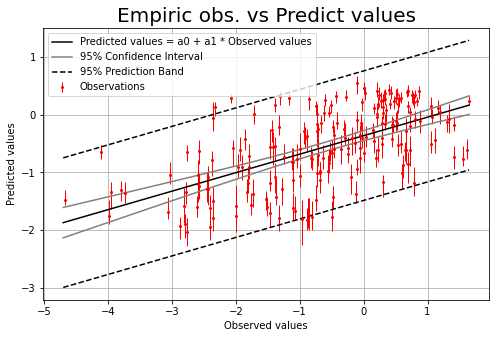

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2019B01: mean - 0.242, median - 0.245, CI - [0.197-0.292]

SHAP-values for: r2019B04: mean - 0.176, median - 0.18, CI - [0.137-0.216]

SHAP-values for: r2019B08: mean - 0.325, median - 0.328, CI - [0.283-0.373]

SHAP-values for: r2019B10: mean - 0.137, median - 0.135, CI - [0.105-0.168]

SHAP-values for: r2019B11: mean - 0.164, median - 0.163, CI - [0.131-0.196]



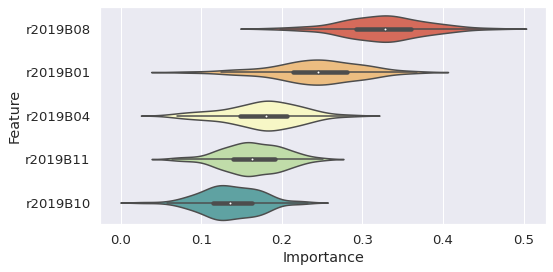

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2019B08', 'r2019B01', 'r2019B04',  'r2019B11', 'r2019B10'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 34.995, median: 35.0,
 pred. interval (P(0.025)-P(0.975)): 13.0-51.0, 
 conf. interval (p-value=0.95): 24.267-46.628 
***
Aggregate bias statistic: 
 mean: 0.06, median: 0.047,
 pred. interval (P(0.025)-P(0.975)): -0.215-0.33, 
 conf. interval (p-value=0.95): -0.053-0.174 
***
Aggregate RMSE statistic: 
 mean: 1.031, median: 1.025, pred. interval (P(0.025)-P(0.975)): 0.806-1.268, 
 conf. interval (p-value=0.95): 0.916-1.137 
***
Aggregate MSE statistic: 
 mean: 1.077, median: 1.05, pred. interval (P(0.025)-P(0.975)): 0.65-1.607, 
 conf. interval (p-value=0.95): 0.841-1.295 
***
Aggregate R^2 statistic: 
 mean: 0.316, median: 0.323, pred. interval (P(0.025)-P(0.975)): 0.068-0.482, 
 conf. interval (p-value=0.95): 0.231-0.394 
***
Aggregate bias(%) statistic: 
 mean: -4.737, median: -8.164, pred. interval (P(0.025)-P(0.975)): -41.389-53.938, 
 conf. interval (p-value=0.95): -25.529-12

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

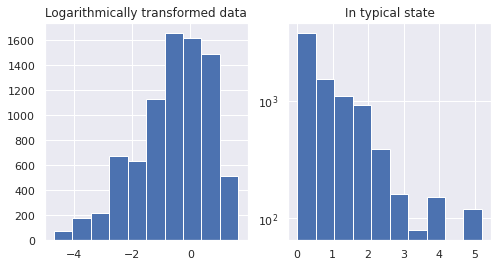

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-4, -3, -2, -1, 0, 1, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.2, 0.5, 1, 2, 5])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

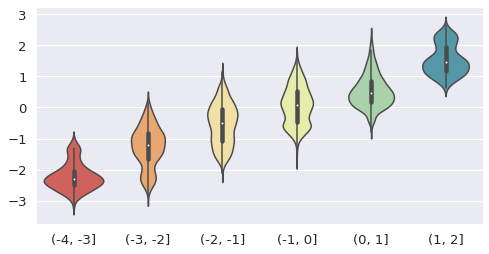

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

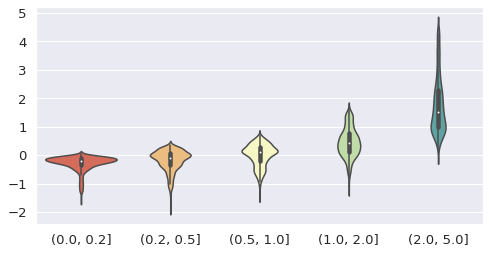

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

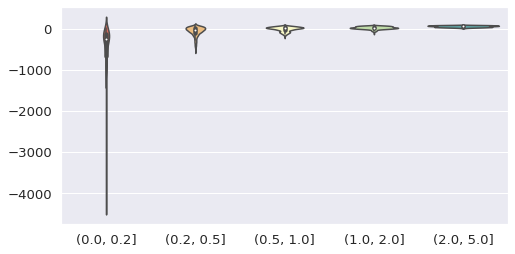

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [35]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [36]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [37]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.60582
[1]	validation_0-rmse:1.51730
[2]	validation_0-rmse:1.44945
[3]	validation_0-rmse:1.38634
[4]	validation_0-rmse:1.33357
[5]	validation_0-rmse:1.28589
[6]	validation_0-rmse:1.24040


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.20205
[8]	validation_0-rmse:1.16632
[9]	validation_0-rmse:1.13032
[10]	validation_0-rmse:1.10022
[11]	validation_0-rmse:1.08251
[12]	validation_0-rmse:1.05820
[13]	validation_0-rmse:1.03860
[14]	validation_0-rmse:1.02064
[15]	validation_0-rmse:1.00485
[16]	validation_0-rmse:0.98865
[17]	validation_0-rmse:0.97429
[18]	validation_0-rmse:0.96275
[19]	validation_0-rmse:0.95365
[20]	validation_0-rmse:0.94347
[21]	validation_0-rmse:0.93517
[22]	validation_0-rmse:0.92717
[23]	validation_0-rmse:0.91797
[24]	validation_0-rmse:0.91382
[25]	validation_0-rmse:0.90762
[26]	validation_0-rmse:0.90393
[27]	validation_0-rmse:0.89926
[28]	validation_0-rmse:0.89265
[29]	validation_0-rmse:0.88669
[30]	validation_0-rmse:0.88188
[31]	validation_0-rmse:0.87746
[32]	validation_0-rmse:0.87273
[33]	validation_0-rmse:0.86965
[34]	validation_0-rmse:0.86636
[35]	validation_0-rmse:0.86194
[36]	validation_0-rmse:0.85877
[37]	validation_0-rmse:0.85607
[38]	validation_0-rmse:0.85156
[39]	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [38]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 51


In [39]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

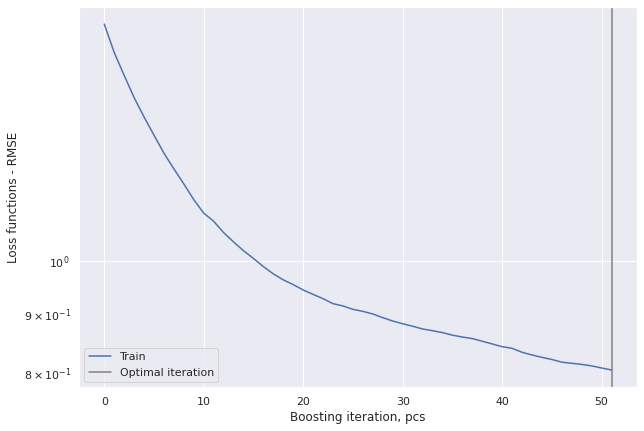

In [40]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [41]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -0.45
RMSE: 0.8
Relative RMSE(%):  -129.858
MSE: 0.6
R square: 59.9%


In [42]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.617
Uncertainty
a0: -0.30+/-0.04
a1: 0.511+/-0.028


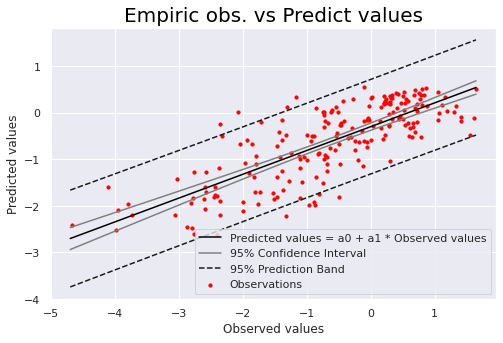

In [43]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

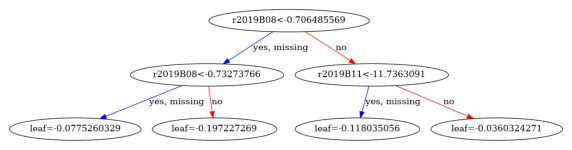

In [49]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

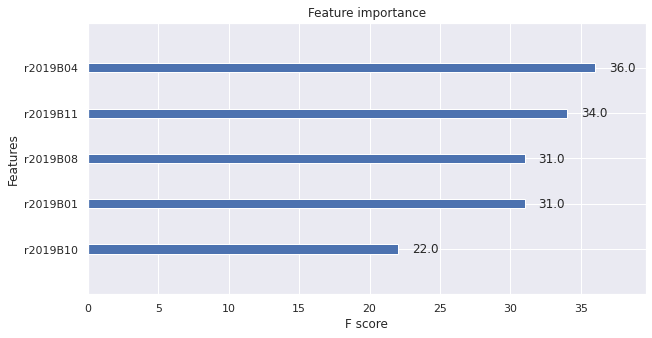

In [54]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

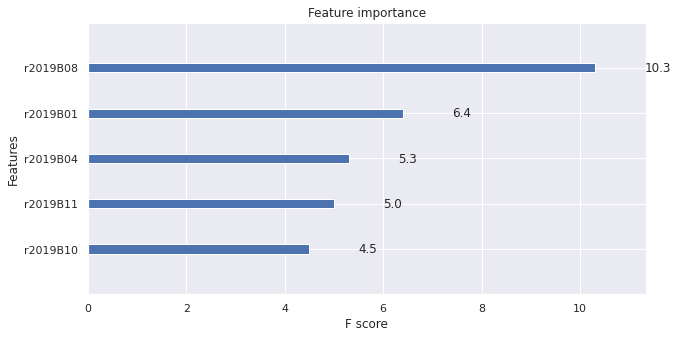

In [55]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

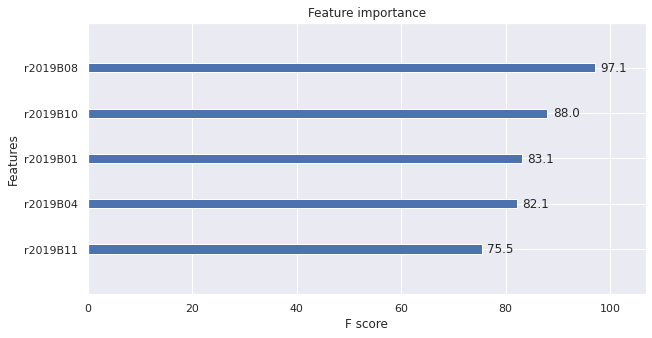

In [56]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [57]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


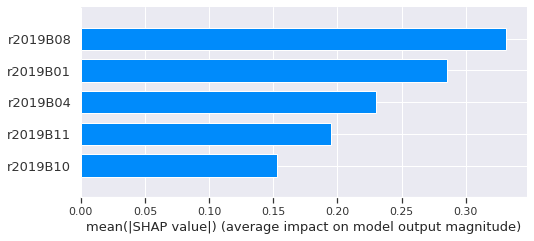

In [58]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

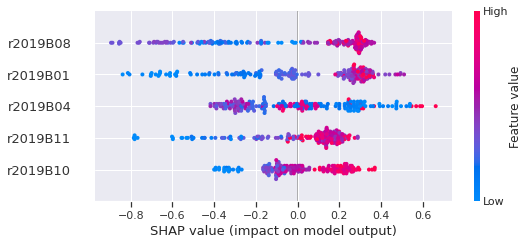

In [59]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

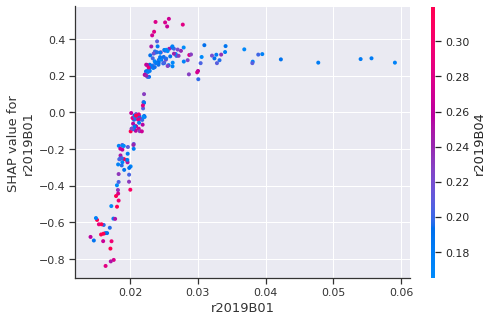

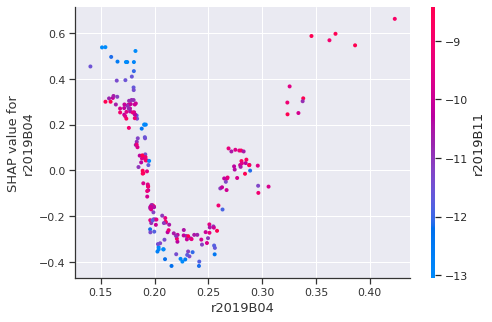

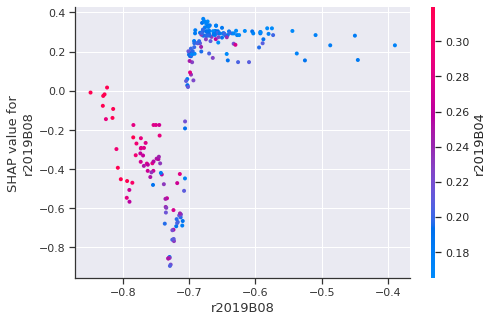

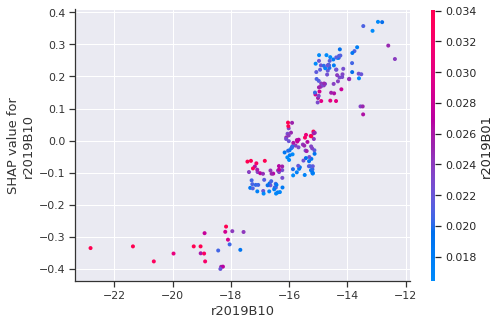

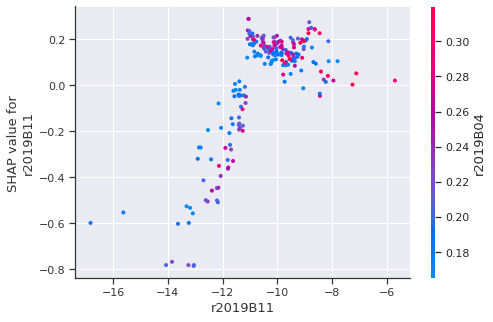

In [60]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [61]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/04_LN_Tag_Cs_SENTINEL_2019_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/04_LN_Tag_Cs_SENTINEL_2019_XGB_model.txt")